In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Data Untuk Teori Graf.xlsx')
df_test_drive = df.copy()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Data Untuk Teori Graf.xlsx'

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df

NameError: name 'df' is not defined

Ada Pesimis dan Optimis
- Pesimis : Positif/total populasi
- Optimis: Positif dan odp/total populasi

Vertexnya adlah kecamatan dan edge itu kedua itu atau bisa diambil salah satunya

In [ ]:
df_test_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 74 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   periode_data                          269 non-null    int64  
 1   id_kel                                269 non-null    object 
 2   nama_provinsi                         269 non-null    object 
 3   nama_kota                             269 non-null    object 
 4   nama_kecamatan                        269 non-null    object 
 5   positif                               269 non-null    int64  
 6   suspek                                269 non-null    int64  
 7   perawatan_rs_suspek                   269 non-null    int64  
 8   isolasi_di_rumah_suspek               269 non-null    int64  
 9   suspek_meninggal                      269 non-null    int64  
 10  selesai_isolasi_suspek                269 non-null    int64  
 11  probable           

In [ ]:
df_test_drive['Nama Kec.'] #this is nodes

,Nama Kec.
0,Cakung
1,Cempaka Putih
2,Cengkareng
3,Cilandak
4,Cilincing
...,...
264,NaN
265,NaN
266,NaN
267,NaN


In [ ]:
# bobot pesimis yaitu positif/total populasi

df_test_drive['Bobot Pesimis']

NameError: name 'df_test_drive' is not defined

In [ ]:
# cek nilai koosong

print(df_test_drive['Nama Kec.'].isna().sum())
print(df_test_drive['Bobot Pesimis'].isna().sum())
print(df_test_drive['Bobot Optimis'].isna().sum())

NameError: name 'df_test_drive' is not defined

In [ ]:
# bobot optimis dan pesimis
pesimis = [0.47, 1.57, 0.54, 0.70, 0.52, 0.55, 0.50, 0.66, 1.22, 0.81, 0.44, 0.66, 1.07, 0.33, 0.83, 0.57, 0.70, 0.92, 0.97, 0.60, 0.73, 0.66, 0.78, 0.92, 0.81, 1.16, 0.87, 0.97, 0.68, 0.58, 0.58, 0.52, 0.57, 0.70, 0.89, 1.12, 1.14, 0.97, 0.62, 1.06, 0.74, 0.76 ]
optimis = [1.07, 4.08, 1.28, 2.12, 1.44, 1.73, 1.72, 1.78, 2.60, 2.16, 1.72, 1.46, 2.37, 1.22, 3.13, 1.55, 1.71, 2.82, 2.45, 1.70, 1.05, 2.29, 1.78, 1.63, 1.62, 2.02, 2.14, 2.17, 2.75, 2.85, 2.03, 2.43, 1.96, 1.40, 1.77, 1.63, 2.36, 2.80, 2.63, 2.51, 1.86, 2.54, 1.96, 2.19]

# nodes
nodes = ['Cakung', 'Cempaka Putih', 'Cengkareng','Cilandak','Cilincing', 'Cipayung', 'Ciracas', 'Duren Sawit', 'Gambir','Grogol Petamburan', 'Jagakarsa', 'Jatinegara', 'Johar Baru', 'Kalideres', 'Kebayoran Baru',
         'Kebayoran Lama', 'Kebon Jeruk', 'Kelapa Gading', 'Kemayoran', 'Kembangan','Koja', 'Kramat Jati', 'Makasar','Mampang Prapatan',
         'Matraman', 'Menteng', 'Pademangan', 'Palmerah', 'Pancoran', 'Pasar Rebo', 'Pasar Minggu',
         'Panjaringan', 'Pesanggrahan', 'PuloGadung', 'Sawah Besar', 'Senen', 'SetiaBudi', 'Taman Sari', 'Tambora', 'Tanah Abang', 'Tanjung Priok', 'Tebet']

# edge
edges = [('Jagakarsa', 'Pasar Rebo'),('Jagakarsa', 'Pasar Minggu'), ('Jagakarsa', 'Cilandak'), ('Pasar Rebo', 'Pasar Minggu'), ('Pasar Rebo', 'Kramat Jati'), ('Pasar Rebo', 'Ciracas'), ('Ciracas', 'Kramat Jati'), ('Ciracas', 'Cipayung'), ('Cipayung','Makasar'),
        ('Cilandak', 'Kebayoran Lama'), ('Cilandak', 'Kebayoran Baru'), ('Cilandak', 'Mampang Prapatan'), ('Kebayoran Lama', 'Pesanggrahan'), ('Kebayoran Lama', 'Kebon Jeruk'),('Kebayoran Lama', 'Palmerah'), ('Kebayoran Lama', 'Tanah Abang'), ('Kebayoran Lama', 'Kebayoran Baru'),
        ('Kebayoran Baru', 'Tanah Abang'), ('Kebayoran Baru', 'SetiaBudi'), ('Kebayoran Baru', 'Mampang Prapatan'), ('Mampang Prapatan', 'SetiaBudi'), ('Mampang Prapatan', 'Pancoran'), ('Pancoran', 'Tebet'), ('Pancoran', 'Kramat Jati'), ('Kramat Jati', 'Makasar'), ('Kramat Jati', 'Jatinegara'), ('Makasar','Jatinegara'),
        ('Makasar', 'Duren Sawit'),('Jatinegara', 'Duren Sawit'), ('Jatinegara', 'Tebet'),('Jatinegara', 'Matraman'),('Jatinegara', 'PuloGadung'),('Pesanggrahan', 'Kembangan'), ('Pesanggrahan', 'Kebon Jeruk'), ('Kembangan', 'Cengkareng'), ('Kembangan', 'Kebon Jeruk'), ('Cengkareng', 'Kalideres'), ('Cengkareng', 'Panjaringan'), ('Kalideres', 'Panjaringan'), ('Kebon Jeruk', 'Palmerah'), ('Kebon Jeruk', 'Cengkareng'),
        ('Kebon Jeruk', 'Grogol Petamburan'), ('Grogol Petamburan', 'Panjaringan'), ('Grogol Petamburan', 'Cengkareng'), ('Grogol Petamburan', 'Palmerah'), ('Grogol Petamburan', 'Tambora'),('Grogol Petamburan', 'Gambir'),('Tanah Abang', 'Palmerah'), ('Tanah Abang', 'Menteng'), ('Tanah Abang', 'SetiaBudi'), ('Tanah Abang', 'Gambir'), ('Tebet', 'SetiaBudi'), ('Tebet', 'Matraman'),('Tebet', 'Menteng'),
        ('Cakung','Duren Sawit'), ('Cakung', 'PuloGadung'), ('Cakung', 'Kelapa Gading'), ('Cakung', 'Cilincing'), ('Koja', 'Cilincing'),('Koja','Kelapa Gading'),('Koja','Tanjung Priok'),('Tanjung Priok','Kelapa Gading'),('Tanjung Priok','Kemayoran'),('Tanjung Priok','Pademangan'),('Sawah Besar','Pademangan'),('Sawah Besar','Kemayoran'),('Sawah Besar','Taman Sari'),('Sawah Besar','Gambir'),('Sawah Besar','Senen'),('Johar Baru','Senen'), ('Johar Baru','Cempaka Putih'), ('Kemayoran','Cempaka Putih'), ('Senen','Cempaka Putih'), ('Matraman','Cempaka Putih'), ('PuloGadung','Cempaka Putih'),
        ('Johar Baru','Matraman'),('Johar Baru','Kemayoran'),('Menteng','Senen'),('Menteng','SetiaBudi'),('Menteng','Tebet'),('Taman Sari','Gambir'),('Taman Sari','Tambora'),('Taman Sari','Pademangan'),('Panjaringan','Tambora'),('Panjaringan','Pademangan'), ('Grogol Petamburan', 'Kebon Jeruk'), ('Grogol Petamburan', 'Tambora'), ('Grogol Petamburan', 'Gambir'),('Grogol Petamburan', 'Panjaringan'), ('Grogol Petamburan', 'Cengkareng')]

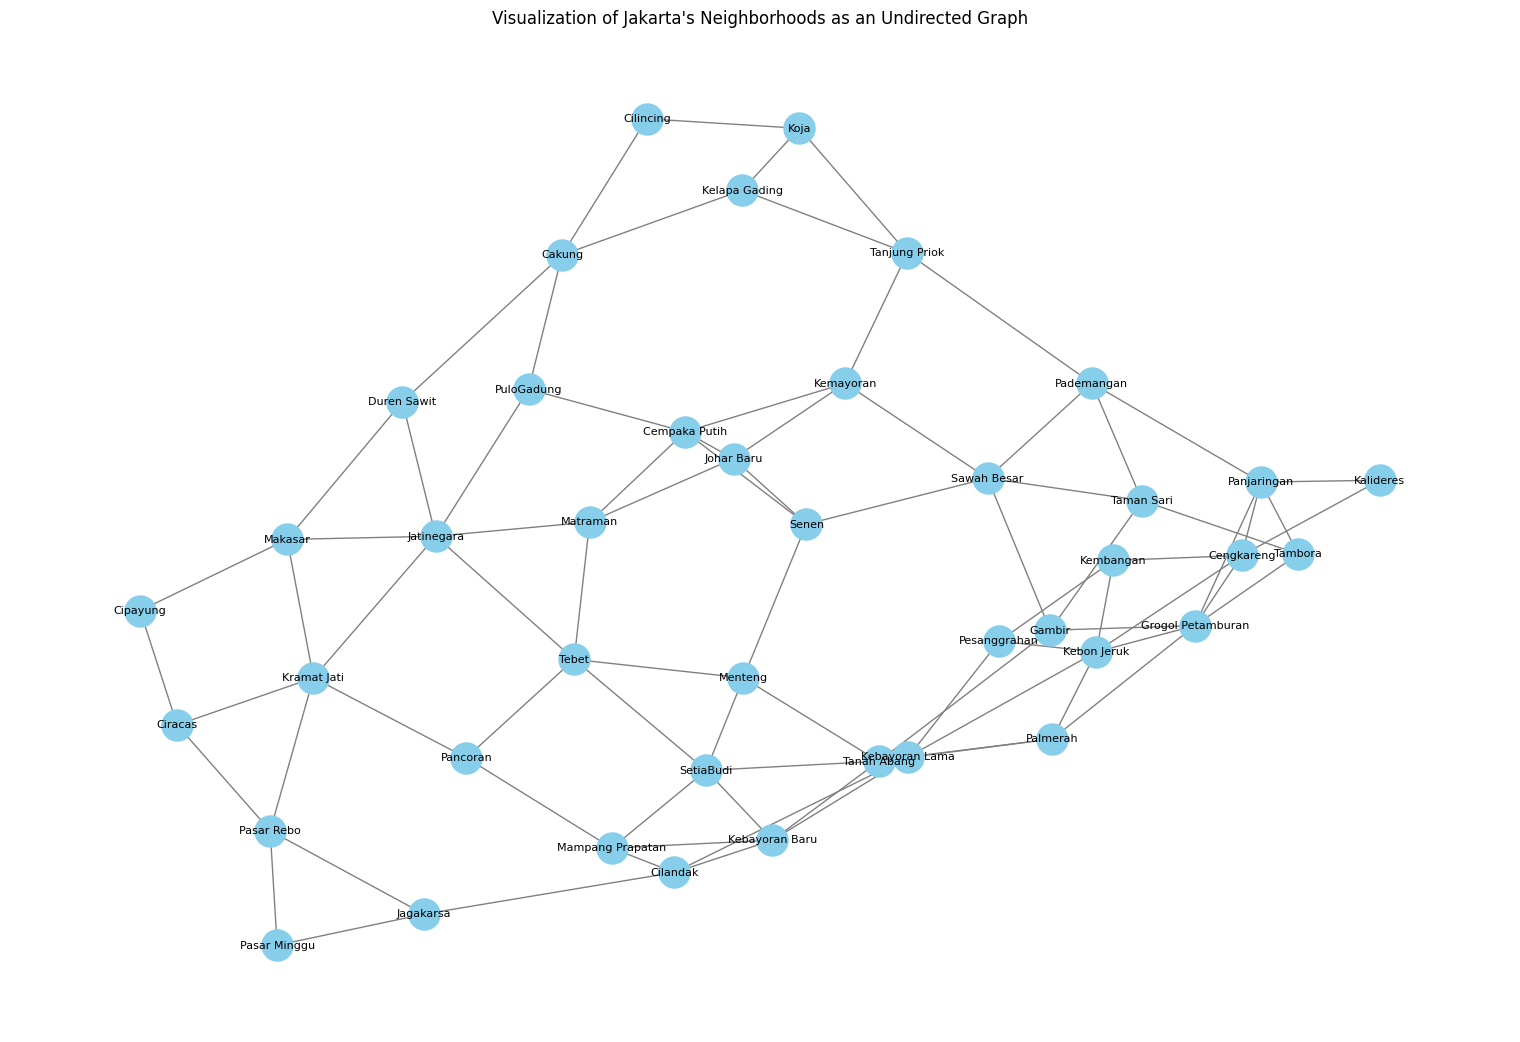

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, node_color='skyblue', font_color='black', edge_color='gray')
plt.title("Visualization of Jakarta's Neighborhoods as an Undirected Graph")
plt.show()



In [ ]:
# Import library yang diperlukan
from graphviz import Digraph

# ER Diagram untuk Universitas
university_er = Digraph('University ER Diagram', filename='/mnt/data/university_er', format='png')
university_er.attr(rankdir='LR', size='10')

# Entitas
university_er.node('U', 'Universitas')
university_er.node('PS', 'Program Studi')
university_er.node('M', 'Mahasiswa')
university_er.node('MK', 'Mata Kuliah')
university_er.node('S', 'Semester')
university_er.node('E', 'Mengambil Mata Kuliah')

# Atribut Mahasiswa
university_er.node('M1', 'ID Mahasiswa', shape='ellipse', style='filled', fillcolor='lightgray')
university_er.node('M2', 'Nama', shape='ellipse', style='filled', fillcolor='lightgray')
university_er.node('M3', 'Tanggal Lahir', shape='ellipse', style='filled', fillcolor='lightgray')
university_er.node('M4', 'Tahun Masuk', shape='ellipse', style='filled', fillcolor='lightgray')

university_er.edge('M', 'M1')
university_er.edge('M', 'M2')
university_er.edge('M', 'M3')
university_er.edge('M', 'M4')

# Atribut Mata Kuliah
university_er.node('MK1', 'Kode Mata Kuliah', shape='ellipse', style='filled', fillcolor='lightgray')
university_er.node('MK2', 'Nama Mata Kuliah', shape='ellipse', style='filled', fillcolor='lightgray')
university_er.node('MK3', 'Total Kredit', shape='ellipse', style='filled', fillcolor='lightgray')

university_er.edge('MK', 'MK1')
university_er.edge('MK', 'MK2')
university_er.edge('MK', 'MK3')

# Relasi
university_er.edge('U', 'PS', label='Menawarkan')
university_er.edge('PS', 'M', label='Mewajibkan')
university_er.edge('M', 'E', label='Mengambil')
university_er.edge('MK', 'E', label='Termasuk')
university_er.edge('S', 'E', label='Dilaksanakan')

# Simpan dan tampilkan
university_er.render()

# ER Diagram untuk Rumah Sakit
hospital_er = Digraph('Hospital ER Diagram', filename='/mnt/data/hospital_er', format='png')
hospital_er.attr(rankdir='LR', size='10')

# Entitas
hospital_er.node('P', 'Pasien')
hospital_er.node('D', 'Dokter')
hospital_er.node('A', 'Perawat')
hospital_er.node('AP', 'Perjanjian (Janji Temu)')
hospital_er.node('MR', 'Medical Record')
hospital_er.node('T', 'Treatment')
hospital_er.node('B', 'Tagihan')

# Atribut Pasien
hospital_er.node('P1', 'ID Pasien', shape='ellipse', style='filled', fillcolor='lightgray')
hospital_er.node('P2', 'Nama', shape='ellipse', style='filled', fillcolor='lightgray')
hospital_er.node('P3', 'Jenis Kelamin', shape='ellipse', style='filled', fillcolor='lightgray')
hospital_er.node('P4', 'Alamat', shape='ellipse', style='filled', fillcolor='lightgray')

hospital_er.edge('P', 'P1')
hospital_er.edge('P', 'P2')
hospital_er.edge('P', 'P3')
hospital_er.edge('P', 'P4')

# Atribut Dokter
hospital_er.node('D1', 'ID Dokter', shape='ellipse', style='filled', fillcolor='lightgray')
hospital_er.node('D2', 'Nama', shape='ellipse', style='filled', fillcolor='lightgray')
hospital_er.node('D3', 'Spesialis', shape='ellipse', style='filled', fillcolor='lightgray')

hospital_er.edge('D', 'D1')
hospital_er.edge('D', 'D2')
hospital_er.edge('D', 'D3')

# Relasi
hospital_er.edge('P', 'AP', label='Membuat Janji')
hospital_er.edge('D', 'AP', label='Menangani')
hospital_er.edge('P', 'MR', label='Memiliki')
hospital_er.edge('MR', 'D', label='Diperiksa oleh')
hospital_er.edge('MR', 'T', label='Mendapat Treatment')
hospital_er.edge('MR', 'B', label='Dihubungkan dengan Tagihan')

# Simpan dan tampilkan
hospital_er.render()

('/mnt/data/university_er.png', '/mnt/data/hospital_er.png')


('/mnt/data/university_er.png', '/mnt/data/hospital_er.png')

In [ ]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": []
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "source": [
        "**BAB 8.2 Orthogonal Polynomials and Least Squares Approximation**\n",
        "1. Hasthabrata Christopher Liatna (2206824741)\n",
        "2. Ibrahim Al Fatih (2206042022)\n",
        "3. Bryan Jonathan (2206052780)"
      ],
      "metadata": {
        "id": "ezdV8TSUjzJz"
      }
    },
    {
      "cell_type": "code",
      "execution_count": 7,
      "metadata": {
        "id": "EDk1TNeAqMvD"
      },
      "outputs": [],
      "source": [
        "import matplotlib.pyplot as plt\n",
        "from pprint import pprint\n",
        "import scipy.integrate as integrate\n",
        "from scipy.integrate import quad, fixed_quad\n",
        "import numpy as np\n",
        "from math import e, exp, log, sin, cos, tan, pi, log\n",
        "import sympy as sp\n",
        "import scipy"
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# **Least Squares Approximation**"
      ],
      "metadata": {
        "id": "ncqcENyMnkCb"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "def Integrand(x, a):\n",
        "    return x**a\n",
        "def FunctionLeastSquares():\n",
        "    # Mengambil input untuk fungsi\n",
        "    func_str = input(\"Masukkan fungsi yang ingin diaproksimasi (gunakan x sebagai variabel): \")\n",
        "    n = int(input(\"Masukkan derajat polinomial yang diinginkan: \"))\n",
        "    Lbound = float(input(\"Masukkan batas bawah integrasi: \"))\n",
        "    Ubound = float(input(\"Masukkan batas atas integrasi: \"))\n",
        "\n",
        "    # Mendefinisikan x sebagai variabel\n",
        "    x = sp.symbols('x')\n",
        "\n",
        "    func_expr = sp.sympify(func_str)\n",
        "    func_lambdified = sp.lambdify(x, func_expr, \"numpy\") # Mengubah input string menjadi sebuah fungsi yang dapat diinput / dievaluate\n",
        "\n",
        "    # mencari koefisien dari SPL (ruas kiri SPL)\n",
        "    leftrow = []\n",
        "    for j in range(n+1):\n",
        "      dummy = []\n",
        "      for i in range(n + 1):\n",
        "        integral, _ = fixed_quad(Integrand, Lbound, Ubound, args=(i+j,))  # Fixed_quad berfungsi untuk mengintegralkan suatu fungsi.\n",
        "        # Berdasarkan dokumentasi SciPy, Fixed_quad menggunakan Gaussian Quadrature dengan default order n = 5\n",
        "        dummy.append(integral)\n",
        "      leftrow.append(dummy)\n",
        "\n",
        "    print(\"\\nHasil integrasi untuk setiap derajat polinomial sebagai koefisien:\")\n",
        "    pprint(leftrow)\n",
        "\n",
        "    # Mencari nilai integral pada ruas kanan\n",
        "    rightrow = []\n",
        "    for i in range(n + 1):\n",
        "        integral, _ = fixed_quad(lambda x: func_lambdified(x) * x**i, Lbound, Ubound)\n",
        "        rightrow.append(integral)\n",
        "\n",
        "    print(\"\\nHasil integrasi untuk setiap derajat polinomial sebagai konstanta:\")\n",
        "    pprint(rightrow)\n",
        "    print()\n",
        "    sol2 = np.linalg.solve(leftrow,rightrow) # Berdasarkan dokumentasi Numpy, Linalg.solve menggunakan LU decomposition.\n",
        "\n",
        "    # Dengan linalg.solve(leftrow,rightrow), maka akan terbentuk persamaan leftrow*sol2 = rightrow\n",
        "\n",
        "    print(\"Maka didapat nilai : \")\n",
        "    for i in range(n+1):\n",
        "      print(f\"a{i} = \", sol2[i])\n",
        "\n",
        "    eq = 0 # eq => Equation / persamaan aproksimasi akhir\n",
        "    x = sp.symbols('x')\n",
        "    for i in range(n+1):\n",
        "      eq += sol2[i]*x**i\n",
        "    print(f\"\\nDidapat P{n}(x) : \")\n",
        "    print(eq)\n",
        "    print()\n",
        "\n",
        "    eq_lambdified = sp.lambdify(x, sp.sympify(eq), \"numpy\") # Mengubah eq yang berbentuk string menjadi fungsi yang dapat diinput\n",
        "\n",
        "\n",
        "    # Menghitung Error\n",
        "    error, _ = fixed_quad((lambda x: (func_lambdified(x) - eq_lambdified(x))**2), Lbound, Ubound)\n",
        "    print(\"\\nError:\", error)\n",
        "    print()\n",
        "\n",
        "    # Menggambar grafik\n",
        "    xs = np.linspace(Lbound,Ubound,100)\n",
        "    ys = sum(sol2[i] * xs**i for i in range(n+1))\n",
        "    plt.axhline(0, color='black', linewidth=1)  # X-axis\n",
        "    plt.axvline(0, color='black', linewidth=1)  # Y-axis\n",
        "    plt.plot(xs,ys,label=\"P(x)\")\n",
        "    plt.plot(xs,func_lambdified(xs),label=\"f(x)\")\n",
        "    plt.grid()\n",
        "    plt.xlabel(\"x\")\n",
        "    plt.ylabel(\"y\")\n",
        "    plt.title(\"Function Least Square Approximation\")\n",
        "    plt.legend()\n",
        "\n",
        "FunctionLeastSquares()\n"
      ],
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 889
        },
        "id": "Zt6C0abt-CZT",
        "outputId": "5e44fe91-2020-4090-8c26-2be9c19ac58b"
      },
      "execution_count": 10,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Masukkan fungsi yang ingin diaproksimasi (gunakan x sebagai variabel): sin(x)\n",
            "Masukkan derajat polinomial yang diinginkan: 2\n",
            "Masukkan batas bawah integrasi: 0\n",
            "Masukkan batas atas integrasi: 1\n",
            "\n",
            "Hasil integrasi untuk setiap derajat polinomial sebagai koefisien:\n",
            "[[1.0, 0.5, 0.33333333333333326],\n",
            " [0.5, 0.33333333333333326, 0.24999999999999994],\n",
            " [0.33333333333333326, 0.24999999999999994, 0.19999999999999993]]\n",
            "\n",
            "Hasil integrasi untuk setiap derajat polinomial sebagai konstanta:\n",
            "[0.4596976941320484, 0.3011686789364102, 0.22324427546364572]\n",
            "\n",
            "Maka didapat nilai : \n",
            "a0 =  -0.0074649306129609405\n",
            "a1 =  1.0912997835807905\n",
            "a2 =  -0.2354618011361577\n",
            "\n",
            "Didapat P2(x) : \n",
            "-0.235461801136158*x**2 + 1.09129978358079*x - 0.00746493061296094\n",
            "\n",
            "\n",
            "Error: 7.439625704332065e-06\n",
            "\n"
          ]
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjcAAAHHCAYAAABDUnkqAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAZPFJREFUeJzt3Xd4FNXbxvHvbHoIoYXQREKRDqJgEFBBBREVxYIISImASLHATxSUjoIVUKQISFMQBBVRECmK0qSDIEV67y1ASLLZPe8fkbzGBEwg2Uk29+e6cmnOnpl99mSTvZk5M8cyxhhEREREvITD7gJEREREMpLCjYiIiHgVhRsRERHxKgo3IiIi4lUUbkRERMSrKNyIiIiIV1G4EREREa+icCMiIiJeReFGREREvIrCjcg17Nu3D8uymDRpkt2liGRp9erVo169enaXkcySJUuwLIslS5bYXYp4mMKNeMykSZOwLCvVr549e9pa27Rp0xg+fLitNfxb27ZtCQkJsbuMFObNm0f//v3T3N/tdjNlyhRq1qxJ/vz5yZ07N2XLlqV169b8/vvvmVdoFrNt2zYsyyIwMJBz587ZXY5XGTVqlP4BIsn42l2A5DwDBw6kZMmSydoqV65sUzWJpk2bxpYtW3jllVeStZcoUYLLly/j5+dnT2FZ0Lx58xg5cmSaA85LL73EyJEjeeyxx2jZsiW+vr7s2LGDH3/8kVKlSnHnnXdmbsFZxBdffEHhwoU5e/Yss2bNon379naXlKEWLFhg23OPGjWKsLAw2rZtm6z9nnvu4fLly/j7+9tTmNhG4UY8rlGjRtSoUcPuMtLkyr+05focP36cUaNG0aFDB8aOHZvsseHDh3Py5EmbKvtvsbGx+Pv743Dc+AFuYwzTpk2jRYsW7N27l6lTp9oWbowxxMbGEhQUlKH7zYoBwuFw6Pc3h9JpKclSLMtK9YhAREREsn+VXTnFtXz5crp3707BggXJlSsXjz/+eKofmD/++CN169Yld+7chIaGcscddzBt2jQgca7A3Llz2b9/f9JpsoiICODqc25+/vln7r77bnLlykXevHl57LHH2LZtW7I+/fv3x7Isdu3aRdu2bcmbNy958uQhKiqKmJiYGxqnf1q1ahUPPvggefLkITg4mLp167J8+fJkffbv30/nzp0pV64cQUFBFChQgKZNm7Jv375k/ZxOJwMGDOCWW24hMDCQAgUKcNddd7Fw4UIg8VTZyJEjAZKdVryavXv3YoyhTp06KR6zLIvw8PBkbX/++Sf33XcfQUFB3HTTTbz11ltMmDABy7KS1ZrW98mZM2d49dVXqVKlCiEhIYSGhtKoUSM2bdqUbLsrczOmT59O7969KVasGMHBwURHR6d5jK9l+fLl7Nu3j2eeeYZnnnmG3377jUOHDqVa/yOPPMKCBQuoVq0agYGBVKxYkW+++SZZvyvv/99++42OHTtSoEABQkNDad26NWfPnk11nz/99BM1atQgKCiITz/9FIA9e/bQtGlT8ufPT3BwMHfeeSdz585N2nbbtm0EBQXRunXrZPtctmwZPj4+vP7660lt/55zc2VMv/rqKwYMGECxYsXInTs3Tz31FOfPnycuLo5XXnmF8PBwQkJCiIqKIi4uLtnzTJw4kfvuu4/w8HACAgKoWLEio0ePTvH6/vzzT3799dek9+OVOq4252bmzJlUr16doKAgwsLCePbZZzl8+HCyPldOCx8+fJgmTZoQEhJCwYIFefXVV3G5XCl+dpK16MiNeNz58+c5depUsrawsLDr2teLL75Ivnz56NevH/v27WP48OF07dqVGTNmJPWZNGkSzz33HJUqVaJXr17kzZuXDRs2MH/+fFq0aMGbb77J+fPnOXToEMOGDQO45lyXRYsW0ahRI0qVKkX//v25fPkyI0aMoE6dOqxfvz4pGF3x9NNPU7JkSYYMGcL69esZP3484eHhvPvuu9f1mv/p559/plGjRlSvXp1+/frhcDiSPhCWLl1KZGQkAGvWrGHFihU888wz3HTTTezbt4/Ro0dTr149tm7dSnBwMJAYyIYMGUL79u2JjIwkOjqatWvXsn79eho0aEDHjh05cuQICxcu5PPPP//P+kqUKAEkfpg0bdo06XlSc+zYMe69914SEhLo2bMnuXLlYuzYsTd0hGHPnj3Mnj2bpk2bUrJkSY4fP86nn35K3bp12bp1K0WLFk3Wf9CgQfj7+/Pqq68SFxeHv79/msf4WqZOnUrp0qW54447qFy5MsHBwXz55Zf06NEjRd+dO3fSrFkzXnjhBdq0acPEiRNp2rQp8+fPp0GDBsn6du3albx589K/f3927NjB6NGj2b9/f9KH+hU7duygefPmdOzYkQ4dOlCuXDmOHz9O7dq1iYmJ4aWXXqJAgQJMnjyZRx99lFmzZvH4449ToUIFBg0aRI8ePXjqqad49NFHuXTpEm3btqV8+fIMHDjwP1/7kCFDCAoKomfPnuzatYsRI0bg5+eHw+Hg7Nmz9O/fn99//51JkyZRsmRJ+vbtm7Tt6NGjqVSpEo8++ii+vr58//33dO7cGbfbTZcuXYDEI4AvvvgiISEhvPnmmwAUKlToqvVMmjSJqKgo7rjjDoYMGcLx48f56KOPWL58ORs2bCBv3rxJfV0uFw0bNqRmzZp88MEHLFq0iA8//JDSpUvTqVOn/3ztYiMj4iETJ040QKpfVwCmX79+KbYtUaKEadOmTYp91a9f37jd7qT2bt26GR8fH3Pu3DljjDHnzp0zuXPnNjVr1jSXL19Ots9/bvfwww+bEiVKpHjevXv3GsBMnDgxqa1atWomPDzcnD59Oqlt06ZNxuFwmNatWye19evXzwDmueeeS7bPxx9/3BQoUCD1QfqHNm3amFy5cl31cbfbbW655RbTsGHDZK8lJibGlCxZ0jRo0CBZ27+tXLnSAGbKlClJbbfeeqt5+OGHr1lXly5dTHr+dLRu3doAJl++fObxxx83H3zwgdm2bVuKfq+88ooBzKpVq5LaTpw4YfLkyWMAs3fv3qT2tL5PYmNjjcvlStZn7969JiAgwAwcODCp7ZdffjGAKVWqVLKxSs8YX018fLwpUKCAefPNN5PaWrRoYW699dZU6wfM119/ndR2/vx5U6RIEXPbbbcltV15/1evXt3Ex8cntb/33nsGMN99912Kfc6fPz/Zc10Z76VLlya1XbhwwZQsWdJEREQkjZvL5TJ33XWXKVSokDl16pTp0qWL8fX1NWvWrEm2v7p165q6desmfX9lTCtXrpysxubNmxvLskyjRo2SbV+rVq0Uv4OpvW8bNmxoSpUqlaytUqVKyZ773zX88ssvxpjEn0V4eLipXLlysr8HP/zwgwFM3759k9ratGljgGTvE2OMue2220z16tVTPJdkLTotJR43cuRIFi5cmOzrej3//PPJ/oV6991343K52L9/PwALFy7kwoUL9OzZM8W592udTrmao0ePsnHjRtq2bUv+/PmT2qtWrUqDBg2YN29eim1eeOGFZN/ffffdnD59OumUx/XauHEjO3fupEWLFpw+fZpTp05x6tQpLl26xP33389vv/2G2+0GSHb0w+l0cvr0acqUKUPevHlZv3590mN58+blzz//ZOfOnTdU2z9NnDiRTz75hJIlS/Ltt9/y6quvUqFCBe6///5kpwLmzZvHnXfemexISMGCBWnZsuV1P3dAQEDSnBmXy8Xp06cJCQmhXLlyyV73FW3atEk2VukZ46v58ccfOX36NM2bN09qa968OZs2beLPP/9M0b9o0aI8/vjjSd9fOd20YcMGjh07lqzv888/n2yye6dOnfD19U3xPixZsiQNGzZM1jZv3jwiIyO56667ktpCQkJ4/vnn2bdvH1u3bgUS561MmjSJixcv0qhRI0aNGkWvXr3SPG+udevWyWqsWbMmxhiee+65ZP1q1qzJwYMHSUhISGr758/iyhHfunXrsmfPHs6fP5+m5/+ntWvXcuLECTp37pzs78HDDz9M+fLlk52SuyK13989e/ak+7nFsxRuxOMiIyOpX79+sq/rdfPNNyf7Pl++fABJ8w52794NZNzVWFdCU7ly5VI8VqFChaQPvvTUeL2uBJA2bdpQsGDBZF/jx48nLi4u6QPg8uXL9O3bl+LFixMQEEBYWBgFCxbk3LlzyT4kBg4cyLlz5yhbtixVqlShR48e/PHHHzdUp8PhoEuXLqxbt45Tp07x3Xff0ahRI37++WeeeeaZpH779+/nlltuSbF9amOdVm63m2HDhnHLLbcke91//PFHqh+O/76KLz1jfDVffPEFJUuWJCAggF27drFr1y5Kly5NcHAwU6dOTdG/TJkyKYJ32bJlAVLMkfr3eIWEhFCkSJEU/f79uiBxvK/2Pr7y+BWlS5emf//+rFmzhkqVKtGnT5+rv+B/+ff7P0+ePAAUL148Rbvb7U42nsuXL6d+/fpJc9sKFizIG2+8AXBd4eZav7/ly5dP9poBAgMDKViwYLK2fPny3fDvrmQ+zbmRbOFqE/h8fHxSbTfGZGY56ZJZNV45YvD+++9TrVq1VPtcmTv04osvMnHiRF555RVq1apFnjx5sCyLZ555JtmRh3vuuYfdu3fz3XffsWDBAsaPH8+wYcMYM2ZMhlzdU6BAAR599FEeffRR6tWrx6+//sr+/fuT5ubcqH+/TwYPHkyfPn147rnnGDRoEPnz58fhcPDKK6+kesTl3/N70jPGqYmOjub7778nNjY21eA2bdo03n777es6ipgeGXFl1JVLvY8cOcLp06cpXLhwmra72vv/v34vdu/ezf3330/58uUZOnQoxYsXx9/fn3nz5jFs2LD/PGKWEa5Wo2R9CjeSpeTLly/FDc7i4+M5evTode2vdOnSAGzZsoUyZcpctV9aP1yufAjv2LEjxWPbt28nLCyMXLlyXUel6XfltYWGhv7n0a9Zs2bRpk0bPvzww6S22NjYVG8mlz9/fqKiooiKiuLixYvcc8899O/fPyncZNQHcY0aNfj11185evQoJUqUoESJEqmeDkttrNP6Ppk1axb33nsvn332WbL2c+fOpWkSe3rGODXffPMNsbGxjB49OsXz7dixg969e7N8+fJkp4Z27dqFMSbZOP/1118AKSar79y5k3vvvTfp+4sXL3L06FEeeuih/6ytRIkSV30fX3n8ijFjxrBw4ULefvtthgwZQseOHfnuu+/+8zluxPfff09cXBxz5sxJdvTnl19+SdH3en5/77vvvmSP7dixI8NCtthPp6UkSyldujS//fZbsraxY8de96WXDzzwALlz52bIkCHExsYme+yfR05y5cqVpsPcRYoUoVq1akyePDnZh+uWLVtYsGBBmj5UMkr16tUpXbo0H3zwARcvXkzx+D8viffx8UlxpGjEiBEpxvX06dPJvg8JCaFMmTLJLtG9Et7ScpfdY8eOJc3d+Kf4+HgWL16Mw+FICp0PPfQQv//+O6tXr072GlI7dZPW90lqr3vmzJkpLvu9mvSMcWq++OILSpUqxQsvvMBTTz2V7OvVV18lJCQkxes7cuQI3377bdL30dHRTJkyhWrVqqU4WjJ27FicTmfS96NHjyYhIYFGjRr952t76KGHWL16NStXrkxqu3TpEmPHjiUiIoKKFSsCiZfz9+jRgyeffJI33niDDz74gDlz5jBlypT/fI4bceWoyT9/fufPn2fixIkp+ubKlStN78caNWoQHh7OmDFjkr2nf/zxR7Zt28bDDz9844VLlqAjN5KltG/fnhdeeIEnn3ySBg0asGnTJn766afrvlQ8NDSUYcOG0b59e+644w5atGhBvnz52LRpEzExMUyePBlI/BCbMWMG3bt354477iAkJITGjRunus/333+fRo0aUatWLdq1a5d0KXiePHnStSxBWjidTt56660U7fnz56dz586MHz+eRo0aUalSJaKioihWrBiHDx/ml19+ITQ0lO+//x6ARx55hM8//5w8efJQsWJFVq5cyaJFiyhQoECy/VasWJF69epRvXp18ufPz9q1a5k1axZdu3ZN6lO9enUg8c7DDRs2xMfHJ9ncmX86dOgQkZGR3Hfffdx///0ULlyYEydO8OWXX7Jp0yZeeeWVpJ/ta6+9xueff86DDz7Iyy+/nHQpeIkSJVLM+0nr++SRRx5h4MCBREVFUbt2bTZv3szUqVMpVapUmsbf4XCkeYz/7ciRI/zyyy+89NJLqT4eEBBAw4YNmTlzJh9//HHSpNuyZcvSrl071qxZQ6FChZgwYQLHjx9P9UM9Pj6e+++/n6effpodO3YwatQo7rrrLh599NH/fG09e/bkyy+/pFGjRrz00kvkz5+fyZMns3fvXr7++mscDkfSxN+goKCk+8t07NiRr7/+mpdffpn69eunuJw+ozzwwAP4+/vTuHFjOnbsyMWLFxk3bhzh4eEpjtBVr16d0aNH89Zbb1GmTBnCw8NTHJkB8PPz49133yUqKoq6devSvHnzpEvBIyIi6NatW6a8FrGBXZdpSc5z5fLVf19C+k8ul8u8/vrrJiwszAQHB5uGDRuaXbt2XfVS8H/v69+Xfl4xZ84cU7t2bRMUFGRCQ0NNZGSk+fLLL5Mev3jxomnRooXJmzevAZIuSU3tUnBjjFm0aJGpU6dO0v4aN25stm7dmqzPlUvBT548meo4/PPS5tRcuRQ1ta/SpUsn9duwYYN54oknTIECBUxAQIApUaKEefrpp83ixYuT+pw9e9ZERUWZsLAwExISYho2bGi2b9+eYlzfeustExkZafLmzWuCgoJM+fLlzdtvv53sUt6EhATz4osvmoIFCxrLsq55WXh0dLT56KOPTMOGDc1NN91k/Pz8TO7cuU2tWrXMuHHjkl1ebYwxf/zxh6lbt64JDAw0xYoVM4MGDTKfffZZivFK6/skNjbW/O9//zNFihQxQUFBpk6dOmblypVXvWx55syZqb6OtIzxv3344YcGuGafSZMmJbt0u0SJEubhhx82P/30k6lataoJCAgw5cuXT1HXlffQr7/+ap5//nmTL18+ExISYlq2bJnsFgX/3Gdqdu/ebZ566imTN29eExgYaCIjI80PP/yQ9PhHH32U4tJ0Y4w5cOCACQ0NNQ899FBSW1rH9Gq/u6n9vsyZM8dUrVrVBAYGmoiICPPuu++aCRMmpHg/HDt2zDz88MMmd+7cBkiq42p/D2bMmGFuu+02ExAQYPLnz29atmxpDh06lKzP1W7FcKVOydosY7LQzEsRkX+5ctO1vXv3pphz4m0iIiKoXLkyP/zwwzX7XRmTNWvWZJulTEQ8SXNuRERExKso3IiIiIhXUbgRERERr6I5NyIiIuJVdORGREREvIrCjYiIiHiVHHcTP7fbzZEjR8idO3emr+ciIiIiGcMYw4ULFyhatCgOx7WPzeS4cHPkyJEUq9GKiIhI9nDw4EFuuumma/bJceEmd+7cQOLghIaGZui+165dy/3338/ixYt1Y61M5HQ6WbBgAQ888EDSLesl42mcPUPj7Dkaa8/IrHGOjo6mePHiSZ/j15Ljws2VU1GhoaEZHm5CQkKS/pvR+5b/53Q6CQ4OJjQ0VH+gMpHG2TM0zp6jsfaMzB7ntEwp0YRiERER8SoKNyIiIuJVFG5ERETEqyjciIiIiFdRuBERERGvonAjIiIiXkXhRkRERLyKwo2IiIh4FYUbERER8SoKNyIiIuJVFG5ERETEqyjciIiIiFdRuBEREZEMs+fkJU7F2ltDjlsVXERERDLeiehYhi3ayVdrD1Ixj4PWNtaicCMiIiLX7UKsk09/3cNny/Zy2elKao9LcOPnZ09NCjciIiKSbvEJbqau2s+In3dx5lI8AHcWD2JwxCZOnI4mwPdB22pTuBEREZE0M8Ywd/NR3pu/gwNnYgCoHGbxYcRayu79HGvNCQoEFgfTy7YaFW5EREQkTVbtOc3gH7ez6eA5AMrkimVYiZVUPjwDa0s0ACZPcfbnvpcKxnWNPWUuhRsRERG5pl0nLvDOj9tZtO0EACX9zzH0pqVUOzEba8/lxE5h5eCubiSUf4y9Py2kgsO+iKFwIyIiIqk6cSGW4Yt2MmPNQVxuQ4TjBO8V/pk7zv2IdcSZ2KnobXD3q1DuIXA4wOm0t2gUbkRERORfYuITGL90L2N+3U1MvItS1hHeCvuJWpd+xjrz9+mmEnXgnleh1L1gWfYW/C8KNyIiIgKAy234et0hPly4g+PRcdxiHaJPnrncHfcb1kWT2Kn0/YmhpkRte4u9BoUbERER4be/TjJ43ja2H7tAeesA7+b6jnqulRD3d4dyDyWGmmLVba0zLRRuREREcrAdxy4weN42fv3rJJWsfXwW+C33swZcABZUfBTu6QGFq9hdapop3IiIiORAJy7EMmzhX8xYc5AK7GOc/zc0cKz9+1ELKj+RGGrCK9ha5/VQuBEREclBYp0uxi/dw+gluynh3M0Y3695wGfd349aUOWpxFBTsJytdd4IhRsREZEcwO02zNl0hPfmbydP9A4+9P2GBwPW/P3olVDzGhQsa2udGUHhRkRExMut3XeGQXO3EXNoC2/6zuLhgNUAGCysyk9C3de9ItRcoXAjIiLipQ6eieGdH7ezdct6Xvb9mkf9V+KwTGKoqfQ4Vt3XIby83WVmOIfdBYwcOZKIiAgCAwOpWbMmq1evvmb/4cOHU65cOYKCgihevDjdunUjNjbWQ9WKiIhkfRdinbzz43ZafziTetv6scj/VZr4rMBhGajwKFan5dB0olcGG7D5yM2MGTPo3r07Y8aMoWbNmgwfPpyGDRuyY8cOwsPDU/SfNm0aPXv2ZMKECdSuXZu//vqLtm3bYlkWQ4cOteEViIiIZB0ut+GrtQeZ8tMKWsTN5CffX/C3/r6jcLmHoF5PKHKrvUV6gK3hZujQoXTo0IGoqCgAxowZw9y5c5kwYQI9e/ZM0X/FihXUqVOHFi1aABAREUHz5s1ZtWqVR+sWERHJalbsPsVH362k/plpfOuzkEDfxDWeTOn7sO7tDTdl/ZvvZRTbwk18fDzr1q2jV69eSW0Oh4P69euzcuXKVLepXbs2X3zxBatXryYyMpI9e/Ywb948WrVqddXniYuLIy4uLun76OjEJdmdTifODF7c68r+MmPf8v/+Oc6SeTTOnqFx9hxvHev9p2P4+Mf1lN49hc985hHimzhVw3VTTcy9b2Ju/nuZBA+97swa5/Tsz7Zwc+rUKVwuF4UKFUrWXqhQIbZv357qNi1atODUqVPcddddGGNISEjghRde4I033rjq8wwZMoQBAwakaF+wYAHBwcE39iL+Zffu3QCsWrWKU6dOZei+JaWFCxfaXUKOoHH2DI2z53jLWMcmwM+HEih5ciEDfL4nn+9FAM4ERrCj2FOcyF0FtpyDLfNsqS+jxzkmJibNfbPV1VJLlixh8ODBjBo1ipo1a7Jr1y5efvllBg0aRJ8+fVLdplevXnTv3j3p++joaIoXL84DDzxAaGhohtZ3ZTJ0zZo1iYyMzNB9y/9zOp0sXLiQBg0a4OfnZ3c5Xkvj7BkaZ8/xlrF2uQ3frN3PnkXjGOD+isK+ZwGIy1san/t7k7vcI9SwcZXuzBrnK2de0sK2cBMWFoaPjw/Hjx9P1n78+HEKFy6c6jZ9+vShVatWtG/fHoAqVapw6dIlnn/+ed58800cjpQXfwUEBBAQEJCi3c/PL8Pf3Ff2lxn7lpQ0zp6hcfYMjbPnZOexXrX7JD9/O56noyfTwnEULIgNLkpgg94EVG0GPlnnmEVGj3N69mXbpeD+/v5Ur16dxYsXJ7W53W4WL15MrVq1Ut0mJiYmRYDx8fEBwBiTecWKiIjY6NDZGD4eP46gyQ3odfEdSjuOctkvHwkPDCGw+0a4rWWWCjZ2s3UkunfvTps2bahRowaRkZEMHz6cS5cuJV091bp1a4oVK8aQIUMAaNy4MUOHDuW2225LOi3Vp08fGjdunBRyREREvMXleBdfz51LxIb3eMmxGRwQ5wjCdeeLBNd9CQJy211ilmRruGnWrBknT56kb9++HDt2jGrVqjF//vykScYHDhxIdqSmd+/eWJZF7969OXz4MAULFqRx48a8/fbbdr0EERGRDGeM4eeVq3EtGsSz7qXggAR8OV+5DQUavQG5wuwuMUuz/RhW165d6dq1a6qPLVmyJNn3vr6+9OvXj379+nmgMhEREc/bvmcve2b1o/6lH5JuwHe4eGOKPj6IAvlL2lxd9mB7uBERERE4c+4ca6YPpvbRKZS3LoMF+/PeSeEn36FY8dvsLi9bUbgRERGxUYLTyarZIynz50c05AxYcDDgFoIefpsSVRvaXV62pHAjIiJik61LvyXol/7Uce8D4LgjnAu1e1LmvihI5fYmkjYKNyIiIh52Yuc6Tn37GhVj1gIQTS52lnuBak/2oJB/kM3VZX8KNyIiIh4Se+YQe2b0ovyx7wm3DPHGhzXhT1Gp2SCqhxX67x1ImijciIiIZLb4S+yZ8w5FtnxKReLAghWB9xDW5G3qlK9qd3VeR+FGREQks7jdnFw+GZ8lb1HKlbig8marLGfv7s/d9z6EZeMaUN5M4UZERCQTxO1aytlvX6Xwpe0AHDQFWXvLyzR46gWqBGbPta2yC4UbERGRDGRO7+H4N69R+PBCCgPRJoi5eVsS2awXjxfVnYU9QeFGREQkI8RGc+6nIeTaMI7COHEZizm+D5CnUV+eqV5Jp6A8SOFGRETkRrhdxK2dQsLCAeR1ngVgqbsqu2/rRbOHGxLkr4WdPU3hRkRE5DqZvUu5MLsHoee3EQDsdhdhTqEuPP50FHcXDLG7vBxL4UZERCS9zh3g4g9vELLre0KB8yaYSX7PUOmx7rxS+SadgrKZwo2IiEhaxV/C+etQWDGCEBOHy1jMcN/PuTtf4/kGNXQKKotQuBEREfkvxsCWr4md9yaBl48BsMJVkXnFXqb9U42JCMtlc4HyTwo3IiIi13L0D2K/f5XAI6sIBA66CzLKP4q6Tz7HoMqFdQoqC1K4ERERSU3MGVyLB2Gtm0Qgbi4bf8a4H8Ndqyt96lcm2F8foVmVfjIiIiL/5HbBuok4Fw7EL/48AHNctfipaGe6PXkvZcJz21yg/BeFGxERkSsO/I7z+//hd3ILfsA2980M9WvPI02e4pNbi+oUVDahcCMiInLhGO6FfXH8MQM/Ei/tHprQFMcdz/Hhg5UI1VpQ2YrCjYiI5FwuJ6wei+vnwfg4L+I2FjNc9ZgX3oHXnriLKjflsbtCuQ4KNyIikjPtW4brh1fxObUNH2CjuxTvONrz8COPMCnyZnwcOgWVXSnciIhIznLhGOaXgVibv8IHOGNCeDehOc4qLRjxcCUK5g6wu0K5QQo3IiKSM7gTKHXiJxxjumDFX8BtLKa57mNm3iheb1KL2mXC7K5QMojCjYiIeL8Dv+P4vhtVTm4FYKO7NAPc7bj33gf4qm4pAny1bII3UbgRERHvdek0LOoLG77ABzhrQngvoRmHSzZlWJOqWjbBSynciIiI93G7YcMU3Av744g9C8D0hHqMtJ6h2xN1GHx7cd2zxosp3IiIiHc5+gdmbnesQ2twAFvdJeidEEW56vfRmX00rlpEwcbLKdyIiIh3iLsAvwzBrBqNZdxcNIEMTWjK72FPMuiJalQtGsK8efvsrlI8QOFGRESyN2Ng2/eYH1/DunAUC/jBVZP3aEOLB+7ku7tK4ufjwOl02l2peIjCjYiIZF9n98O8HrDzJyxgvzucPglRWGXqM7VJZYrnD7a7QrGBwo2IiGQ/Lif8PgrzyxCshMvEGx/GuBozI6Aprz95u+bV5HAKNyIikr0cXI35/mWsE1uxgN/dFXjT+RyRd9zJvAcrkCdYi1zmdAo3IiKSPVw+B4sHYtZOwMJwxoQwOKElG/M/xJAnqhJZMr/dFUoWoXAjIiJZmzGwdTbmx9exLh7HAmYm3MMH5lla3Hs7b9fTHYYlOYUbERHJus4dgLmvJk0Y3u0uQu+E53DdfDdTn6hMmfDcdlcoWZDCjYiIZD1uF6wag/n5bSznJeKND6NdjzHF9wn+99itPHNHcRwOTRiW1CnciIhI1nL0D/j+JTiyAQtY7S7HG8523FKpBj8+Wonw0EC7K5QsTuFGRESyhvgY+PUdzIpPsIyLaBPMkITmLAluxIBmVXigUmG7K5RsQuFGRETst+fXxMu7z+5NusPwAGdrGt55KwseLE/uQF3eLWmncCMiIva5fBYW9IYNX2ABR0x++jij2FvgHkY9WZU7InR5t6Sfwo2IiHjelcu7572GdekEbiw+T6jPUHdzWterzMh7yxDop8u75foo3IiIiGdFH4W5/4Mdc7GAne5i9HS2J6FYJDOeqkr5wqF2VyjZnMKNiIh4hjGwfjJmQR+suOiky7vHW4/z8kOViapTEh9d3i0ZQOFGREQy3+nd8P3LsG8pFrDRXZrXnM9TsHQ15j5elZsLaPVuyTgKNyIiknncrsTVu39+GyvhMjEmgA8TmvK13yO88URlmta4Sat3S4ZTuBERkcxxYht81wUOr8MClrkq0SuhPRUrVmXBY5V1Mz7JNAo3IiKSsVxOWDYM8+t7WG4n0SaYtxJa8nPgAwx8ugqNKhfW0RrJVAo3IiKScY5shO+6wvHNWMBC1+30dj5HnduqsPCRiuTL5W93hZIDKNyIiMiNS4iDX9/DLBuGZVycMSH0d7ZlTci9vNOyKveWD7e7QslBFG5EROTGHFoH33WGk9uTlk7o52xLw5pVWNBISyeI5ynciIjI9XHGwpLBmBUjsIybkyaUPs7n2JKnLh8/WZU6ZcLsrlByKIUbERFJv4NrEo/WnPoLC/jWVYcBztY0qV2FDxuWI1eAPl7EPnr3iYhI2jkvwy+DMSs/wTJuTpi8vOFsx+789zD2yapEltRCl2I/hRsREUmbg2tgdic4vRML+Np1F4MSWtP0riqMaFCOIH8tdClZg8KNiIhc27/m1pwweenlbMe+Avfw2VO3Ur1EPrsrFElG4UZERK7u0LrEozWndmAB3/x9tKbZPbcysv4tBPrpaI1kPQo3IiKSUkIcLHkHs3z431dC5eENZzv2htVjYtNbqVY8r90VilyVwo2IiCR3dBN82wlO/IkFfOeqzYCENjSrW40R9+tojWR9CjciIpLI5YSlH2J+ex/LncApE0pv53PsCruPCTpaI9mIwo2IiCSu4P1tRzi6CQv40XUHfROe48l7bme45tZINqNwIyKSk7ldsPITzM9vYbniOWdy0dfZlj/zN2Ds09W47WZdCSXZj8KNiEhOdXo3zO4MB3/HAn52VaNXQgceu7s67zUoq6M1km0p3IiI5DTGwNrPMAv6YDljuGgCGZjQijV5H2bU07dSvYTuMizZm8KNiEhOEn0EvusKuxdjAStdFemR0JEGte9gXsPyusuweAWFGxGRnGLzLMzc7lix54k1fryb8AyLQ5vwQdPbuLNUAburE8kwCjciIt4u5gzM/R/8+Q0WsMldiu7OTtwZWYsfH6qgFbzF6zjsLmDkyJFEREQQGBhIzZo1Wb169TX7nzt3ji5dulCkSBECAgIoW7Ys8+bN81C1IiLZzM5FmFG14M9vSDAOhjqfokvgO/SLepy3H6+iYCNeydZ39YwZM+jevTtjxoyhZs2aDB8+nIYNG7Jjxw7Cw8NT9I+Pj6dBgwaEh4cza9YsihUrxv79+8mbN6/nixcRycriL8GCPrD2Myxgl7so3ZydKXvbPcxtXJE8QX52VyiSaWwNN0OHDqVDhw5ERUUBMGbMGObOncuECRPo2bNniv4TJkzgzJkzrFixAj+/xF/MiIgIT5YsIpL1HVqL+eZ5rDO7AZiY0JDxAa3p16wGD1QqbHNxIpnPtnATHx/PunXr6NWrV1Kbw+Ggfv36rFy5MtVt5syZQ61atejSpQvfffcdBQsWpEWLFrz++uv4+KQ+wz8uLo64uLik76OjowFwOp04nc4MfEUk7S8z9i3/75/jLJlH4+wZGTrOLieO5UNxLBuKZVwcMfnp4exISPn7+frRihTI5Z+jf556T3tGZo1zevZnW7g5deoULpeLQoUKJWsvVKgQ27dvT3WbPXv28PPPP9OyZUvmzZvHrl276Ny5M06nk379+qW6zZAhQxgwYECK9gULFhAcHHzjL+Qfdu9O/FfSqlWrOHXqVIbuW1JauHCh3SXkCBpnz7jRcc4Ve5Tb939K/pg9QOJil4PdbXmgVBDVQ4+w6tcjGVGmV9B72jMyepxjYmLS3DdbzSRzu92Eh4czduxYfHx8qF69OocPH+b999+/arjp1asX3bt3T/o+Ojqa4sWL88ADDxAaGpqh9V2ZDF2zZk0iIyMzdN/y/5xOJwsXLqRBgwZJpycl42mcPeOGx9kYHOsnYS3qhyMhlvMmmN7O5zhbqjGzHq9E4dDAjC86m9J72jMya5yvnHlJC9vCTVhYGD4+Phw/fjxZ+/HjxylcOPVzwkWKFMHPzy/ZKagKFSpw7Ngx4uPj8ff3T7FNQEAAAQEBKdr9/Pwy/M19ZX+ZsW9JSePsGRpnz7iucb54AvNdV6ydPwGw3FWJ3nSm3aN307LmzViWlQmVZn96T3tGRo9zevZl26Xg/v7+VK9encWLFye1ud1uFi9eTK1atVLdpk6dOuzatQu3253U9tdff1GkSJFUg42IiNfaPg/3yFpYO38izvgxyPksQwu/y8SXH+fZO0so2EiOZut9brp37864ceOYPHky27Zto1OnTly6dCnp6qnWrVsnm3DcqVMnzpw5w8svv8xff/3F3LlzGTx4MF26dLHrJYiIeFb8Jfj+ZZjeHMflU2xz38zjCW+Tv343vup0FxFhueyuUMR2ts65adasGSdPnqRv374cO3aMatWqMX/+/KRJxgcOHMDh+P/8Vbx4cX766Se6detG1apVKVasGC+//DKvv/66XS9BRMRzDq/DPasDjrOJFy98mvAw3+dvx/vP1KBS0Tw2FyeSddg+obhr16507do11ceWLFmSoq1WrVr8/vvvmVyViEgW4nbBsqG4f3kHh0ngqMnP/5ydqHxXY2Y1KEugnxa7FPkn28ONiIhcw7kDuL9+HsfBlTiAH1w1+SS4K/3b1NFilyJXoXAjIpJV/TET1w/d8Im/wEUTSD9nW7i1OTMfq0TuQF3tI3I1CjciIllN7HnM3FexNn+FD7DOfQv9fF6mS/P6NKpSxO7qRLI8hRsRkazkwCoSZrXDN/ogLmPxccITbC7dgQlP3Ua4bsgnkiYKNyIiWYE7AX75APPre/ji5oC7IK+brjzc+HE+0w35RNJF4UZExGZBcSdhcmM4sgYL+Np1FzMLvszg5rUpVTDE7vJEsh2FGxERG1l/fkPd7b3xc18m2gTRN+E5bq7Xls/vK4Ofj633WRXJthRuRETsEHcB19we+P7xJb7AWndZ3g/+H681b0j1Evnsrk4kW1O4ERHxtMPriP/qOfzP78NlLEa4HudIlS581qQaIQH6syxyo/RbJCLiKW43ZsXHmMWD8DcJHDJh9LFeomSpkrz9xK34+elPskhG0G+SiIgnRB8lflYH/A8sxQLmuiKZc/PrDHqiJuuW/Wx3dSJeReFGRCSz/fUT8V93xD/uLDEmgLfdbSj1QCdG1ymJy5Vgd3UiXkfhRkQksyTEkfBTH3zXfIo/sNVdgqGhr/Pqs40pXzgUAJfL3hJFvJHCjYhIZji1k9gv2xB4+k8AJiQ8yNE7evLJQ1W1irdIJlO4ERHJSMbg3jAV19xXCXRd5owJYZDvizRp0Y7nyha0uzqRHEHhRkQko8RGEzv7ZQK3f4MDWOGqyNcR/ejd7F4KhATYXZ1IjqFwIyKSEQ6vJ+bLNgRfPECCcTDCNCX8oZ58cGdJrQsl4mEKNyIiN8LtxrniE6zFAwj++941Q0Nfp3Or5pQJz213dSI5ksKNiMj1unSaizPaE3Ig8T41P7ruYEv1txjyyB0E+GrSsIhdFG5ERK6D2buUy9OjCIk7SZzxY6hPW2o3f40e5cLtLk0kx1O4ERFJD7eLmEVDCFzxIcG42e0uwuRi/Xip5ROEadKwSJagcCMiklbRRzk3tQ15j68C4Gt3XS7Xf4cBd1fQpGGRLEThRkQkDZw7FhI/swN5E85yyQQwIqgzj7XpToUioXaXJiL/onAjInItLifn5/Yjz/qR+JG4hML8ikN4+YkHCfLXpGGRrEjhRkTkas4d5PTkZylwdiMA02lI/iffp/utJeytS0SuSeFGRCQVl7f8gPubFyjgvkC0CWZcvu40b9uVonmD7C5NRP6Dwo2IyD8lxHNydi8KbhkPwCZ3KdZHDuOVh+ri49CkYZHsQOFGRORv7jP7ODWpJeHRWwCY7vMIZVp9SFTpwjZXJiLpoXAjIgJEb/gWnzldCTcXOW+CmVakFy1adyJPsJ/dpYlIOinciEjOlhDP4VmvU2z7BAA2mjLsqzeCF+rV0r1rRLIphRsRybGcp/dxcmILil38E4BZ/o9Rpc0wmhQrYHNlInIjFG5EJEc6te5bAn7oStG/T0N9F9GHpi076t41Il5A4UZEchaXk70zXqPkX4mnof4wZTj14Bha17rD5sJEJKMo3IhIjhF7ej8nJrSk5KXNAMwJasJtz31E1YJ57S1MRDKUwo2I5AhH1n5PrrmdudlEE22CWVi2L48+0xE/H4fdpYlIBlO4ERHv5kpg+/RelN85FoBtlOL8o+N4snoNmwsTkcyicCMiXivmzCGOjH+W8jEbAFgY/Ai3th9Jhfx57S1MRDKVwo2IeKX9a+eTe25HyphzXDSBLC3fhweaddESCiI5gMKNiHgV43axaXp/quwYgY9l2GXdzKXHJtDoNl0NJZJTKNyIiNe4cPY4+8e3otqlVWDB0lwPULH9WMrky2d3aSLiQQo3IuIVdm/4lVxz2lHZnCTW+LGqQi/ufro7Dp2GkizA5XLhdDrtLsMjnE4nvr6+xMbG4nK50rWtv78/DseNX8GocCMi2Zpxu1n11Xvcvu09/C0XB60iXHjsM+reVsfu0kQwxnDs2DHOnTtndykeY4yhcOHCHDx4MN3rszkcDkqWLIm/v/8N1aBwIyLZVnT0WXaMjeLOi7+ABWuD76ZMh0kUzxdmd2kiAEnBJjw8nODg4ByxGKvb7ebixYuEhISk6yiM2+3myJEjHD16lJtvvvmGxkrhRkSypb82r8H/m7bcYQ7hND6sK/sKNZv3xsqAQ9oiGcHlciUFmwIFcs5irG63m/j4eAIDA9N9iqlgwYIcOXKEhIQE/Pz8rrsGhRsRyVaMMSz9ZgzV/+hHLiuOk+TnXOOx3Fmjgd2liSRzZY5NcHCwzZVkH1dOR7lcLoUbEckZoi9eZP24ztQ7/x1YsC3odoo9N5VbCha1uzSRq8oJp6IySkaNlcKNiGQLO3ZsI2FGa+q5/wJgY0R7bm31LpaP/oyJSHI6OS0iWZoxhkXff0n4tAZUcv9FNCHsaTCBam0/VLARsVGrVq0YPHhwmvv37NmTF198MRMr+n8KNyKSZV24HMcPn3TnvrWdyGddYJ9/Wej4K6XqPGl3aSJerW3btliWhWVZ+Pv7U6ZMGQYOHEhCQgIAmzZtYt68ebz00ktp3uerr77K5MmT2bNnT2aVnUThRkSypO179vPnB41ofHoCDsuwreiTlOjxG6FFythdmkiO8OCDD3L06FF27tzJ//73P/r378/7778PwIgRI2jatCkhISFp3l9YWBgNGzZk9OjRmVVyEoUbEclSjDEsWDSfkMn3c6drHXH4s++u96nw/AQsvyC7yxPJMQICAihcuDAlSpSgU6dO1K9fnzlz5uByuZg1axaNGzdO6rt9+3aCg4OZNm1aUttXX31FUFAQW7duTWpr3Lgx06dPz/TadcJaRLKMmPgEvp/4Lk2ODCPAcnLCtwgBLaYSUaq63aWJ3DBjDJed6VuOIKME+fnc8JVIQUFBnD59mj/++IPz589To0aNpMfKly/PBx98QOfOnalduzaXLl2ic+fOvPvuu1SsWDGpX2RkJIcOHWLfvn1ERETcUD3XonAjIlnC7iOn+GviCzRzLgQL9ua/mxLtPseRS4teine47HRRse9Ptjz31oENCfa/vo98YwyLFy/mp59+4sUXX2T//v34+PgQHh6erF/nzp2ZN28erVu3xuFwUKNGjRQTiIsWTbxtw/79+xVuRMS7LVi+mqILOtLI2oMbi0PVulPy0d6guw2L2OaHH34gJCQEp9OJ2+2mRYsW9O/fnzlz5hAQEJDqkaAJEyZQtmxZLMtiy5YtKfoEBSWeWo6JicnU2hVuRMQ2cQkuvpw2kcd29yOfdZELjlBcj4/n5ioN7S5NJMMF+fmwdaA97+0gP590b3PvvfcyevRo/P39KVq0KL6+iZEhLCyMmJgY4uPjUyxwuWnTJi5duoTD4eDo0aMUK1Ys2eNnzpwBEpdZyEwKNyJii4OnL7JkfE9ax3yBwzIcy1WBgu2/wiffzXaXJpIpLMu67lNDdsiVKxdlyqS8OrFatWoAbN26Nen/ITG4tG3bljfeeIP9+/fTqlUr1q9fn3S0BmDLli34+flRqVKlTK1dx3xFxOOWbNzJ7hGP0ury5zgsw5HSzSj8yhIFG5FsoGDBgtx+++0sW7YsWfsLL7xA8eLFefPNN3n77bdxuVy8+uqryfosXbqUu+++O1ngyQwKNyLiMQkuN5998wMlvnmYeqwjHj/ONhhK0VZjwS/Q7vJEJI3at2/P1KlTk76fMmUK8+bN4/PPP8fX15dcuXIxZcoUxo0bx48//pjUb/r06XTo0CHT61O4ERGPOHEhltEj3qHFpihKOo5zzr8wVrsF5KvTzu7SRORfJk2axOzZs6/6eNu2bTl8+DArV64EoHXr1ly8eJFbbrklqU9kZCTx8fE0atQIgB9//BGHw8FTTz2VqbWD5tyIiAes3nWMPdO68aJ7HlhwMrw2BdtOheD8dpcmItchKCiIKVOmcOrUqTRvc+nSJSZOnJg0MTkzKdyISKYxxvD5wtVUWPYizzh2AHC2+ksUfLg/ONJ/9YaIZB316tVLV39PHLG5It2npdq0acNvv/2WGbWIiBeJjnXy7rgpNFz+NHc4dnDZkYu4pz4nX+NBCjYikqnSHW7Onz9P/fr1ueWWWxg8eDCHDx/OjLpEJBvbevg844e+SffD3ShkneNcSGkCO/9KQOVH7S5NRHKAdIeb2bNnc/jwYTp16sSMGTOIiIigUaNGzJo1C6fTmRk1ikg28s3qXWz7tBXd4z/F33JxruTD5H3xN6ywW/57YxGRDHBdV0sVLFiQ7t27s2nTJlatWkWZMmVo1aoVRYsWpVu3buzcuTOj6xSRLC7W6eK9GQu55YcnedLxK24cxNTtT97WUyEgxO7yRCQHuaFLwY8ePcrChQtZuHAhPj4+PPTQQ2zevJmKFSsybNiwjKpRRLK4Q2djeHvEKNpvbUsVxz5ifPNCq28Jvrcb3OBKxCIi6ZXuq6WcTidz5sxh4sSJLFiwgKpVq/LKK6/QokULQkNDAfj222957rnn6NatW4YXLCJZy687TrB++gD6u6fiYxku5K9M7tbTIW9xu0sTkRwq3eGmSJEiuN1umjdvzurVq5OtK3HFvffeS968eTOgPBHJqtxuw+iFmymxrAfdfH4HCy5VaEbuJz4Cv8y9tbqIyLWk+7TUsGHDOHLkCCNHjkw12ADkzZuXvXv3pnmfI0eOJCIigsDAQGrWrMnq1avTtN306dOxLIsmTZqk+blE5Madi4mn1/jZ3L+8BY/4/I4LH5wN3yfX058q2Ih4AWMMzz//PPnz58eyLDZu3Mjp06cJDw9n3759adpHfHw8ERERrF27NnOLTUW6w02rVq0IDMy4NWBmzJhB9+7d6devH+vXr+fWW2+lYcOGnDhx4prb7du3j1dffZW77747w2oRkf+25fB53vroI9443JnyjoNcDgjDJ2oufrWe1/waES8xf/58Jk2axA8//MDRo0epXLkyb7/9No899hgRERFp2oe/vz+vvvoqr7/+euYWmwrb15YaOnQoHTp0ICoqiooVKzJmzBiCg4OZMGHCVbdxuVy0bNmSAQMGUKpUKQ9WK5KzzVp7kAVjevBe7NvksWKICa9OUJdlUKKW3aWJSAbavXs3RYoUoXbt2hQuXJj4+Hg+++wz2rVL31pwLVu2ZNmyZfz555+ZVGnqbF1+IT4+nnXr1tGrV6+kNofDQf369ZMW40rNwIEDCQ8Pp127dixduvSazxEXF0dcXFzS99HR0UDixOiMvi/Plf1lxr7l//1znCXz/HOc4xLcvP/9eu7c3IfuPmsAuFy1FX6N3sHpGwD6WVw3vZ89x9Nj7XQ6Mcbgdrtxu90eec6MEBUVxZQpUwCwLIsSJUrw3nvvERAQQGRkZNJrGTRoEJ9++imbNm2iQIECADzyyCPExMTwzTffYIwhT5481KlThy+//JKBAwf+53O73W6MMTidTnx8kt/JPD0/N1vDzalTp3C5XBQqVChZe6FChdi+fXuq2yxbtozPPvuMjRs3puk5hgwZwoABA1K0L1iwgODg4HTXfC27d+8GYNWqVelaTEyuz8KFC+0uIUeY+cNCftpxkv7OoZT1OYwTXzYXb81Bn3qwYLHd5XkNvZ89x1Nj7evrS+HChbl48SLx8fFgDCRc9shzpywmKM2njQcOHMhNN93EpEmT+Pnnn/Hx8eGDDz6gatWqSQcIALp27crcuXOJioriiy++YNy4caxYsYKlS5ficDi4cOECAFWrVmXJkiXJtr2a+Ph4Ll++zG+//UZCQkKyx2JiYtL+ctPcMwu4cOECrVq1Yty4cYSFhaVpm169etG9e/ek76OjoylevDgPPPBA0qXrGeXKROiaNWsSGRmZofuW/+d0Olm4cCENGjTAz8/P7nK8ltPpZNSsRRzY+ydj3B8T6oghLrAgPs98TpViNahid4FeQu9nz/H0WMfGxnLw4EFCQkIS56rGX8LxToVMf97UuHseAv9caeobGhpKWFgYfn5+3HJL4p3Fjx49ys0335zic3PatGncfvvtDBkyhBEjRjB27FgqVqzIhQsXyJ07N5ZlUbJkSb777rs0febGxsYSFBTEPffck2J+b1rC0RW2hpuwsDB8fHw4fvx4svbjx49TuHDhFP13797Nvn37aNy4cVLblcNjvr6+7Nixg9KlSyfbJiAggICAgBT78vPzy/A395X9Zca+JSWNc+YxxvDZsj1YO75juO/XOCxDbJE7CGzxBeRO+bspN07vZ8/x1Fi7XC4sy8LhcOBwOMBh3zTX9D6/9fdRHsff21wJHY5/7aNMmTJ88MEHdOzYkWbNmvHss88mfS5fee3BwcHExMSk2PZqdVqWlerPKD0/M1vDjb+/P9WrV2fx4sVJl3O73W4WL15M165dU/QvX748mzdvTtbWu3dvLly4wEcffUTx4rppmMiNuhSXQJ+Zv9NgR38a+SXOr0m4LYrAh98DX3+bqxPJxvyC4Y0j9j33DQgLC+Ps2bOpPvbbb7/h4+PDvn37SEhISBFizpw5Q8GCBW/o+dPL9tNS3bt3p02bNtSoUYPIyEiGDx/OpUuXiIqKAqB169YUK1aMIUOGEBgYSOXKlZNtf+Vmgf9uF5H023PyIgMnfc8bFwZR1ucwCfjCQ+/hG5m+KyREJBWWleZTQ1nNbbfdxhdffJGifcaMGXzzzTcsWbKEp59+mkGDBtGvX79kfbZs2cJtt93mqVKBLBBumjVrxsmTJ+nbty/Hjh2jWrVqzJ8/P2mS8YEDB9J0KEtEbszCrcf5esYkPmY4oY4Y4oPC+b34C9S6rbXdpYmIzRo2bEivXr04e/Ys+fLlA+DQoUN06tSJd999l7vuuouJEyfyyCOP0LBhQypWrJi07dKlSxk0aJBH67U93EDijOvUTkMBLFmy5JrbTpo0KeMLEslB3G7D8EV/4fx1KKN8Z+CwDM4iNbCaTuLs0vV2lyciWUCVKlW4/fbb+eqrr+jYsSPGGNq2bUtkZGTS53fDhg3p1KkTrVu3ZsmSJYSGhrJy5UrOnz/PU0895dF6dUhEJAc7H+Ok08TfKLv0JV73m47DMrhva4Nfu3maOCySg73yyispllno27cvH330EW63G8uyWLRoEfPnz0+afAzw8ccf89dffxESEgLA8OHD6dGjB0FBnl2WJUscuRERz9t+LJp+k+fR/9LbVPA5gNvyxfHw+zhqPJfYQTeVE5F/ePjhh9m5cyeHDx9O0wU88fHxVKlShW7dunmguuQUbkRyoO83HeHrWdMY7RhGfsdFEoLC8H3mCy2jICLX9Morr6S5r7+/P7179868Yq5B4UYkB0lwuXlv/nacK0Yx3ncqvpabhMLV8G0+FfLcZHd5IiIZQuFGJIc4cyme7tN+55ED7/OU328AuKs2w7fxR+Dn2fPhIiKZSeFGJAfYcvg8b05ZwIDLQ6jmsxuDA6vhWzju7Jzm9WZE5PoYY+wuIdvIqLFSuBHxcrM3HObLr2cxzmco4Y5zuALy4PP0ZCh9r92liXi1K8sFxMTEePxqoewqPj4eIMWK4OmlcCPipRJcbob8uJ3olROZ4juBACsBV1gFfFpMg/yl7C5PxOv5+PiQN29eTpw4AUBwcHCyy6a9ldvtJj4+ntjY2HTdhNftdnPy5EmCg4Px9b2xeKJwI+KFTl+M4+Wpa7j/4MdE+f0EgCn/CD6PfwoBITZXJ5JzXFkE+krAyQmMMVy+fJmgoKB0hzmHw8HNN998wyFQ4UbEy2w5fJ4eU36hd8x71PH9M7Gx3htY9/SwdVVikZzIsiyKFClCeHg4zhxy7yin08lvv/3GPffck+7V1/39/TNkySWFGxEv8t3Gw3z29Q98ar3PzT4ncfvlwvHEWKjwiN2lieRoPj4+NzyPJLvw8fEhISGBwMDAdIebjKJwI+IFElxu3p2/nQPLv+JLv1HksuJw5ymBo8V0KFTxv3cgIuJFFG5EsrlzMfG8NG0d1faO51P/WQCYiHtwPD0ZgvPbXJ2IiOcp3IhkY9uPRfPy5GW8fHEYD/mtTmys2QnrgbfAR7/eIpIz6a+fSDb14+ajfDhzISN4P3HhS4c/jsbD4LZn7S5NRMRWCjci2YzbbRi26C9W//I9M/yHU8C6gDu4II5npsLNNe0uT0TEdgo3ItnIhVgn3WZspNBf0/jCfzJ+lgtTpFpisNHClyIigMKNSLax5+RFOk1ZRauzI3nWb3FiY+UnsR79BPyD7S1ORCQLUbgRyQaW7DhBny9/5X33h9zpuw2DhXV/H7iruxa+FBH5F4UbkSzMGMPY3/Yw+6cFTPP9kOKOv2/M99RnUK6R3eWJiGRJCjciWVSs00XPr//g0h9zmOk3ihArFpM3IvHGfOEV7C5PRCTLUrgRyYKOnr9MxylrufvYFHr4fwWAKXkPVlPdmE9E5L8o3IhkMev2n+Xlz1fwWtwIHvVbmdh4RwesB4eAjz3rtIiIZCcKNyJZyMy1B/n4298Y5fM+VX32Yhy+WA+9DzWes7s0EZFsQ+FGJAtIcLkZ8uN21i1fyNf+Qwm3zmGC8mM1+xwi7rK7PBGRbEXhRsRm52OcdP1yPfl3z2aG/zgCLCcmvCJW8y8hX4Td5YmIZDsKNyI22nXiAh0mraZp9CQ6+89JbCzbCOvJcRCQ297iRESyKYUbEZv8sv0EPb9cwVvuj2nguy6x8a7ucF8fcDjsLU5EJBtTuBHxMGMM45bu4fMff2Oy34eU9zmI8QnAeuwTqPq03eWJiGR7CjciHhTrdPHmt1s4sGERs/2HUcC6gAkphPXMNLipht3liYh4BYUbEQ85cSGWjp+vo8zh2Uz1/wx/y4UpcivWM19CnmJ2lyci4jUUbkQ8YMvh83ScvIq2MRPp4DcvsbFiE6wmo7Wit4hIBlO4Eclk8zYfpe9XK3ifj7jXd1NiY71eUPd1regtIpIJFG5EMokxho8X7+LrxUv50u8DbnEcxvgGYTUZBZWfsLs8ERGvpXAjkgkux7t4ddYmTm9ZzHf+w8lnXcTkLpJ4Y76it9ldnoiIV1O4Eclgx87H0mHKWiod+5bhfhPxs1xQ9PbEK6JCi9hdnoiI11O4EclAmw6e44XJq2gfO5F2fj8mNlZ+Eh4bCX5B9hYnIpJDKNyIZJA5m44wYOZKPrQ+ot6VicP3vgn39NDEYRERD1K4EblBbrdh+KK/mP3Lcqb/c+Lw42OgUhO7yxMRyXEUbkRuwOV4F/+buZFTW35htv8w8lsXMbmLYjWfponDIiI2UbgRuU5XJg6XP/Ydw/++47AmDouI2E/hRuQ6/HHoHM9PWkVU7GQ6+s1NbKz0ODQZrYnDIiI2U7gRSad5m4/S56uVvMvH1PfdkNhYtyfU66mJwyIiWYDCjUgaGWP45OddTF+4nC/8P6CC4yDGNxDrsZFQ5Sm7yxMRkb8p3IikQazTRc+v/+DApiXMDhhKQSsaE1IocUXvm6rbXZ6IiPyDwo3Ifzh1MY7np6yl+KEfmO4/Fn8rAQpXwWo+HfLcZHd5IiLyLwo3Itew49gF2k1cxdOXPucl/9mJjeUfgcc/hYAQW2sTEZHUKdyIXMUv20/Q48vfGeAewcO+qxMb67wC9/cDh8PW2kRE5OoUbkT+xRjDpBX7+PSH5Xzm9yG3+uzBOPywGn8Et7W0uzwREfkPCjci/5DgcjPg+62sX/Ur3/p/QBHrDCYoP9YzU6FEbbvLExGRNFC4EflbdKyTLlPXE7T7R2b6jyLYisOElcNqMR3yl7K7PBERSSOFGxHg4JkYnpu4mvvOTOd1v+k4LAOl78NqOgkC89hdnoiIpIPCjeR46/afpfPklfwvfgxP+/2a2HhHe3jwXfDRr4iISHajv9ySo83ZdIS3Zi5jhONDavpux1gOrAffhZrP212aiIhcJ4UbyZGMMYz4eRezFy3hK7/3iXAcx/iHYDWdDLfUt7s8ERG5AQo3kuPEJbjo9fVmjm36iW/9h5PHisHkvRmr+QwoVNHu8kRE5AYp3EiOcuZSPC98vo5SB2cx2W8ifpYLborEemYahBS0uzwREckACjeSY+w5eZF2E3+nRfRndPCbl9hYpSk8+gn4BdpbnIiIZBiFG8kRft9zmlemLGOQ6yMa+K5LbKz3BtR9DSzL3uJERCRDKdyI1/tm/SGGff0Ln/m8TyWf/RifAKwmo6DKU3aXJiIimUDhRryWMYZhi3by888/Mcv/AwpZ5zC5CibOrykeaXd5IiKSSRRuxCvFJbh4fdYfXP5jNjP9RxFkxWMKVsBqMQPylbC7PBERyUQKN+J1zl6K5/kpa7j90Of08v8ysbFMfaynJkJgqL3FiYhIplO4Ea+y99Qlnp+4gnbnP+EZvyWJjZHPQ8MhWkpBRCSH0F978Rpr9p2h++QlvJvwPrV9t/69lMI7ULOj3aWJiIgHKdyIV/hu42FGzFzAJJ93Ke1zFLdfLhxNJ0HZB+wuTUREPEzhRrI1YwyjluzmlwXf8ZX/UPJbF3GHFsPR4isoXNnu8kRExAYOuwsAGDlyJBEREQQGBlKzZk1Wr1591b7jxo3j7rvvJl++fOTLl4/69etfs794L6fLTc+vN7Nz4WdM9R9MfusipujtODr8rGAjIpKD2R5uZsyYQffu3enXrx/r16/n1ltvpWHDhpw4cSLV/kuWLKF58+b88ssvrFy5kuLFi/PAAw9w+PBhD1cudrqcAB2mrKfoxmEM9x9FgJUAFR7FajsXche2uzwREbGR7eFm6NChdOjQgaioKCpWrMiYMWMIDg5mwoQJqfafOnUqnTt3plq1apQvX57x48fjdrtZvHixhysXuxw9H8voLS6ePjiQl32/SWy8qxs0nQz+wfYWJyIitrN1zk18fDzr1q2jV69eSW0Oh4P69euzcuXKNO0jJiYGp9NJ/vz5U308Li6OuLi4pO+jo6MBcDqdOJ3OG6g+pSv7y4x9S6I/j0TTY8ovfOh6lxo+f2EsX1wPfYip1hJcrsQvyRD/fD9L5tE4e47G2jMya5zTsz9bw82pU6dwuVwUKlQoWXuhQoXYvn17mvbx+uuvU7RoUerXr5/q40OGDGHAgAEp2hcsWEBwcMb+K3/37t0ArFq1ilOnTmXovgX+PGux9K+jfOb7Pjc7ThLnCGZtqZc4dSQfHJlnd3lea+HChXaXkCNonD1HY+0ZGT3OMTExae6bra+Weuedd5g+fTpLliwhMDAw1T69evWie/fuSd9HR0cnzdMJDc3Yu9Vemdhcs2ZNIiO1dlFGmrb6IFtXzWSG33BCrRgu+ofj02oWkYUr2l2a13I6nSxcuJAGDRrg5+dndzleS+PsORprz8iscb5y5iUtbA03YWFh+Pj4cPz48WTtx48fp3Dha08K/eCDD3jnnXdYtGgRVatWvWq/gIAAAgICUrT7+fll+Jv7yv4yY985ldttePen7Zxb9hkT/SbgZ7lwFYtkaf421C9cUePsAXo/e4bG2XM01p6R0eOcnn3ZOqHY39+f6tWrJ5sMfGVycK1ata663XvvvcegQYOYP38+NWrU8ESpYoNYp4uXv1xHvuVv867fOPwsF6ZKU9zPfkO8b267yxMRkSzK9tNS3bt3p02bNtSoUYPIyEiGDx/OpUuXiIqKAqB169YUK1aMIUOGAPDuu+/St29fpk2bRkREBMeOHQMgJCSEkJAQ216HZKxzMfF0mbyMlkeG8JDv3/cxqvs6Vr1ekJBga20iIpK12R5umjVrxsmTJ+nbty/Hjh2jWrVqzJ8/P2mS8YEDB3A4/v8A0+jRo4mPj+epp55Ktp9+/frRv39/T5YumeTA6Ri6TfiJPhcGUc1nN26HH47HPoFbn7G7NBERyQZsDzcAXbt2pWvXrqk+tmTJkmTf79u3L/MLEttsOniOtyd9w0cJb3OT4xSugLz4NJ8GEXXsLk1ERLKJLBFuRAAWbzvOtGmTGe8YSqh1mYS8pfBtNQsKlLa7NBERyUYUbiRL+OL3/Wz9/iM+9Z2Ir+XGVbw2vs2nQnDqN2cUERG5GoUbsZXbbXhv/jbyrnibwX4/JLZVeRqfxz4B35SX8IuIiPwXhRuxTVyCizdmrKb+9j408l0DgKnXC0fd18GybK5ORESyK4UbscX5y05em7SATkf7UM1nNy6HHz5NRmNVbWp3aSIiks0p3IjHHTl3mX7jZ9HvQn9ucpzC6Z8Xv5bTocTVb9woIiKSVgo34lFbj0QzasI4PnS+T6h1mbg8JQlo/bWuiBIRkQyjcCMes2znKRZ+8R7DGI+f5SKu2J0EtPxSV0SJiEiGUrgRj/h2/QGOf/smA3zmABBfsSkBT4zUFVEiIpLhFG4kUxljGPvznxRb0p0XfFYBkHD3a/jf94auiBIRkUyhcCOZxuU2vPf1Uhpu7sbtPrtwWb5Yj43Et5rWiBIRkcyjcCOZItbpYvDk72h/4DVudpwkzjeUgGe/hIi77C5NRES8nMKNZLizl+IZNm48/zs7iDyOGGJyFSc46lsIu8Xu0kREJAdQuJEMdfBMDFPHvkPvy5/gb7m4UPB2credCbnC7C5NRERyCIUbyTBbDp3j9wn/o6d7FlhwoXRjcj8zHvwC7S5NRERyEIUbyRDLtx/m7JcdaG8tB+DiHS+Ru9EAcDhsrkxERHIahRu5YXNX/Un43CgecewgAR+cjT4kpGaU3WWJiEgOpXAj180Yw/T5S6i58gVKOY5x2ZELn2emEFS2vt2liYhIDqZwI9fF7TZMmjGdJttfJb/jIuf9C5P7uW9xFK5od2kiIpLDKdxIusUluPjis2E8e+QdAiwnJ3NXpODzsyF3IbtLExERUbiR9Im+HM/cUT1od2ESWHC08H0Uee4L8M9ld2kiIiKAwo2kw/GzF9gwOorm8QsBOFI+iqJPfwgOH5srExER+X8KN5Imew8d4eSEZ3jQvQkXDo7X7k/RB162uywREZEUFG7kP23euoXAr54hkoNcJoCLj4ylaI0mdpclIiKSKoUbuaY1KxZT4qfnCLfOccaRH0fLryhY+g67yxIREbkqhRu5qmVzP+f21f8j2IrjoF8EBTp8R3B4hN1liYiIXJPCjaRgjGHp1MHU2fk+PpZhR64alOo8C79c+ewuTURE5D8p3Egy7oQEVo3tzD0nZoAFGws+yq0dP8Py9be7NBERkTRRuJEk8Zcvsm1kM2pdXAbAmtIvcsezg8CybK5MREQk7RRuBIBLZ45wdHQTbnXuIN748scd73DHIx3sLktERCTdFG6Es/s3Ez/5Scq4j3POhLCvwXhq3NXI7rJERESui8JNDnd800KCv21DPi5xkMJcbDqdapVvs7ssERGR66Zwk4MdXjKB8CU98COBPxzlCW37FRVuLmF3WSIiIjdE4SYnMoaDs/tTfNNwAH7zq0O5F6ZSqIAu9RYRkexP4SanSYjn8OfPU3z/twDMzvU093b5hDzBATYXJiIikjEUbnKSy+c4Pv5pip1eRYJx8GXBl2nasQ+BflrVW0REvIfCTQ5hzu7n7LgmFIrZw0UTyIyIt2jTuh2+Pg67SxMREclQCjc5gPvQei5Neor8Cac5ZvIxv+rHPPdEYyzdnE9ERLyQwo2XS9g2F9dXz5HbxLLNfTMb7xlH2/p32l2WiIhIplG48WLxK8bgu6AXvrj5zV2V6EfG0zyynN1liYiIZCqFG2/kdhM77w0C144G4Cv3fYQ3/4RHKhSzuTAREZHMp3DjbeJjiP2qPYG75gLwES2467m3qR6R3+bCREREPEPhxptcPEns500JPL6BOOPLIN8Xaf38/yhbKLfdlYmIiHiMwo23OLWT+MlPEHjhAOdMLvoGv0mPDlEUzx9sd2UiIiIepXDjDfYtJ2Fac/zjz7PfHc7g/AN5u/0ThIXorsMiIpLzKNxkd5tn4f72BXzdTja4yzC6yFt8GFWf3IF+dlcmIiJiC4Wb7MoYWDYUFg/EAfzouoMfSg/g45Z3ajkFERHJ0RRusiOXE+Z2h/VTABiX8BC7bu3BR09U03IKIiKS4yncZDex0ZiZbbF2L8ZlLAYktCawTifeaVReyymIiIigcJO9nD+MmdYU6/ifxJgAXnJ2pfoDLelUr7TdlYmIiGQZCjfZxbHNmKlPY104wkmTh3bOHjRv8hjNI2+2uzIREZEsReEmO9i1GPNVa6z4i+x0F6OD63Vea/4AD1UpYndlIiIiWY7CTVa3fgrm+1ewjIuVrop0s/7H+23rcvctBe2uTEREJEtSuMmqjIGf34KlH2ABX7vuYrBPZ8Y9V5vbb85nd3UiIiJZlsJNVpQQB991gc0zAfgo4QmmBrZgWvs7KVdY60SJiIhci8JNVnP5LEx/FvYvIwEfejnbsSrPQ8xqV5ObC2idKBERkf+icJOVnN0HU5vCqb+4QBAvxL/CqYK1mdUukvDQQLurExERyRYUbrKKQ+vgy2Zw6SRHTQHaxvcg6KaqzIi6g7zB/nZXJyIikm0o3GQF2+fCrHaQcJmtJoK2cT24pUwZxraqQa4A/YhERETSQwsR2W3VpzC9JSRcZom7Gk3j+lCtYnk+a3OHgo2IiMh10KenXdwuWNAbfh8FwLSE++iTEMVjt9/Me09W1QKYIiIi10nhxg7xMfBNB9j+AwDvOJ9hjKsxbWuXpO8jFXE4tACmiIjI9VK48bSLJ+HLZ+DwWhIsP7rFdeR7d21euv8WutW/RSt7i4iI3CCFG086tROmPgVn9xHjk5s2Md1YY8rT++EKtL+7lN3ViYiIeAWFG0/ZvwKmt4DLZznlV4SnL/6PfRTl3Ser0OwOrewtIiKSURRuPGHL1/DtC+CKZ49/eZpGv0y0T15GNLuNh6tqZW8REZGMpHCTmYyB5cNhUX8AVgfWpvW5DhjfIMa2qs695cJtLU9ERMQbKdxkFlcC/NgD1k4AYE5QE145+xTBAf581qYGNUsVsLlAERER75QlbqYycuRIIiIiCAwMpGbNmqxevfqa/WfOnEn58uUJDAykSpUqzJs3z0OVpo0j4TJMbw5rJ2CwGB3YgZfOPk2e4ACmdaipYCMiIpKJbA83M2bMoHv37vTr14/169dz66230rBhQ06cOJFq/xUrVtC8eXPatWvHhg0baNKkCU2aNGHLli0erjx1RUIsKvzeHXYuwO0bSJ+A13n33L2E5w5gRsdaVL0pr90lioiIeDXbw83QoUPp0KEDUVFRVKxYkTFjxhAcHMyECRNS7f/RRx/x4IMP0qNHDypUqMCgQYO4/fbb+eSTTzxceUpBF/bye/tc5IreRUJQGB2sAXxxvio35Qti1gu1KVsot90lioiIeD1b59zEx8ezbt06evXqldTmcDioX78+K1euTHWblStX0r1792RtDRs2ZPbs2an2j4uLIy4uLun76OhoANauXUtISMgNvoL/l/v0Jsqt7o1/HgenfcJpFfMGW+PCKZbbhzdrBnFs9xaO7c6wp8vRnE4nu3fvZvXq1fj5+dldjtfSOHuGxtlzNNaekVnjfPHixTT3tTXcnDp1CpfLRaFChZK1FypUiO3bt6e6zbFjx1Ltf+zYsVT7DxkyhAEDBqRov//++6+z6tRVDnewLCoXv5/xp0twTy4EhhN/fDe/j+jLQzHnM/S5RERE5Oq8/mqpXr16JTvSEx0dTfHixVm8eHGGHrkBmLpiMUPjSpAQkIey+X3p9UgkuTotyNDnkMR/FaxatYqaNWvqX1+ZSOPsGRpnz9FYe0ZmjfPFixfTfGDC1nATFhaGj48Px48fT9Z+/PhxChcunOo2hQsXTlf/gIAAAgICUrTXqFGD0NDQ66w8pd/+OsmwE1VJCIDKBf2Y0fU+cgV4fXa0hdPp5NSpU0RGRuoPVCbSOHuGxtlzNNaekVnjfGVaSVrYOqHY39+f6tWrs3jx4qQ2t9vN4sWLqVWrVqrb1KpVK1l/gIULF161v6cUzRtEkJ9FzM5V9KydR8FGRETEJrZfLdW9e3fGjRvH5MmT2bZtG506deLSpUtERUUB0Lp162QTjl9++WXmz5/Phx9+yPbt2+nfvz9r166la9eudr0EAMqEh/BW3XycnD0Yfx+t7C0iImIX2w8vNGvWjJMnT9K3b1+OHTtGtWrVmD9/ftKk4QMHDuBw/H8Gq127NtOmTaN379688cYb3HLLLcyePZvKlSvb9RKSFA7xAbfL7jJERERyNNvDDUDXrl2veuRlyZIlKdqaNm1K06ZNM7kqERERyY5sPy0lIiIikpEUbkRERMSrKNyIiIiIV1G4EREREa+icCMiIiJeReFGREREvIrCjYiIiHgVhRsRERHxKgo3IiIi4lUUbkRERMSrKNyIiIiIV1G4EREREa+SJRbO9CRjDADR0dEZvu+LFy8m/Tcz9i+JnE4nMTExREdH4+fnZ3c5Xkvj7BkaZ8/RWHtGZo3zlc/VK5/j12KZtPTyIocOHaJ48eJ2lyEiIiLX4eDBg9x0003X7JPjwo3b7ebIkSPkzp0by7IydN/R0dEUL16cgwcPEhoamqH7lv+ncfYMjbNnaJw9R2PtGZk1zsYYLly4QNGiRXE4rj2rJsedlnI4HP+Z+G5UaGiofnE8QOPsGRpnz9A4e47G2jMyY5zz5MmTpn6aUCwiIiJeReFGREREvIrCTQYKCAigX79+BAQE2F2KV9M4e4bG2TM0zp6jsfaMrDDOOW5CsYiIiHg3HbkRERERr6JwIyIiIl5F4UZERES8isKNiIiIeBWFm3QaOXIkERERBAYGUrNmTVavXn3N/jNnzqR8+fIEBgZSpUoV5s2b56FKs7f0jPO4ceO4++67yZcvH/ny5aN+/fr/+XORROl9P18xffp0LMuiSZMmmVugl0jvOJ87d44uXbpQpEgRAgICKFu2rP52pEF6x3n48OGUK1eOoKAgihcvTrdu3YiNjfVQtdnTb7/9RuPGjSlatCiWZTF79uz/3GbJkiXcfvvtBAQEUKZMGSZNmpTpdWIkzaZPn278/f3NhAkTzJ9//mk6dOhg8ubNa44fP55q/+XLlxsfHx/z3nvvma1bt5revXsbPz8/s3nzZg9Xnr2kd5xbtGhhRo4caTZs2GC2bdtm2rZta/LkyWMOHTrk4cqzl/SO8xV79+41xYoVM3fffbd57LHHPFNsNpbecY6LizM1atQwDz30kFm2bJnZu3evWbJkidm4caOHK89e0jvOU6dONQEBAWbq1Klm79695qeffjJFihQx3bp183Dl2cu8efPMm2++ab755hsDmG+//faa/ffs2WOCg4NN9+7dzdatW82IESOMj4+PmT9/fqbWqXCTDpGRkaZLly5J37tcLlO0aFEzZMiQVPs//fTT5uGHH07WVrNmTdOxY8dMrTO7S+84/1tCQoLJnTu3mTx5cmaV6BWuZ5wTEhJM7dq1zfjx402bNm0UbtIgveM8evRoU6pUKRMfH++pEr1Cese5S5cu5r777kvW1r17d1OnTp1MrdObpCXcvPbaa6ZSpUrJ2po1a2YaNmyYiZUZo9NSaRQfH8+6deuoX79+UpvD4aB+/fqsXLky1W1WrlyZrD9Aw4YNr9pfrm+c/y0mJgan00n+/Pkzq8xs73rHeeDAgYSHh9OuXTtPlJntXc84z5kzh1q1atGlSxcKFSpE5cqVGTx4MC6Xy1NlZzvXM861a9dm3bp1Saeu9uzZw7x583jooYc8UnNOYdfnYI5bOPN6nTp1CpfLRaFChZK1FypUiO3bt6e6zbFjx1Ltf+zYsUyrM7u7nnH+t9dff52iRYum+IWS/3c947xs2TI+++wzNm7c6IEKvcP1jPOePXv4+eefadmyJfPmzWPXrl107twZp9NJv379PFF2tnM949yiRQtOnTrFXXfdhTGGhIQEXnjhBd544w1PlJxjXO1zMDo6msuXLxMUFJQpz6sjN+JV3nnnHaZPn863335LYGCg3eV4jQsXLtCqVSvGjRtHWFiY3eV4NbfbTXh4OGPHjqV69eo0a9aMN998kzFjxthdmldZsmQJgwcPZtSoUaxfv55vvvmGuXPnMmjQILtLkwygIzdpFBYWho+PD8ePH0/Wfvz4cQoXLpzqNoULF05Xf7m+cb7igw8+4J133mHRokVUrVo1M8vM9tI7zrt372bfvn00btw4qc3tdgPg6+vLjh07KF26dOYWnQ1dz/u5SJEi+Pn54ePjk9RWoUIFjh07Rnx8PP7+/plac3Z0PePcp08fWrVqRfv27QGoUqUKly5d4vnnn+fNN9/E4dC//TPC1T4HQ0NDM+2oDejITZr5+/tTvXp1Fi9enNTmdrtZvHgxtWrVSnWbWrVqJesPsHDhwqv2l+sbZ4D33nuPQYMGMX/+fGrUqOGJUrO19I5z+fLl2bx5Mxs3bkz6evTRR7n33nvZuHEjxYsX92T52cb1vJ/r1KnDrl27ksIjwF9//UWRIkUUbK7iesY5JiYmRYC5EiiNllzMMLZ9DmbqdGUvM336dBMQEGAmTZpktm7dap5//nmTN29ec+zYMWOMMa1atTI9e/ZM6r98+XLj6+trPvjgA7Nt2zbTr18/XQqeBukd53feecf4+/ubWbNmmaNHjyZ9Xbhwwa6XkC2kd5z/TVdLpU16x/nAgQMmd+7cpmvXrmbHjh3mhx9+MOHh4eatt96y6yVkC+kd5379+pncuXObL7/80uzZs8csWLDAlC5d2jz99NN2vYRs4cKFC2bDhg1mw4YNBjBDhw41GzZsMPv37zfGGNOzZ0/TqlWrpP5XLgXv0aOH2bZtmxk5cqQuBc+KRowYYW6++Wbj7+9vIiMjze+//570WN26dU2bNm2S9f/qq69M2bJljb+/v6lUqZKZO3euhyvOntIzziVKlDBAiq9+/fp5vvBsJr3v539SuEm79I7zihUrTM2aNU1AQIApVaqUefvtt01CQoKHq85+0jPOTqfT9O/f35QuXdoEBgaa4sWLm86dO5uzZ896vvBs5Jdffkn17+2VsW3Tpo2pW7duim2qVatm/P39TalSpczEiRMzvU7LGB1/ExEREe+hOTciIiLiVRRuRERExKso3IiIiIhXUbgRERERr6JwIyIiIl5F4UZERES8isKNiIiIeBWFGxEREfEqCjciIiLiVRRuRERExKso3IhItnfy5EkKFy7M4MGDk9pWrFiBv79/ihWJRcT7aW0pEfEK8+bNo0mTJqxYsYJy5cpRrVo1HnvsMYYOHWp3aSLiYQo3IuI1unTpwqJFi6hRowabN29mzZo1BAQE2F2WiHiYwo2IeI3Lly9TuXJlDh48yLp166hSpYrdJYmIDTTnRkS8xu7duzly5Ahut5t9+/bZXY6I2ERHbkTEK8THxxMZGUm1atUoV64cw4cPZ/PmzYSHh9tdmoh4mMKNiHiFHj16MGvWLDZt2kRISAh169YlT548/PDDD3aXJiIeptNSIpLtLVmyhOHDh/P5558TGhqKw+Hg888/Z+nSpYwePdru8kTEw3TkRkRERLyKjtyIiIiIV1G4EREREa+icCMiIiJeReFGREREvIrCjYiIiHgVhRsRERHxKgo3IiIi4lUUbkRERMSrKNyIiIiIV1G4EREREa+icCMiIiJeReFGREREvMr/AbN0HWQ+AuvWAAAAAElFTkSuQmCC\n"
          },
          "metadata": {}
        }
      ]
    },
    {
      "cell_type": "markdown",
      "source": [
        "# **Gram-Schmidt Process + Least Squares Approximation With Orthogonal Set**"
      ],
      "metadata": {
        "id": "1kLmKstWZQFX"
      }
    },
    {
      "cell_type": "code",
      "source": [
        "def gram_schmidt_least_squares_approx():\n",
        "  x = sp.symbols('x')\n",
        "  Phi = [1]\n",
        "  func = input(\"Masukkan fungsi yang ingin diaproksimasi : \")\n",
        "  func_lambdified = sp.lambdify(x, sp.sympify(func), \"numpy\")  # Mengubah input string menjadi sebuah fungsi yang dapat diinput\n",
        "  k = int(input(\"Masukkan derajat polinomial yang diinginkan : \"))\n",
        "\n",
        "  if k < 0:\n",
        "    return print(\"Derajat polinomial tidak valid\") # Menentukan syarat untuk derajat polinomial yang valid\n",
        "\n",
        "  w = input(\"Masukkan fungsi pemberat yang diinginkan : \")\n",
        "  w_lambdified = sp.lambdify(x, sp.sympify(w), \"numpy\")\n",
        "\n",
        "  if w_lambdified(0) < 0:\n",
        "    return print(\"Fungsi pemberat tidak valid\") # Syarat untuk fungsi pemberat yang valid\n",
        "\n",
        "  Lbound = int(input(\"Masukkan batas bawah integrasi : \"))\n",
        "  Ubound = int(input(\"Masukkan batas atas integrasi : \"))\n",
        "\n",
        "  B = [0] # Diinput dummy = 0 agar index lebih intuitif\n",
        "  C = [0,0]\n",
        "\n",
        "  for k in range(1,k+1): # For loops untuk mencari nilai phi\n",
        "    if k == 1:\n",
        "      U,_ = fixed_quad(lambda x: (x*w_lambdified(x)*(Phi[0])**2), Lbound, Ubound) # Pembilang dari B1\n",
        "      L,_ = fixed_quad(lambda x: (w_lambdified(x)*(Phi[0])**2), Lbound, Ubound)\n",
        "      B1 = U/L\n",
        "      B.append(B1)\n",
        "      Phi.append(x-B1)\n",
        "    else:\n",
        "      Phi_lambdified_1 = sp.lambdify(x, sp.sympify(Phi[k-1]),\"numpy\")\n",
        "      Phi_lambdified_2 = sp.lambdify(x, sp.sympify(Phi[k-2]),\"numpy\")\n",
        "\n",
        "      U_b, _  =  fixed_quad(lambda x: (x*w_lambdified(x)*(Phi_lambdified_1(x))**2), Lbound, Ubound)\n",
        "      L_b, _  =  fixed_quad(lambda x: (w_lambdified(x)*(Phi_lambdified_1(x))**2), Lbound, Ubound)\n",
        "\n",
        "      B.append(U_b/L_b)\n",
        "\n",
        "      U_c, _ = fixed_quad(lambda x: (x*w_lambdified(x)*(Phi_lambdified_1(x))*Phi_lambdified_2(x)), Lbound, Ubound)\n",
        "      L_c, _ = fixed_quad(lambda x: (w_lambdified(x)*(Phi_lambdified_2(x))**2), Lbound, Ubound)\n",
        "\n",
        "      C.append(U_c/L_c)\n",
        "\n",
        "      Phi.append(sp.expand((x-B[k])*Phi[k-1]-C[k]*Phi[k-2]))\n",
        "\n",
        "  print(\"\\nMaka didapat aproksimasi Phi(x) : \")\n",
        "\n",
        "  for i in range(0,k+1):\n",
        "    print(f\"Phi_{i} = \", Phi[i])\n",
        "\n",
        "  a = []\n",
        "  print(\"\\nMaka didapat aproksimasi a : \")\n",
        "\n",
        "  for i in range(k+1): # for loops untuk menentukan nilai a\n",
        "    phi_lambdified = sp.lambdify(x, sp.sympify(Phi[i]), \"numpy\")\n",
        "    upper,_ = fixed_quad(lambda x: (w_lambdified(x)*(phi_lambdified(x))*func_lambdified(x)), Lbound, Ubound)\n",
        "    lower,_ = fixed_quad(lambda x: (w_lambdified(x)*(phi_lambdified(x))**2), Lbound, Ubound)\n",
        "    A = upper/lower\n",
        "    a.append(A)\n",
        "    print(f\"a{i} = \", a[i])\n",
        "\n",
        "  FINAL_APPROX = 0\n",
        "  for i in range(k+1):\n",
        "    FINAL_APPROX += a[i]*Phi[i] # Menentukkan aproksimasi final\n",
        "\n",
        "  print(\"\\nMaka didapat aproksimasi P(x) : \")\n",
        "  print(FINAL_APPROX)\n",
        "  print()\n",
        "\n",
        "  final_approx_lambdified = sp.lambdify(x, sp.sympify(FINAL_APPROX), \"numpy\") # Mengubah string menjadi fungsi yang dapat diinput\n",
        "\n",
        "  error, _ = fixed_quad(lambda x: w_lambdified(x)*(func_lambdified(x) - final_approx_lambdified(x))**2, Lbound, Ubound)\n",
        "  print(\"\\nError :\", error)\n",
        "  print()\n",
        "\n",
        "  xs = np.linspace(Lbound,Ubound,100)\n",
        "  ys = final_approx_lambdified(xs)\n",
        "  plt.plot(xs,ys,label=\"P(x)\")\n",
        "  plt.plot(xs,func_lambdified(xs),label=\"f(x)\")\n",
        "  plt.axhline(0, color='black', linewidth=1)  # X-axis\n",
        "  plt.axvline(0, color='black', linewidth=1)  # Y-axis\n",
        "  plt.grid()\n",
        "  plt.xlabel(\"x\")\n",
        "  plt.ylabel(\"y\")\n",
        "  plt.title(\"Gram-Schmidt Process\")\n",
        "  plt.legend()\n",
        "  plt.show()\n",
        "\n",
        "gram_schmidt_least_squares_approx()"
      ],
      "metadata": {
        "id": "4Yo6uJdXiHFI",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 889
        },
        "outputId": "42dd4316-7c7c-41af-ba04-2a8eb553dcf8"
      },
      "execution_count": 11,
      "outputs": [
        {
          "output_type": "stream",
          "name": "stdout",
          "text": [
            "Masukkan fungsi yang ingin diaproksimasi : x*log(x)\n",
            "Masukkan derajat polinomial yang diinginkan : 3\n",
            "Masukkan fungsi pemberat yang diinginkan : 1\n",
            "Masukkan batas bawah integrasi : 1\n",
            "Masukkan batas atas integrasi : 3\n",
            "\n",
            "Maka didapat aproksimasi Phi(x) : \n",
            "Phi_0 =  1\n",
            "Phi_1 =  x - 2.0\n",
            "Phi_2 =  1.0*x**2 - 4.0*x + 3.66666666666667\n",
            "Phi_3 =  1.0*x**3 - 6.0*x**2 + 11.4*x - 6.8\n",
            "\n",
            "Maka didapat aproksimasi a : \n",
            "a0 =  1.4718775966036517\n",
            "a1 =  1.666667055537747\n",
            "a2 =  0.25976712908272354\n",
            "a3 =  -0.04556258769452039\n",
            "\n",
            "Maka didapat aproksimasi P(x) : \n",
            "-0.0455625876945204*x**3 + 0.533142655249846*x**2 + 0.10818503948932*x - 0.599151444845784\n",
            "\n",
            "\n",
            "Error : 1.5986549177782188e-06\n",
            "\n"
          ]
        },
        {
          "output_type": "display_data",
          "data": {
            "text/plain": [
              "<Figure size 640x480 with 1 Axes>"
            ],
            "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjcAAAHHCAYAAABDUnkqAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAWhJJREFUeJzt3XlcVPX+P/DXmQGGHVFZFUFFRVABFwg0dyU1k7yamdcttVzLrEzr3ty+SWVlVuaSu+XVzLR+5kYaGoo7KrilqODCIoog+zDz+f1hTBGgM8pwhuH1fDx43DjzmcNr3neCV+ecmZGEEAJEREREZkIhdwAiIiKiqsRyQ0RERGaF5YaIiIjMCssNERERmRWWGyIiIjIrLDdERERkVlhuiIiIyKyw3BAREZFZYbkhIiIis8JyQ0Sy8fHxwbPPPlstP0uSJMyePfuR62bPng1JkowfiIiMhuWGqBpcvXoVkydPRvPmzWFrawtbW1v4+/tj0qRJOHPmjNzxDJKQkIBBgwbB29sb1tbWaNCgAXr16oUvv/xS7mhGM3/+fGzbtk2vtdeuXYMkSbovpVKJRo0a4fnnn8epU6eMmpOIHrCQOwCRudu+fTuGDBkCCwsLDBs2DIGBgVAoFLhw4QJ+/PFHLFmyBFevXoW3t7fcUR/p0KFD6NatGxo1aoRx48bB3d0d169fx+HDh7Fo0SJMmTJF7oiVKigogIXF4/3Kmz9/PgYNGoTIyEi97zN06FD07dsXGo0G58+fx5IlS7Bz504cPnwYQUFBj5WDiPTDckNkRElJSXjxxRfh7e2NvXv3wsPDo8ztH330Eb7++msoFA8/iJqXlwc7OztjRtXLBx98ACcnJxw7dgx16tQpc1tGRoY8ofRkbW1drT+vbdu2+Pe//637vmPHjnjuueewZMkSLFu2rML7mMr/z0Q1HU9LERnRxx9/jLy8PKxevbpcsQEACwsLvPbaa/Dy8tJtGzVqFOzt7ZGUlIS+ffvCwcEBw4YNAwD8/vvvGDx4MBo1agSVSgUvLy+88cYbKCgoKLPf0n2kpKTg2Wefhb29PRo0aIDFixcDeHBqqXv37rCzs4O3tzc2bNig1+NJSkpCQEBAuWIDAK6uruW2ffvttwgJCYGtrS2cnZ3RuXNn7Nmzp9y62NhYhISEwNraGk2aNMG6devK3L5mzRpIkoTY2Fi89tprcHFxQZ06dfDqq6+iuLgY9+7dw4gRI+Ds7AxnZ2dMnz4dQogy+6jompvY2Fh06NAB1tbWaNq0aYWlQ5Ik5OXlYe3atbpTTaNGjXr0sP6he/fuAB6covz7Y9q/fz8mTpwIV1dXNGzYULf+66+/RkBAAFQqFTw9PTFp0iTcu3ev3H6PHDmCvn37wtnZGXZ2dmjTpg0WLVpUZs2FCxcwaNAg1K1bF9bW1mjfvj1+/vnnMmvUajXmzJmDZs2awdraGvXq1UOnTp0QHR2tW5OWlobRo0ejYcOGUKlU8PDwwIABA3Dt2jWD50FkTDxyQ2RE27dvh6+vL0JDQw26X0lJCSIiItCpUyd88sknsLW1BQBs3rwZ+fn5mDBhAurVq4ejR4/iyy+/xI0bN7B58+Yy+9BoNOjTpw86d+6Mjz/+GN999x0mT54MOzs7vPfeexg2bBgGDhyIpUuXYsSIEQgLC0Pjxo0fmsvb2xtxcXFITExEq1atHrp2zpw5mD17NsLDwzF37lxYWVnhyJEj2LdvH3r37q1bd/nyZQwaNAhjxozByJEjsWrVKowaNQrt2rVDQEBAmX1OmTIF7u7umDNnDg4fPozly5ejTp06OHToEBo1aoT58+djx44dWLBgAVq1aoURI0ZUmi8hIQG9e/eGi4sLZs+ejZKSEsyaNQtubm5l1q1fvx5jx45FSEgIXnnlFQBA06ZNH/rYK5KUlAQAqFevXpntEydOhIuLC95//33k5eUBeHBR85w5c9CzZ09MmDABFy9exJIlS3Ds2DEcPHgQlpaWAIDo6Gg8++yz8PDwwOuvvw53d3ecP38e27dvx+uvvw4AOHv2LDp27IgGDRpgxowZsLOzw/fff4/IyEhs2bIFzz//vO5nRkVF6R5rTk4Ojh8/jpMnT6JXr14AgH/96184e/YspkyZAh8fH2RkZCA6OhopKSnw8fExeCZERiOIyCiys7MFABEZGVnutqysLHH79m3dV35+vu62kSNHCgBixowZ5e7393WloqKihCRJIjk5udw+5s+fX+Zn2tjYCEmSxMaNG3XbL1y4IACIWbNmPfIx7dmzRyiVSqFUKkVYWJiYPn262L17tyguLi6z7tKlS0KhUIjnn39eaDSaMrdptVrdP3t7ewsA4sCBA7ptGRkZQqVSiTfffFO3bfXq1QKAiIiIKHP/sLAwIUmSGD9+vG5bSUmJaNiwoejSpUuZn/vPxxgZGSmsra3LzO3cuXNCqVSKf/5qtLOzEyNHjnzkfIQQ4urVqwKAmDNnjrh9+7ZIS0sTMTExIjg4WAAQW7ZsKfOYOnXqJEpKSso8fisrK9G7d+8ys/vqq68EALFq1Srd42zcuLHw9vYWWVlZZTL8fUY9evQQrVu3FoWFhWVuDw8PF82aNdNtCwwMFP369av0cWVlZQkAYsGCBXrNgUhOPC1FZCQ5OTkAAHt7+3K3de3aFS4uLrqv0tNFfzdhwoRy22xsbHT/nJeXh8zMTISHh0MIgfj4+HLrx44dq/vnOnXqoEWLFrCzs8MLL7yg296iRQvUqVMHV65ceeRj6tWrF+Li4vDcc8/h9OnT+PjjjxEREYEGDRqUOc2xbds2aLVavP/+++WuJ/rny6z9/f3x9NNP6753cXFBixYtKswzZsyYMvcPDQ2FEAJjxozRbVMqlWjfvv1DH49Go8Hu3bsRGRmJRo0a6ba3bNkSERERj5yDPmbNmgUXFxe4u7uja9euSEpKwkcffYSBAweWWTdu3DgolUrd97/++iuKi4sxderUMrMbN24cHB0d8csvvwAA4uPjcfXqVUydOrXcacLSGd29exf79u3DCy+8gPv37yMzMxOZmZm4c+cOIiIicOnSJdy8eRPAg+fH2bNncenSpQofj42NDaysrBATE4OsrKwnng+RMbHcEBmJg4MDACA3N7fcbcuWLUN0dDS+/fbbCu9rYWFR5vqLUikpKRg1ahTq1q0Le3t7uLi4oEuXLgCA7OzsMmutra3h4uJSZpuTkxMaNmxYrmA4OTnp/mBpNBqkpaWV+SouLtat7dChA3788UdkZWXh6NGjmDlzJu7fv49Bgwbh3LlzAB6cglEoFPD393/ojACUKRelnJ2dK/wD+s+1Tk5OAFDmmqV/Pp6K3L59GwUFBWjWrFm521q0aPHIzPp45ZVXEB0djb179+LEiRPIyMjA9OnTy63756nA5OTkCnNYWVmhSZMmuttLT3M97PTg5cuXIYTAf//73zJl2sXFBbNmzQLw14Xgc+fOxb1799C8eXO0bt0ab7/9dpm3KVCpVPjoo4+wc+dOuLm56U53pqWlGToaIqPjNTdERuLk5AQPDw8kJiaWu630GpzKLsRUqVTljnhoNBr06tULd+/exTvvvAM/Pz/Y2dnh5s2bGDVqFLRabZn1fz8aoM928ecFuNevXy/3B/e3335D165dy2yzsrJChw4d0KFDBzRv3hyjR4/G5s2bdX809fWoPPqsrWh7RfevTs2aNUPPnj0fue7vR+OqWulz4q233qr0iJSvry8AoHPnzkhKSsJPP/2EPXv2YMWKFVi4cCGWLl2qOwI4depU9O/fH9u2bcPu3bvx3//+F1FRUdi3bx+Cg4ON9jiIDMVyQ2RE/fr1w4oVK3D06FGEhIQ80b4SEhLwxx9/YO3atWUulP37q1mqgru7e7l9BgYGPvQ+7du3BwCkpqYCeHDBrVarxblz50zyPV1cXFxgY2NT4SmYixcvlttWne9YXPp+RxcvXkSTJk1024uLi3H16lVdYSq9qDkxMbHSElV6f0tLS72KVt26dTF69GiMHj0aubm56Ny5M2bPnl3m9GbTpk3x5ptv4s0338SlS5cQFBSETz/9tNKjkERy4GkpIiOaPn06bG1t8fLLLyM9Pb3c7YYcXSg9OvH3+wghyr3s90lZW1ujZ8+eZb6cnZ0BPDiCU1HmHTt2APjrVEpkZCQUCgXmzp1b7oiS3EdUgAezjIiIwLZt25CSkqLbfv78eezevbvcejs7uwpfhm0MPXv2hJWVFb744osys1q5ciWys7PRr18/AA/eR6dx48b4/PPPy2UrvZ+rqyu6du2KZcuW6Yrn392+fVv3z3fu3Clzm729PXx9fVFUVAQAyM/PR2FhYZk1TZs2hYODg24NkangkRsiI2rWrBk2bNiAoUOHokWLFrp3KBZC4OrVq9iwYQMUCkWF19f8k5+fH5o2bYq33noLN2/ehKOjI7Zs2VKtF3dOmTIF+fn5eP755+Hn54fi4mIcOnQImzZtgo+PD0aPHg3gwamO9957D/PmzcPTTz+NgQMHQqVS4dixY/D09ERUVFS1Za7MnDlzsGvXLjz99NOYOHEiSkpK8OWXXyIgIKDcR2K0a9cOv/76Kz777DN4enqicePGBr+8X18uLi6YOXMm5syZg2eeeQbPPfccLl68iK+//hodOnTQvTGgQqHAkiVL0L9/fwQFBWH06NHw8PDAhQsXcPbsWV1JW7x4MTp16oTWrVtj3LhxaNKkCdLT0xEXF4cbN27g9OnTAB5c2N21a1e0a9cOdevWxfHjx/HDDz9g8uTJAIA//vgDPXr0wAsvvAB/f39YWFhg69atSE9Px4svvmiUWRA9NjleokVU21y+fFlMmDBB+Pr6Cmtra2FjYyP8/PzE+PHjxalTp8qsHTlypLCzs6twP+fOnRM9e/YU9vb2on79+mLcuHHi9OnTAoBYvXr1I/fRpUsXERAQUG67t7f3Q18GXGrnzp3i5ZdfFn5+fsLe3l5YWVkJX19fMWXKFJGenl5u/apVq0RwcLBQqVTC2dlZdOnSRURHRz/y53bp0qXMS7lLXzZ97NixMutmzZolAIjbt2+X2V7R40cFL3ffv3+/aNeunbCyshJNmjQRS5cu1e3z7y5cuCA6d+4sbGxsBICHviy89KXgj3rJdGWPqdRXX30l/Pz8hKWlpXBzcxMTJkwo95JvIYSIjY0VvXr1Eg4ODsLOzk60adNGfPnll2XWJCUliREjRgh3d3dhaWkpGjRoIJ599lnxww8/6Nb83//9nwgJCRF16tTRPT8/+OAD3cv8MzMzxaRJk4Sfn5+ws7MTTk5OIjQ0VHz//fcPfZxEcpCEMIFjxERERERVhNfcEBERkVlhuSEiIiKzwnJDREREZoXlhoiIiMwKyw0RERGZFZYbIiIiMiu17k38tFotbt26BQcHh2p9S3UiIiJ6fEII3L9/H56enuU+e++fal25uXXrVrlPECYiIqKa4fr16498V/daV24cHBwAPBiOo6Njle77+PHj6NGjB/bu3av7IEGqmFqtxp49e9C7d29YWlrKHcekcVb646z0x1kZhvPSn7FmlZOTAy8vL93f8YepdeWm9FSUo6NjlZcbe3t73f9W9b7NjVqthq2tLRwdHfmL4hE4K/1xVvrjrAzDeenP2LPS55ISXlBMREREZoXlhoiIiMwKyw0RERGZFZYbIiIiMissN0RERGRWWG6IiIjIrLDcEBERkVlhuSEiIiKzwnJDREREZoXlhoiIiMwKyw0RERGZFZYbIiIiMissN0RERFRlchJ2QRIlsmZguSEiIqIqkX5qN5x/Go6AhP9DUUGebDlYboiIiOiJleTehfLniVBIAueFDyxUtrJlYbkhIiKiJyMEkta8gvraTFyDB7KaD4VSIckWh+WGiIiInsjV31ahRWY0SoQCV5/+DI42KlnzsNwQERHRY8tNS4LLgf8AAPa4jkanzr1kTsRyQ0RERI9Lq0HG2pGwRz4SFH54evQHcicCwHJDREREj+n85tloUpCA+8IGGLgcDrY2ckcCwHJDREREjyH9/CH4nlsMADjU/B20bhUoc6K/sNwQERGRQUoK7qPkh7GwlDQ4qOqMHkNekztSGSw3REREZJDza6eggeYm0kQ9eI9cBgsLpdyRymC5ISIiIr1dPrARrdO2QiskXO64AA09PeWOVA7LDREREeklN/M66u97CwDwW70h6NT7XzInqhjLDRERET2aVosbq0ejDu7jotQEHV7+VO5ElWK5ISIiokdK2Pox/PKOoVBYoiRyGRzt7eWOVCmWGyIiInqotD+Oo8WZBQCAQ75vICAwROZED8dyQ0RERJUqKcxD8aaXYSWV4LhVCDoPnSF3pEdiuSEiIqJKJax9A400ycgUTvAYsdLkXvZdEZYbIiIiqtAfsT8iOHUTAOBSxwVo0LCRzIn0w3JDRERE5eRk3kT9X6cCAA7U/RfCeg+RN5ABWG6IiIioDKHVImX1aNRFNq5IjdB2zBdyRzIIyw0RERGVEb9lAVrlHUGRsERx5ArY25nuy74rwnJDREREOjcunkBA4oOXfR9pNhV+gaEyJzIcyw0REREBAIoL81Hy/WioJDXiVR3Qcei7ckd6LCw3REREBAA4vfp1+GiScQdO8By5CkplzawJNTM1ERERVamzMZvRIf17AMDVjgvg5lkzXvZdEZYbIiKiWu5u+nW4x7wJADhUfxDa96o5L/uuCMsNERFRLSa0GtxcMxr1kI0rCm8Ev1yzXvZdEVnLzZIlS9CmTRs4OjrC0dERYWFh2Llz50Pvs3nzZvj5+cHa2hqtW7fGjh07qiktERGR+Tm26UO0Lnjwad9i4ErY2NrJHemJyVpuGjZsiA8//BAnTpzA8ePH0b17dwwYMABnz56tcP2hQ4cwdOhQjBkzBvHx8YiMjERkZCQSExOrOTkREVHNdyXxMIIufAYAiG/5Fpq26iBzoqoha7np378/+vbti2bNmqF58+b44IMPYG9vj8OHD1e4ftGiRXjmmWfw9ttvo2XLlpg3bx7atm2Lr776qpqTExER1WwFefeh/HEsrKQSxNuE4akXpssdqcpYyB2glEajwebNm5GXl4ewsLAK18TFxWHatGlltkVERGDbtm2V7reoqAhFRUW673NycgAAarUaarX6yYP/Ten+jLFvc/P3WdHDcVb646z0x1kZxhzndWblRIRqr+M2nOE5YjlKNBpAo3ni/RprVobsT/Zyk5CQgLCwMBQWFsLe3h5bt26Fv79/hWvT0tLg5uZWZpubmxvS0tIq3X9UVBTmzJlTbvuePXtga2v7ZOH/ISkpCQBw5MgRZGZmVum+zVV0dLTcEWoMzkp/nJX+OCvDmMu8Cq+fwJC7PwMA9rq/Apuj8QDiq/RnVPWs8vPz9V4re7lp0aIFTp06hezsbPzwww8YOXIk9u/fX2nBMdTMmTPLHO3JycmBl5cXevfuDUdHxyr5GaWOHj0KAAgNDUVISEiV7tvcqNVqREdHo1evXrC0tJQ7jknjrPTHWemPszKMOc0r4+YV2MVPBADEuQ3Dv8a8XaX7N9asSs+86EP2cmNlZQVfX18AQLt27XDs2DEsWrQIy5YtK7fW3d0d6enpZbalp6fD3d290v2rVCqoVKpy2y0tLav8CVq6P2Ps21xxVvrjrPTHWemPszJMTZ+XpqQEWRvGogFyccmiGdq9/JnRHk9Vz8qQfZnc+9xotdoy18j8XVhYGPbu3VtmW3R0dKXX6BAREdFfjqz/L1oVn0G+UMHmxdWwUlnLHckoZD1yM3PmTPTp0weNGjXC/fv3sWHDBsTExGD37t0AgBEjRqBBgwaIiooCALz++uvo0qULPv30U/Tr1w8bN27E8ePHsXz5cjkfBhERkck7f3QvQq4tBSTgXPD7aO/bWu5IRiNrucnIyMCIESOQmpoKJycntGnTBrt370avXr0AACkpKVAo/jq4FB4ejg0bNuA///kP3n33XTRr1gzbtm1Dq1at5HoIREREJi876w4cd06AhaTFCcceaD9gktyRjErWcrNy5cqH3h4TE1Nu2+DBgzF48GAjJSIiIjIvQqvFHyvHooNIR6rkiuYvfwNIktyxjMrkrrkhIiKiqnNk22J0yN2HEqFA7rPL4FCnntyRjI7lhoiIyExdu3garU/PAwCcbDIBzdp1lzlR9WC5ISIiMkOFhQVQfz8adlIRzqkC0X7YXLkjVRuWGyIiIjN0fOUbaKZJwj04wHXkWigsZH9ru2rDckNERGRmTuz9Hp1u/w8AcKPzAtT3bCxzourFckNERGRGUm8mw+f3twAAx10HoVX3oTInqn4sN0RERGaipKQEGWtHoh6ycU3pgzajv5A7kixYboiIiMzEofWzEVgcjwJhBcsX18LKxk7uSLJguSEiIjIDCUf3Ieza1wCAC8H/QYNmQfIGkhHLDRERUQ2XdTcTzjvGw1LS4JRjNwQPeE3uSLJiuSEiIqrBSj9eoSHSkSa5ovnYlWb/8QqPwnJDRERUg8VuXoTQvN9QIhQoeO4b2Dqa/8crPArLDRERUQ31R8JxtD83HwBwpvlkNA7uKmseU8FyQ0REVAPl5t6HYusY2EjFOGfTFsFDZ8sdyWSw3BAREdUwQgjEr5gMX+01ZMERDUavhaRQyh3LZLDcEBER1TBx21fj6XvbAAC3e34BJ9dG8gYyMSw3RERENci1pAsIOP4fAMDJhiPQvNPzMicyPSw3RERENURhYSHyNoyCk5SHy5YtEDjyE7kjmSSWGyIiohri8Oq3EKA5j1zYos7wdVBaquSOZJJYboiIiGqAo79uQee0bwEAyZ0+RP1GfjInMl0sN0RERCbu5o1kNIl9AwpJIN41EgE9R8odyaSx3BAREZmwYnUJbq8difrIRrLSG61e/lruSCaP5YaIiMiEHVz7HwSp41EAK6iGroWltZ3ckUweyw0REZGJOvn7Tjx9fRkAIKn9LLj7BsucqGZguSEiIjJB6emp8Ng7CRaSFmece6NVv0lyR6oxWG6IiIhMTEmJBimrRsMDd3BT4YEWY78BJEnuWDUGyw0REZGJ+f27D9ChKA7FwgIYtBoquzpyR6pRWG6IiIhMyOkj+9DxyucAgAttpqOBf5i8gWoglhsiIiITkZl5G/V2joeVpEGiY2e0GThd7kg1EssNERGRCdBotLi8cgwaIh1pkiuajlnD62weE8sNERGRCTjwv4/xVMF+qIUS6shvYONUT+5INRbLDRERkcwSjsci/NKDT/g+5z8VXoFd5Q1Uw7HcEBERyejO3Ttw3D4OKkmNs/ZhCBz8H7kj1XgsN0RERDLRarS4uHIcvHELt6V68BmzFlDwT/OT4gSJiIhksv/7hQjP24sSoUBe/+Wwc3aTO5JZYLkhIiKSQWL8IYRdiAIAnG0xBT5te8qcyHyw3BAREVWzu1l3Yf/zWFhLapy364A2L86SO5JZYbkhIiKqRlqNFudXvAIfcROZUl14jf0WkkIpdyyzwnJDRERUjfZv/hwd86KhERJyn10Ge2d3uSOZHZYbIiKiapIYH4enzj+4ziaxxRT4tOstcyLzJGu5iYqKQocOHeDg4ABXV1dERkbi4sWLD73PmjVrIElSmS9ra+tqSkxERPR4HlxnMwY2UvGf19nMljuS2ZK13Ozfvx+TJk3C4cOHER0dDbVajd69eyMvL++h93N0dERqaqruKzk5uZoSExERGe7BdTbjeJ1NNbGQ84fv2rWrzPdr1qyBq6srTpw4gc6dO1d6P0mS4O7Oc5RERFQz7P/+M3TL+/XBdTbPLUd9XmdjVLKWm3/Kzs4GANStW/eh63Jzc+Ht7Q2tVou2bdti/vz5CAgIqHBtUVERioqKdN/n5OQAANRqNdRqdRUlh26fxtq3ufn7rOjhOCv9cVb646wM8yTzOhsfh7ALHwIScKb5FLRq3dWs526s55Yh+5OEEKJKf/pj0mq1eO6553Dv3j3ExsZWui4uLg6XLl1CmzZtkJ2djU8++QQHDhzA2bNn0bBhw3LrZ8+ejTlz5pTbvmHDBtja2lbpY0hKSsKbb76JTz/9FE2bNq3SfRMRUc1TWFiA0HOz4SOl4qQyECmt3oDEj1d4LPn5+XjppZeQnZ0NR0fHh641mXIzYcIE7Ny5E7GxsRWWlMqo1Wq0bNkSQ4cOxbx588rdXtGRGy8vL2RmZj5yOIY6evQoOnXqhNjYWISEhFTpvs2NWq1GdHQ0evXqBUtLS7njmDTOSn+clf44K8M8zry0Gi1OLBqC8ILfkCHVg2rCAdjWgo9XMNZzKycnB/Xr19er3JjEaanJkydj+/btOHDggEHFBgAsLS0RHByMy5cvV3i7SqWCSqWq8H5V/S906f6MsW9zxVnpj7PSH2elP87KMIbM67dNH6JbwW8oEQoUDlgBV1fD/r7VdFX93DJkX7IeGxNCYPLkydi6dSv27duHxo0bG7wPjUaDhIQEeHh4GCEhERGR4U4f24/wS58AAM76T0Wj4O4yJ6pdZD1yM2nSJGzYsAE//fQTHBwckJaWBgBwcnKCjY0NAGDEiBFo0KABoqIevOnR3Llz8dRTT8HX1xf37t3DggULkJycjLFjx8r2OIiIiErdzsxA3V9egUpS46xDOAIH/1fuSLWOrOVmyZIlAICuXbuW2b569WqMGjUKAJCSkgLF3y6+ysrKwrhx45CWlgZnZ2e0a9cOhw4dgr+/f3XFJiIiqpBGo8WVFaMRijSkSa5oMnY9wAuIq52s5Uafa5ljYmLKfL9w4UIsXLjQSImIiIge34H189CtMBZqoYT6X6tg41Rf7ki1EuskERFRFTh5aA86XV0EALjQZjq8Wj8tc6Lai+WGiIjoCaWm3oTHnvGwlDRIcOqG1gPfkTtSrcZyQ0RE9ATUJSW4tXokPHAHNxWeaDZuNSBJcseq1VhuiIiInkDs6vfQrvgYCoUlpBfWwtreWe5ItR7LDRER0WM6um8bOt9YBgC41H4WPP347vSmgOWGiIjoMdxIuYIm+1+DUhI4Xa8fWj87We5I9CeWGyIiIgMVFhXh7rrhqC9lI9nCB/7jlvM6GxPCckNERGSgwyumoU1JIvJgDZth38LS2l7uSPQ3LDdEREQGOPTLenS9/S0AILnjR3Bt3FrmRPRPLDdERER6uvLHWQQcffAeNvEeQ+Dfa5S8gahCLDdERER6KFYXQ9oyGk5SHi5ZtUSbl7+UOxJVguWGiIjoEYQQcLzwHZprr+AeHFB/1AYoLVVyx6JKsNwQERE9wqGtXyOi5DdohYSM3ovh7NlE7kj0ECw3RERED3E2Pg6h5z4AAMQ3eQXNwwfInIgeheWGiIioEnfvZMLh59GwkYoRr2yN1kPmyB2J9MByQ0REVAGNRoukFSPRSKQiXaqPa83HQ1JayB2L9MByQ0REVIHYdbPRoSAWxUKJvP7LobB2kDsS6YnlhoiI6B9OHtiOjtcevNT7fOC78GrdWeZEZAiWGyIior+5ef0avPZNgoWkxWnn3gh8/k25I5GBWG6IiIj+VFhYiKy1w+CCe0hWesNv3Ep+IGYNxHJDRET0p6MrXkerkkTkwgbW/94Ala2j3JHoMbDcEBERATj080p0ztwIAEh++hO4NW4lcyJ6XCw3RERU610+F4/AE+8CAE40GI6AHv+WORE9CZYbIiKq1bLvZcFi879hJxXigqo1gkcvlDsSPSGWGyIiqrW0Gi0uLh8FH3EDmXCGx5j/QWFhKXcsekIsN0REVGsd/G4eQvJjoBZK5PRfASdXL7kjURVguSEiolrp9MGdeCppEQAgIeAtNGnXU+ZEVFVYboiIqNa5deMqPKPHw1LS4JRTD7QdPFPuSFSFWG6IiKhWKSwsxL01L/31Rn2vrOYb9ZkZlhsiIqpVTqyYDP+Sc7gPG6iGfQdrOye5I1EVY7khIqJaI27bMnTM3AwASOn8GdybtJY5ERkDyw0REdUKf5yOQ1D8fwAAx7xGI6D7SzInImNhuSEiIrOXdec2bLeNgo1UjESbdmg38hO5I5ERsdwQEZFZ02g0uPrNMDQUaUiTXNBo3P+gsLCQOxYZEcsNERGZtbjV76Bt4REUCksUDlwHx7puckciI2O5ISIis3UieiPCr68AAJxrOxs+rcPlDUTVguWGiIjMUvKlBDSLfQMKSeCYy0C0HTBZ7khUTVhuiIjI7OTez4bmf8PgKOXjomVLBI1bInckqkYsN0REZFaEVosLy0aiiTYZmaiD+i9vgqWVtdyxqBqx3BARkVk59N0ctM/9DWqhxJ2+36Ceh7fckaiayVpuoqKi0KFDBzg4OMDV1RWRkZG4ePHiI++3efNm+Pn5wdraGq1bt8aOHTuqIS0REZm6Mwd+xlOXH3zS96mA6WgR0lvmRCQHWcvN/v37MWnSJBw+fBjR0dFQq9Xo3bs38vLyKr3PoUOHMHToUIwZMwbx8fGIjIxEZGQkEhMTqzE5ERGZmlvJf6DhvolQSgIn6jyD9oOmyx2JZCLruxjt2rWrzPdr1qyBq6srTpw4gc6dO1d4n0WLFuGZZ57B22+/DQCYN28eoqOj8dVXX2Hp0qVGz0xERKanIC8XeetehCfu47KyKQJeWQlJwSsvaiuTeovG7OxsAEDdunUrXRMXF4dp06aV2RYREYFt27ZVuL6oqAhFRUW673NycgAAarUaarX6CROXVbo/Y+zb3Px9VvRwnJX+OCv9mdOshFaLM8tGI1SThCw4wGbYd1Baqqr0sZnTvIzNWLMyZH8mU260Wi2mTp2Kjh07olWrVpWuS0tLg5tb2XeXdHNzQ1paWoXro6KiMGfOnHLb9+zZA1tb2ycL/Q9JSUkAgCNHjiAzM7NK922uoqOj5Y5QY3BW+uOs9GcOs9JcjsbA+3ugERKiPSdBlfAHkPCHUX6WOcyrulT1rPLz8/VeazLlZtKkSUhMTERsbGyV7nfmzJlljvTk5OTAy8sLvXv3hqOjY5X+rKNHjwIAQkNDERISUqX7NjdqtRrR0dHo1asXLC0t5Y5j0jgr/XFW+jOXWZ0/shv+J78DJOBYs6l4fshbRvk55jKv6mCsWZWeedGHSZSbyZMnY/v27Thw4AAaNmz40LXu7u5IT08vsy09PR3u7u4VrlepVFCpVOW2W1paVvkTtHR/xti3ueKs9MdZ6Y+z0l9NnlXa9cto+OsEWEhanHDsgdCX3jf6dTY1eV7VrapnZci+ZL3aSgiByZMnY+vWrdi3bx8aN278yPuEhYVh7969ZbZFR0cjLCzMWDGJiMjEFObn4v6aF1EXOUhSNoH/q2t5ATHpyHrkZtKkSdiwYQN++uknODg46K6bcXJygo2NDQBgxIgRaNCgAaKiogAAr7/+Orp06YJPP/0U/fr1w8aNG3H8+HEsX75ctsdBRETV58EFxGMQorn04ALi4RthY+cgdywyIbLW3CVLliA7Oxtdu3aFh4eH7mvTpk26NSkpKUhNTdV9Hx4ejg0bNmD58uUIDAzEDz/8gG3btj30ImQiIjIfRzZ9iJDsXdAICTd7LIanTwu5I5GJkfXIjRDikWtiYmLKbRs8eDAGDx5shERERGTKzh78Be0vLPjzAuI38NTTA+SORCaIJyiJiKhGSEu5BM/o8bCQtDju2BOhL/1X7khkolhuiIjI5BXm30fu2iFwRg4uKZsigBcQ00PwmUFERCZNaLVIXDoavpokZMER9iM2wsbOXu5YZMJYboiIyKQd3TAX7XOiUSIUuNlrCTy8m8sdiUwcyw0REZmsxP0/ov2lzwEAx/2mo1XHZ+UNRDWCSbxDMRER0T/dSjqLRr9NhlISOFKnL0KHvCN3pMem0WhqzYduqtVqWFhYoLCwEBqNxqD7WllZQVEF11Kx3BARkcnJy8mC+rshcEQeLlj4IfDVlTXyAmIhBNLS0nDv3j25o1QbIQTc3d1x/fp1SJJk0H0VCgUaN24MKyurJ8rAckNERCZFq9Hg0rJhCNJex204o+7oTbC2sZU71mMpLTaurq6wtbU1+I99TaTVapGbmwt7e3uDjsJotVrcunULqampaNSo0RPNiuWGiIhMyrG17yA07yCKhCUy+69CywY+ckd6LBqNRlds6tWrJ3ecaqPValFcXAxra2uDTzG5uLjg1q1bKCkpeaIP3ax5x/iIiMhsnd6zDqEp3wAATgXNRsv23WVO9PhKr7Gxta2ZR53kUHo6ytBrdf6J5YaIiEzCtXNH0OzgWwCAQy4vIPT5yTInqhq14VRUVamqWbHcEBGR7LIzU6Ha/G/YSkU4o2qLDq8sljsS1WAsN0REJKuS4iLc/GYIPEQGrkse8Bq3EZaWT/ZqGTK+4cOHY/78+XqvnzFjBqZMmWLERH9huSEiIlnFfzMe/kWnkStsUDToOzjXd5M7Uq03atQoSJIESZJgZWUFX19fzJ07FyUlJQCA06dPY8eOHXjttdf03udbb72FtWvX4sqVK8aKrcNyQ0REsjmx5RN0uP0jtELChfBP4RvQTu5I9KdnnnkGqampuHTpEt58803Mnj0bCxYsAAB8+eWXGDx4MOzt9f+Mr/r16yMiIgJLliwxVmQdlhsiIpLFxSM70ebMg9MaB30mon3EMJkT0d+pVCq4u7vD29sbEyZMQM+ePfHzzz9Do9Hghx9+QP/+/XVrL1y4AFtbW2zYsEG37fvvv4eNjQ3OnTun29a/f39s3LjR6Nn5PjdERFTtMlIuwG3nOFhKGhy1746OI/5P7khGJ4RAgfrJXuL8uGwslU/8SiQbGxvcuXMHZ86cQXZ2Ntq3b6+7zc/PD5988gkmTpyI8PBw5OXlYeLEifjoo4/g7++vWxcSEoIbN27g2rVr8PHxeaI8D8NyQ0RE1aow9x7y1g6BK+7jD6UvAsavg0Jp/icSCtQa+L+/W5affW5uBGytHu9PvhACe/fuxe7duzFlyhQkJydDqVTC1dW1zLqJEydix44dGDFiBBQKBdq3b1/uAmJPT08AQHJyMssNERGZB6HV4I+lL6GN5hpuow7sR2yCnb2D3LGoAtu3b4e9vT3UajW0Wi1eeuklzJ49Gz///DNUKlWFR4JWrVqF5s2bQ5IkJCYmlltjY2MDAMjPzzdqdpYbIiKqNifWvIX2uQ8+WiG97yq08vaVO1K1sbFU4tzcCNl+tqG6deuGJUuWwMrKCp6enrCweFAZ6tevj/z8fBQXF5f7gMvTp08jLy8PCoUCqampaNCgQZnb7969C+DBxywYE8sNERFVizM7V6B9yioAwPHAOegY2kPmRNVLkqTHPjUkBzs7O/j6li+fQUFBAIBz587p/hl4UFxGjRqFd999F8nJyRg+fDhOnjypO1oDAImJibC0tERAQIBRs5v/SU4iIpLd1dP70eLwDADA767D0HHgJJkT0eNycXFB27ZtERsbW2b7+PHj4eXlhffeew8ffPABNBoN3nrrrTJrfv/9dzz99NNlCo8xsNwQEZFRZaVeg8PWkVBJapy0DsVT4xbJHYme0NixY/Hdd9/pvl+3bh127NiB9evXw8LCAnZ2dli3bh2++eYb7Ny5U7du48aNGDdunNHzsdwQEZHRFBfk4s7KQaiPLFyRGqHJq/+DpaWl3LHoEdasWYNt27ZVevuoUaNw8+ZNxMXFAQBGjBiB3NxcNGvWTLcmJCQExcXF6NOnDwBg586dUCgUGDRokFGzAyw3RERkJEKrxfmlw+FbcglZwgGKYRtRx7me3LGoCtjY2GDdunXIzMzU+z55eXlYvXq17sJkY6o5VzYREVGNcnL9TLTL3ge1UOJazyUI9jXuRaRUvbp27WrQ+uo4YlPK4CM3I0eOxIEDB4yRhYiIzERi9Fq0u7oUABDn/x6Cn+7/iHsQVR2Dy012djZ69uyJZs2aYf78+bh586YxchERUQ2VkngQTWMfvErm93ov4OkXpsmciGobg8vNtm3bcPPmTUyYMAGbNm2Cj48P+vTpgx9++AFqtdoYGYmIqIbISk+BzZZ/w0YqxkmrDgh99esn/kwjIkM91gXFLi4umDZtGk6fPo0jR47A19cXw4cPh6enJ9544w1cunSpqnMSEZGJKy7Ixd0VA+Ei7uKq5AWfV/8HKyu+Moqq3xO9Wio1NRXR0dGIjo6GUqlE3759kZCQAH9/fyxcuLCqMhIRkYkTWg0uLBmGpuoHr4zCSxtRt55x32KfqDIGlxu1Wo0tW7bg2Wefhbe3NzZv3oypU6fi1q1bWLt2LX799Vd8//33mDt3rjHyEhGRCYpf9w7a5MSgWChxtecyNG7WSu5IVIsZ/FJwDw8PaLVaDB06FEePHi3zuRKlunXrhjp16lRBPCIiMnWJO79B22vfAAAOB/wXnZ/uJ3Miqu0MPnKzcOFC3Lp1C4sXL66w2ABAnTp1cPXq1SfNRkREJu5a/D40//Mzo/a7vISnB0+VNxBVCSEEXnnlFdStWxeSJOHUqVO4c+cOXF1dce3aNb32UVxcDB8fHxw/fty4YStgcLkZPnw4rK2tjZGFiIhqkDs3LsHpp5GwkkpwzDoc4a9+yVdGmYldu3ZhzZo12L59O1JTU9GqVSt88MEHGDBgAHx8fPTah5WVFd566y288847xg1bAX78AhERGawwNwu5q/8FZ+TgD0UTNBu/AZbV8Lb6VD2SkpLg4eGB8PBwuLu7o7i4GCtXrsSYMWMM2s+wYcMQGxuLs2fPGilpxVhuiIjIIEKjxpUlL8Bbk4wMOEM1fBPq1HGWOxZVkVGjRmHKlClISUmBJEnw8fHBjh07oFKp8NRTT+nWzZ07F56enrhz545uW79+/dCjRw9otVoAgLOzMzp27IiNGzdW62NgzSYiIoOcWjEJwXlHUSCskNpvNQIbN5c7Us0gBKDOl+dnW9oCep4yXLRoEZo2bYrly5fj2LFjUCqV+L//+z+0a9euzLr33nsPu3btwtixY7F161YsXrwYhw4dQnx8PBSKv46dhISE4Pfff6/Sh/MoLDdERKS3Mz8uQHDqJgDAiXYfoVNIN5kT1SDqfGC+pzw/+91bgJWdXkudnJzg4OAApVIJd3d3AEBycjI8PctmVyqV+PbbbxEUFIQZM2bgiy++wIoVK9CoUSPk5OTo1nl6eiI5ObnqHoseWG6IiEgvlw5uRcDpDwAJ+K3hRHR77mW5I1E1KSgoqPDFRE2aNMEnn3yCV199FUOGDMFLL72kOyVVysbGBvn51XvEStZyc+DAASxYsAAnTpxAamoqtm7disjIyErXx8TEoFu38v+VkJqaqmuXRERU9VIvnoBH9AQoJYGD9s+gy+gP5I5U81jaPjiCItfPfgL169dHVlZWhbcdOHAASqUS165dQ0lJSZlTUgBw9+5duLhU77tVy3pBcV5eHgIDA7F48WKD7nfx4kWkpqbqvlxdXY2UkIiIcm7fgGLjENijAGcsWiN40moolHw9isEk6cGpITm+nvAl+sHBwTh37ly57Zs2bcKPP/6ImJgYpKSkYN68eeXWJCYmIjg4+Il+vqFkPXLTp08f9OnTx+D7ubq68h2QiYiqgbowF7e/GYim4jaS4Qn3cZtha/NkRwGo5omIiMDMmTORlZUFZ+cHr4y7ceMGJkyYgI8++gidOnXC6tWr8eyzzyIiIgL+/v66+/7+++8Vlh5jqpHX3AQFBaGoqAitWrXC7Nmz0bFjx0rXFhUVoaioSPd96UVOarUaarW6SnOV7s8Y+zY3f58VPRxnpT/OSn/6zEpoNbj49VC0Lr6Ie8Ie+YO/hWfd+rVyvo/z3FKr1RBCQKvVlrsOxdQJIQBAlzsgIABt27bFxo0b8eqrr0IIgVGjRqFDhw6YOHEitFotevXqhfHjx2PEiBGIiYmBg4MDDh48iOzsbAwcOFCvGWi1WgghoFaroVQqy9xmyOwlUfoIZCZJ0iOvubl48SJiYmLQvn17FBUVYcWKFVi/fj2OHDmCtm3bVnif2bNnY86cOeW2b9iwAba2VftfH0lJSXjzzTfx6aefomnTplW6byKi6mZ3cSN65u9AkbDAJo8ZcPLgS74NYWFhAXd3d3h5ecHKykruOE9s9+7dmDVrFg4dOlTuuprKvPzyywgICMCbb76p1/ri4mJcv34daWlpKCkpKXNbfn4+XnrpJWRnZ8PR0fGh+6lR5aYiXbp0QaNGjbB+/foKb6/oyI2XlxcyMzMfORxDHT16FJ06dUJsbCxCQkKqdN/mRq1WIzo6Gr169YKlpaXccUwaZ6U/zkp/j5rV+V++QptTswEAv/nPQ6fnJ1RzQtPyOM+twsJCXL9+HT4+PmbzsUWLFi3CwIED4eXlVekaIQTu378PlUqFTz75BNOmTYONjY1e+y8sLMS1a9fg5eVVbmY5OTmoX7++XuWmRp6W+ruQkBDExsZWertKpYJKpSq33dLSssp/+ZXuzxj7Nleclf44K/1xVvqraFZJcT/DP34uIAH73Meg2+Ap/MyoPxny3NJoNJAkCQqFQu8jHabujTfeeOSa0tNPKpUK//3vfw3av0KhgCRJFc7ZkH+na/y0T506BQ8PD7ljEBGZhbRLJ+G2+xVYSFoctOuJzmMXsNhQjSPrkZvc3FxcvnxZ9/3Vq1dx6tQp1K1bF40aNcLMmTNx8+ZNrFu3DgDw+eefo3HjxggICEBhYSFWrFiBffv2Yc+ePXI9BCIis5Fz+zoUGwb/+ZLvVgicuA4WFspH35HIxMhabo4fP17mTfmmTZsGABg5ciTWrFmD1NRUpKSk6G4vLi7Gm2++iZs3b8LW1hZt2rTBr7/+WuEb+xERkf6K8+8jc/nzaCIykQxPuI7bDHs7/d6unx7ORC5trRGqalaylpuuXbs+9IGsWbOmzPfTp0/H9OnTjZyKiKh2EZoSXFryAgLUl3BXOKBo6EZ4u8n0GUhmpPQakfz8fL0vqK3tiouLAaDcy8ANVeMvKCYioicgBM6smIjA+4dQJCxxtddKtPMLlDuVWVAqlahTpw4yMjIAALa2trXi+iWtVovi4mIUFhYadCG1VqvF7du3YWtrCwuLJ6snLDdERLXY2W0fIyj1ewDAkeAodO4UIXMi81L6uYelBac2EEKgoKAANjY2Bpc5hUKBRo0aPXEJZLkhIqqtbh1Hm7QvAQnY6zUFPSLHyZ3I7EiSBA8PD7i6utaad3ZWq9U4cOAAOnfubPBbMlhZWVXJy+ZZboiIaqEbCQcQkbYECknggGN/dBs1V+5IZk2pVD7xdSQ1hVKpRElJCaytrWV7v6ka/z43RERkmDvXL6DOz6NgLalx3KoDQiat5Kd8k1nhs5mIqBbJv5eBgjUD4YwcnIcPGo3dAOsK3sWdqCZjuSEiqiVKCvNwc0kkGmpuIhX1ccJ3GpydneWORVTlWG6IiGoBodXgwpKX0KzoLHKELW73Xw8HhzpyxyIyCpYbIqJa4MyqKWiVHYMiYYELXZagZZsOckciMhqWGyIiM5ew5UME3vgOABDXei5CukfKG4jIyFhuiIjM2MV93yLgzIcAgL0NJqDroEkyJyIyPpYbIiIzlXJqH3wOTIVCEtjvNADdXp4vdySiasFyQ0Rkhm5fTYDTtuFQQY2jqjCETlzB97KhWoPPdCIiM3M/8zq06wbCCbk4p2iO5hM3wlplJXcsomrDckNEZEaK8u4hc1kk3EQGkuEBpzE/oo5THbljEVUrlhsiIjOhVRfhyuJBaKy+jEzhhKIXv0eDBl5yxyKqdiw3RETmQAgkLh2BlvnHkCdUuN5nDZr7tZE7FZEsWG6IiMzA6TVT0ebOLpQIBU49tQjBT3WXOxKRbFhuiIhquIQfP0Zg8hoAwAG/99Gxz1B5AxHJjOWGiKgGu7hvHQJOP3j/mr0er6Dbi1PlDURkAlhuiIhqqKvHd6Hx/jegkAQOOD2HrmM/giRJcscikh3LDRFRDZT2x3G4bB8NK6kER6w7ImTiSij5Jn1EAFhuiIhqnKybl6H832DYIx8JygD4TdrEN+kj+huWGyKiGiQvKx15qwbARdzFFckLrq/8CCcHB7ljEZkUlhsiohpCXXAfaUueQ0PNDaSiHqThP8LNzV3uWEQmh+WGiKgG0KqLcfmrgWhafAH3hD2yBm5C4ybN5Y5FZJJYboiITJzQapC4ZDha5h1FgbBCUu9V8G/TQe5YRCaL5YaIyJQJgdOrXkObuw/effhk6Odo1zFC7lREJo3lhojIhJ3eNBdBN74FAMQGzEbHvsNkTkRk+lhuiIhMVOL2xQi88BkAYG+jKej6wusyJyKqGVhuiIhM0MWYjWh57D0AQEy9oeg+ep7MiYhqDpYbIiITc/X4bvj8NhlKSSDW/hl0mrCYH6tAZACWGyIiE3Lr/GG4bB8FlaTGMdVTaD9lHSwslHLHIqpRWG6IiExEZvI5WG964cHHKli0QovJm2GtUskdi6jGYbkhIjIB2enJKFkzAHWRjUuKxvAYvw2ODo5yxyKqkVhuiIhklp99G9nL+8NdZOA63GH78k+oX99F7lhENRbLDRGRjIrys3Fr8bNopElGBpyhHrYVDRp6yx2LqEZjuSEikklJUQGufhkJ3z8/Lyrz+U1o0sxf7lhENR7LDRGRDIRGjfOLX4BfwUnkCRWuPbMO/oGhcsciMguylpsDBw6gf//+8PT0hCRJ2LZt2yPvExMTg7Zt20KlUsHX1xdr1qwxek4ioqoktBqc/nokWuccQJGwwNnOSxEU1kPuWERmQ9Zyk5eXh8DAQCxevFiv9VevXkW/fv3QrVs3nDp1ClOnTsXYsWOxe/duIyclIqoiQuDUikkIuvMLNELC8fafIKTHQLlTEZkVCzl/eJ8+fdCnTx+91y9duhSNGzfGp59+CgBo2bIlYmNjsXDhQkRE8FNyicj0xa+fgeBb/wMAHAyYg879R8uciMj81KhrbuLi4tCzZ88y2yIiIhAXFydTIiIi/cV/Px/BV5YCAGKavInO/CBMIqOQ9ciNodLS0uDm5lZmm5ubG3JyclBQUAAbG5ty9ykqKkJRUZHu+5ycHACAWq2GWq2u0nyl+zPGvs3N32dFD8dZ6c+UZ5X4y9cIPvcRAOA3jzHo+OIMWXOa8qxMEeelP2PNypD91ahy8ziioqIwZ86cctv37NkDW1vbKv1ZSUlJAIAjR44gMzOzSvdtrqKjo+WOUGNwVvoztVlpbxzFcxmLAQn4xaoP1K6dsXPnTrljATC9WZk6zkt/VT2r/Px8vdfWqHLj7u6O9PT0MtvS09Ph6OhY4VEbAJg5cyamTZum+z4nJwdeXl7o3bs3HB2r9q3Njx49CgAIDQ1FSEhIle7b3KjVakRHR6NXr16wtLSUO45J46z0Z4qz+iP2RzTLWAKlJHDQsS96TFwDpVL+KwJMcVamjPPSn7FmVXrmRR81qtyEhYVhx44dZbZFR0cjLCys0vuoVCqoKvjgOUtLyyp/gpbuzxj7Nleclf44K/2ZyqwuHdmBpjGTYCVpcMSuG0KmrDOJXH9nKrOqKTgv/VX1rAzZl6z/+ZCbm4tTp07h1KlTAB681PvUqVNISUkB8OCoy4gRI3Trx48fjytXrmD69Om4cOECvv76a3z//fd444035IhPRFSpq6f2w3PnaFhLapywfgqBUzbyjyJRNZG13Bw/fhzBwcEIDg4GAEybNg3BwcF4//33AQCpqam6ogMAjRs3xi+//ILo6GgEBgbi008/xYoVK/gycCIyKSnnjqDetqGwQyFOWwbBb8oWWFtbyx2LqNaQ9bRU165dIYSo9PaK3n24a9euiI+PN2IqIqLHd/PSKdh/PwiOyMM5i5bwmbwNdnb2csciqlXkv6qNiMhMpF87D9V3kaiLHFxSNIH7+J/h5OQsdyyiWoflhoioCmTeTIJY+xzqIwtXpUao8+p21K3vKncsolqJ5YaI6AndTUtB0cp+cBcZSJE8YD12O1zcGsgdi6jWYrkhInoC2Zm3cH95PzTQpuIWXKEY+TM8GnjLHYuoVmO5ISJ6TDlZGbizpC+8tSlIR12oh/+Ehj7N5Y5FVOux3BARPYbc7LtIX9wPTTRXkYk6yB+6Dd5N/eWORURguSEiMlj+/Szc/KovmpX8gSw4IOtfm9G4RaDcsYjoTyw3REQGKMzLQfKX/dFCfR7Zwg63n9+EZq35WXJEpoTlhohIT4X5uUj64jm0LE7AfWGD1AH/Q/PAjnLHIqJ/YLkhItJDUWEeLn/xHAKK4pEnrHG937fwa9tF7lhEVAGWGyKiRyguLMDFRZFoVXgC+UKFa8+sgX9IT7ljEVElWG6IiB6iuKgQ574YiDYFR1EgrHCl1yoEhPWROxYRPQTLDRFRJdTFRTj7xUAE5R9CobDEpR7foFWnZ+WORUSPwHJDRFQBdXEREhf9C8F5B1EkLPFH9+Vo0zlS7lhEpAeWGyKif1AXFyHhi0EIzvsdxcICF7ouRZsuA+WORUR6YrkhIvobdXERznwxGG1zD6BYKHGhy9cI7DZI7lhEZACWGyKiP6nVxTjzxWC0y92PYqHE+c5fo033IXLHIiIDsdwQEeFBsTm9qGyxCezxotyxiOgxWMgdgIhIbsVFD05Ftc9jsSEyByw3RFSrPSg2g9A+78CDi4e7LEZgdxYbopqM5YaIaq2iogIkLhqM9vkPXhV1sesStOn2gtyxiOgJsdwQUa1UWFiAc4sGol3BoT+LzVK07jZY7lhEVAVYboio1iksyMf5RZFoW3gERcISl3ssQ+vO/5I7FhFVEZYbIqpV8vNzcXHR8wguOopCYYkrPVcg4OlIuWMRURViuSGiWiM3NwdJXwxAcPFJFAgrJEesgn94f7ljEVEVY7kholohJycLyV8+h0D1GeQLFa73XQu/UH66N5E5YrkhIrN3L+sObi7uj9YlZ5ELG6T1X48W7XvJHYuIjITlhojM2p3MDGQseRYBmou4D1vcjvwffIO6yh2LiIyI5YaIzFZG+i1kL+uHltoruAd7ZA/ajCatwuWORURGxnJDRGbp1o1rKFzZH81ECrLgiLwXt8Lbr73csYioGrDcEJHZuZF8GYrvBqKJuIVMyRnqYdvQ0DdI7lhEVE34qeBEZFZy72XA6tvn4C1uIV1ygRi1Ex4sNkS1Co/cEJHZuHQ2Hj2ufAB3KQu3FB6wHvsL6no2lTsWEVUzlhsiMguJJ2Lh8fNQ1JNykKL0gtMrO+Dk1kjuWEQkA56WIqIa7+ShPfD6+QXUk3Lwh+QDx1d3sdgQ1WIsN0RUox3ZuxXNdw+Hk5SHP1QBOOs/A3bObnLHIiIZsdwQUY31+y/rEXRgHOylQpy3aYcGE7dDYWUrdywikhmvuSGiGinmh6/RKeE9WEhaJDp2RsvJm6GVlHLHIiITwHJDRDWKEAJ710ehe9LHUEgCZ+o9g9YTv4WktIRWrZY7HhGZAJYbIqoxtBotflvxDnqmLgck4LTHYLQZtwySgkdsiOgvJnHNzeLFi+Hj4wNra2uEhobi6NGjla5ds2YNJEkq82VtbV2NaYlIDuoSDfYvHo8eqcsBAGeavILAV75hsSGicmQvN5s2bcK0adMwa9YsnDx5EoGBgYiIiEBGRkal93F0dERqaqruKzk5uRoTE1F1KygswpHPh6Lb3U0AgIRW76DNiAWAJMmcjIhMkezl5rPPPsO4ceMwevRo+Pv7Y+nSpbC1tcWqVasqvY8kSXB3d9d9ubnxZZ9E5io75z4SFg5Ap9zdKBEKnA/5EK0HvSt3LCIyYbKWm+LiYpw4cQI9e/bUbVMoFOjZsyfi4uIqvV9ubi68vb3h5eWFAQMG4OzZs9URl4iqWcbt27i2qA9CiuJQBEtc67EELftOkDsWEZk4WS8ozszMhEajKXfkxc3NDRcuXKjwPi1atMCqVavQpk0bZGdn45NPPkF4eDjOnj2Lhg0blltfVFSEoqIi3fc5OTkAALVaDXUVv7KidH/G2Le5+fus6OFq66ySk69B891gBIqryIUNMvqugndwr4fOobbO6nFwVobhvPRnrFkZsr8a92qpsLAwhIWF6b4PDw9Hy5YtsWzZMsybN6/c+qioKMyZM6fc9j179sDWtmrf7CspKQkAcOTIEWRmZlbpvs1VdHS03BFqjNo0q6ysDHS/ugCNpHTcgSNifd4CUtVISN2h1/1r06yeFGdlGM5Lf1U9q/z8fL3Xylpu6tevD6VSifT09DLb09PT4e7urtc+LC0tERwcjMuXL1d4+8yZMzFt2jTd9zk5OfDy8kLv3r3h6Oj4+OErUPoqr9DQUISEhFTpvs2NWq1GdHQ0evXqBUtLS7njmLTaNqv4Y78j/ORrcJHuIU3hBuXwLejb0E+v+9a2WT0JzsownJf+jDWr0jMv+pC13FhZWaFdu3bYu3cvIiMjAQBarRZ79+7F5MmT9dqHRqNBQkIC+vbtW+HtKpUKKpWq3HZLS8sqf4KW7s8Y+zZXnJX+asOsYvdsQdDBSbCXCpBs2QT1x/8/2NUrf7r5UWrDrKoKZ2UYzkt/VT0rQ/Yl+2mpadOmYeTIkWjfvj1CQkLw+eefIy8vD6NHjwYAjBgxAg0aNEBUVBQAYO7cuXjqqafg6+uLe/fuYcGCBUhOTsbYsWPlfBhE9IT2bl6KTonvQSWV4JJNELwnbYOVvbPcsYioBpK93AwZMgS3b9/G+++/j7S0NAQFBWHXrl26i4xTUlKgUPz1oq6srCyMGzcOaWlpcHZ2Rrt27XDo0CH4+/vL9RCI6AlotQJ7Vs9B75TPoZAEzjl3g9+E/0FhZSN3NCKqoWQvNwAwefLkSk9DxcTElPl+4cKFWLhwYTWkIiJjK1KrceDrSXgmaxMgAWcbDEbAmGUA33WYiJ6ASZQbIqp9snPzcGbxv9GrYB8A4Jz/VAQMns13HSaiJ8ZyQ0TV7lZ6OtKWD8bTmtNQCyWuhkfBP+JVuWMRkZlguSGiavXHHxch/W8Q2ooU5MEamX2Xo3noALljEZEZYbkhompz4mgsGvwyAu7SHdyRnKEdugnezUPljkVEZoblhoiqRcyuzWgXNwUOUgFuWnjBYexPcHRvKncsIjJDLDdEZFRCCOzesBA9/vg/WEoaXLYJhNfEH6FyqC93NCIyUyw3RGQ0ReoSxCybhmcy1wIScL5eb/iNXw/J0lruaERkxlhuiMgo7uXcx5klIxBR+lLvpmPhP2wB8Lc35SQiMgaWGyKqctdv3sDdVS+gs+YsSoQCV56aB/8++n1eHBHRk2K5IaIqdebMCTj9OAyBSEUubJH17Ao079BP7lhEVIuw3BBRlTkQvRWtYyfDWcpFhsIFyn9vhleTYLljEVEtw3JDRE9MqxXYs+EzdL/0AawkDa6q/OD+6lbY1PWUOxoR1UIsN0T0RAqL1di/5DU8k7XhwSui6vZAi1e/hUJlK3c0IqqlWG6I6LFl3L2DpKX/RkTxIQDAWd/xCHgpiq+IIiJZsdwQ0WO5ePEcpI0vIUxcRTEskNzxYwT0GiN3LCIilhsiMtzh/TvQdN94uEjZuCs5oXDgOjRr3VXuWEREAFhuiMgAQghE/28RulycB5VUgmTLJnAeswWe7k3kjkZEpMNyQ0R6KSgsxsFlk9A76/sHFw47dUaz8d/BwsZR7mhERGWw3BDRI6WmpeHmypfQU30CAJDo+ypavfQhLxwmIpPEckNED5V46igcto1Ae6SiACrc6PwpWnUfLncsIqJKsdwQUaUO/L81aHt8BuylAqRLLhBDvkMzv1C5YxERPRTLDRGVU6wuwe8rp6NH2kpAAv6wCULDVzbB1tld7mhERI/EckNEZWRm3sbVb/6NHkWHAQBnPF9A65cXQ7KwkjkZEZF+WG6ISOdCwjHYbBmBDriFImGJpNB5aNN3gtyxiIgMwnJDRACAQz+vRJsT78JeKkSGVA/Fg9fDP6Cj3LGIiAzGckNUyxUXF+PwN6+j8+0HH3x5wToQDcZthGs9fqI3EdVMLDdEtVj6rRRkrB6GzuozAICTDYYjaPRCKCwsZU5GRPT4WG6IaqmEuF1w3z0erZGFPFjjavjHaNt7pNyxiIieGMsNUS0jtFrEbZiHDpcWwVLSIEXhBYuh36JVsyC5oxERVQmWG6JaJOfeHVxePhLh+b8DEnDSsTtavrIGNvZOckcjIqoyLDdEtcSVhDiofhyFtiINxUKJ0wHvoP2gtyHx86GIyMyw3BCZOyFwYssnaJXwEVSSGqlwQW7kSnQI7iJ3MiIio2C5ITJjBfezcPGb0WiX8xsgAfE2T6HxmHXwqO8mdzQiIqNhuSEyU9cTD0L548sI0qZBLZQ40nQKwofNgkLJ01BEZN5YbojMjRA4s2U+WiZ8CktJg1TUx+0+S9HpqV5yJyMiqhYsN0RmpCArHddWjUSb+3GABByx7ogmY1ahjQs/zZuIag+WGyIzceP4L7D5ZRJaiiwUCUvENp2GrsNmQMnTUERUy7DcENVwoqQIFza8g5ZXVgMArqAhcp5djh4d+KGXRFQ7sdwQ1WC5N88ha90ItCy6BADYa/csAsd+hSbOzjInIyKSD8sNUU0kBFL2fAnXuHnwQjHuCnscaTUHEf8aA4VCkjsdEZGsTOJk/OLFi+Hj4wNra2uEhobi6NGjD12/efNm+Pn5wdraGq1bt8aOHTuqKSmR/DQ5abj2RV80ivsvrFGMo4pA3By6F30Gj2WxISKCCZSbTZs2Ydq0aZg1axZOnjyJwMBAREREICMjo8L1hw4dwtChQzFmzBjEx8cjMjISkZGRSExMrObkRNXv7vEtyFvYAT5Zh1AkLPGjyyT4vR2N1n5+ckcjIjIZspebzz77DOPGjcPo0aPh7++PpUuXwtbWFqtWrapw/aJFi/DMM8/g7bffRsuWLTFv3jy0bdsWX331VTUnJ6o+FiV5SFs7GnW3vwxHkYMLwhsHum7G8xM/gKONSu54REQmRdZyU1xcjBMnTqBnz566bQqFAj179kRcXFyF94mLiyuzHgAiIiIqXU9U0xVe3IvQxPfgdeP/QSMk/GAzGNYTY9CrWzdIEk9DERH9k6wXFGdmZkKj0cDNrezn3Li5ueHChQsV3ictLa3C9WlpaRWuLyoqQlFRke77nJwcAMDx48dhb2//JPHLKT01xlNkj6ZWq5GUlISjR4/C0tJS7jgm6276DdTdPgoW0OKwti5ONZ2Abp27ISP5MjKS5U5nevi80h9nZRjOS3/GmlVubq7ea83+1VJRUVGYM2dOue09evQw2s8cM2aM0fZNtVkegHflDkFEZPJkLTf169eHUqlEenp6me3p6elwd6/47eLd3d0NWj9z5kxMmzZN931OTg68vLywd+9eoxy5GTNmDFauXIlWrVpV6b7NjVqtxpEjRxAaGsr/CnqE29n5OHPqJDqHc1aPwueV/jgrw3Be+jPWrHJzc/U+MCFrubGyskK7du2wd+9eREZGAgC0Wi327t2LyZMnV3ifsLAw7N27F1OnTtVti46ORlhYWIXrVSoVVKryF1y2b98ejo6OT/wYKtKqVSuEhIQYZd/mQq1WIzMzEyEhIfxF8QhqtRol+dmclR74vNIfZ2UYzkt/xppV6WUl+pD9tNS0adMwcuRItG/fHiEhIfj888+Rl5eH0aNHAwBGjBiBBg0aICoqCgDw+uuvo0uXLvj000/Rr18/bNy4EcePH8fy5cvlfBhERERkImQvN0OGDMHt27fx/vvvIy0tDUFBQdi1a5fuouGUlBQoFH+9qCs8PBwbNmzAf/7zH7z77rto1qwZtm3bxtNAREREBMAEyg0ATJ48udLTUDExMeW2DR48GIMHDzZyKiIiIqqJZH8TPyIiIqKqxHJDREREZoXlhoiIiMwKyw0RERGZFZYbIiIiMissN0RERGRWWG6IiIjIrLDcEBERkVlhuSEiIiKzwnJDREREZsUkPn6hOgkhABj26aL6ys3N1f2vMfZvTtRqNfLz85GTk8NP2H0Ezkp/nJX+OCvDcF76M9asSv+ulv4dfxhJ6LPKjNy4cQNeXl5yxyAiIqLHcP36dTRs2PCha2pdudFqtbh16xYcHBwgSVKV7jsnJwdeXl64fv06HB0dq3Tf5oaz0h9npT/OSn+clWE4L/0Za1ZCCNy/fx+enp5QKB5+VU2tOy2lUCge2fielKOjI5/8euKs9MdZ6Y+z0h9nZRjOS3/GmJWTk5Ne63hBMREREZkVlhsiIiIyKyw3VUilUmHWrFlQqVRyRzF5nJX+OCv9cVb646wMw3npzxRmVesuKCYiIiLzxiM3REREZFZYboiIiMissNwQERGRWWG5ISIiIrPCcmOgxYsXw8fHB9bW1ggNDcXRo0cfun7z5s3w8/ODtbU1WrdujR07dlRTUvkZMqs1a9ZAkqQyX9bW1tWYVj4HDhxA//794enpCUmSsG3btkfeJyYmBm3btoVKpYKvry/WrFlj9JymwNBZxcTElHteSZKEtLS06gksk6ioKHTo0AEODg5wdXVFZGQkLl68+Mj71dbfV48zr9r6O2vJkiVo06aN7g36wsLCsHPnzofeR47nFcuNATZt2oRp06Zh1qxZOHnyJAIDAxEREYGMjIwK1x86dAhDhw7FmDFjEB8fj8jISERGRiIxMbGak1c/Q2cFPHg3y9TUVN1XcnJyNSaWT15eHgIDA7F48WK91l+9ehX9+vVDt27dcOrUKUydOhVjx47F7t27jZxUfobOqtTFixfLPLdcXV2NlNA07N+/H5MmTcLhw4cRHR0NtVqN3r17Iy8vr9L71ObfV48zL6B2/s5q2LAhPvzwQ5w4cQLHjx9H9+7dMWDAAJw9e7bC9bI9rwTpLSQkREyaNEn3vUajEZ6eniIqKqrC9S+88ILo169fmW2hoaHi1VdfNWpOU2DorFavXi2cnJyqKZ3pAiC2bt360DXTp08XAQEBZbYNGTJEREREGDGZ6dFnVr/99psAILKysqolk6nKyMgQAMT+/fsrXVObf1/9kz7z4u+svzg7O4sVK1ZUeJtczyseudFTcXExTpw4gZ49e+q2KRQK9OzZE3FxcRXeJy4ursx6AIiIiKh0vbl4nFkBQG5uLry9veHl5fXQ/xKo7Wrr8+pJBAUFwcPDA7169cLBgwfljlPtsrOzAQB169atdA2fV3/RZ14Af2dpNBps3LgReXl5CAsLq3CNXM8rlhs9ZWZmQqPRwM3Nrcx2Nze3Ss/fp6WlGbTeXDzOrFq0aIFVq1bhp59+wrfffgutVovw8HDcuHGjOiLXKJU9r3JyclBQUCBTKtPk4eGBpUuXYsuWLdiyZQu8vLzQtWtXnDx5Uu5o1Uar1WLq1Kno2LEjWrVqVem62vr76p/0nVdt/p2VkJAAe3t7qFQqjB8/Hlu3boW/v3+Fa+V6XtW6TwUn0xQWFlam+YeHh6Nly5ZYtmwZ5s2bJ2MyqslatGiBFi1a6L4PDw9HUlISFi5ciPXr18uYrPpMmjQJiYmJiI2NlTtKjaDvvGrz76wWLVrg1KlTyM7Oxg8//ICRI0di//79lRYcOfDIjZ7q168PpVKJ9PT0MtvT09Ph7u5e4X3c3d0NWm8uHmdW/2RpaYng4GBcvnzZGBFrtMqeV46OjrCxsZEpVc0REhJSa55XkydPxvbt2/Hbb7+hYcOGD11bW39f/Z0h8/qn2vQ7y8rKCr6+vmjXrh2ioqIQGBiIRYsWVbhWrucVy42erKys0K5dO+zdu1e3TavVYu/evZWeawwLCyuzHgCio6MrXW8uHmdW/6TRaJCQkAAPDw9jxayxauvzqqqcOnXK7J9XQghMnjwZW7duxb59+9C4ceNH3qc2P68eZ17/VJt/Z2m1WhQVFVV4m2zPK6NermxmNm7cKFQqlVizZo04d+6ceOWVV0SdOnVEWlqaEEKI4cOHixkzZujWHzx4UFhYWIhPPvlEnD9/XsyaNUtYWlqKhIQEuR5CtTF0VnPmzBG7d+8WSUlJ4sSJE+LFF18U1tbW4uzZs3I9hGpz//59ER8fL+Lj4wUA8dlnn4n4+HiRnJwshBBixowZYvjw4br1V65cEba2tuLtt98W58+fF4sXLxZKpVLs2rVLrodQbQyd1cKFC8W2bdvEpUuXREJCgnj99deFQqEQv/76q1wPoVpMmDBBODk5iZiYGJGamqr7ys/P163h76u/PM68auvvrBkzZoj9+/eLq1evijNnzogZM2YISZLEnj17hBCm87xiuTHQl19+KRo1aiSsrKxESEiIOHz4sO62Ll26iJEjR5ZZ//3334vmzZsLKysrERAQIH755ZdqTiwfQ2Y1depU3Vo3NzfRt29fcfLkSRlSV7/Slyv/86t0PiNHjhRdunQpd5+goCBhZWUlmjRpIlavXl3tueVg6Kw++ugj0bRpU2FtbS3q1q0runbtKvbt2ydP+GpU0YwAlHme8PfVXx5nXrX1d9bLL78svL29hZWVlXBxcRE9evTQFRshTOd5JQkhhHGPDRERERFVH15zQ0RERGaF5YaIiIjMCssNERERmRWWGyIiIjIrLDdERERkVlhuiIiIyKyw3BAREZFZYbkhIiIis8JyQ0RERGaF5YaIiIjMCssNEdV4t2/fhru7O+bPn6/bdujQIVhZWZX7RGIiMn/8bCkiMgs7duxAZGQkDh06hBYtWiAoKAgDBgzAZ599Jnc0IqpmLDdEZDYmTZqEX3/9Fe3bt0dCQgKOHTsGlUoldywiqmYsN0RkNgoKCtCqVStcv34dJ06cQOvWreWOREQy4DU3RGQ2kpKScOvWLWi1Wly7dk3uOEQkEx65ISKzUFxcjJCQEAQFBaFFixb4/PPPkZCQAFdXV7mjEVE1Y7khIrPw9ttv44cffsDp06dhb2+PLl26wMnJCdu3b5c7GhFVM56WIqIaLyYmBp9//jnWr18PR0dHKBQKrF+/Hr///juWLFkidzwiqmY8ckNERERmhUduiIiIyKyw3BAREZFZYbkhIiIis8JyQ0RERGaF5YaIiIjMCssNERERmRWWGyIiIjIrLDdERERkVlhuiIiIyKyw3BAREZFZYbkhIiIis8JyQ0RERGbl/wNTnXRVBP7zugAAAABJRU5ErkJggg==\n"
          },
          "metadata": {}
        }
      ]
    }
  ]
}

Akan dilakukan visualisasi untuk bobot dengan pesimis dan optimis

In [ ]:
'''
import networkx as nx
import matplotlib.pyplot as plt

# Daftar node (diperkecil)
nodes = ['Cekung', 'Cempaka Putih', 'Cengkareng']

# Daftar bobot (diperkecil)
pesimis = [0.5, 0.8, 0.3]

# Hitung jumlah total edge yang akan dibuat
total_edges = len(nodes) * (len(nodes) - 1) // 2

# Pastikan jumlah bobot sama dengan jumlah edge
if len(pesimis) != total_edges:
    print("Jumlah bobot tidak sesuai dengan jumlah edge!")
    exit()

# Buat graf kosong
G = nx.Graph()

# Tambahkan semua node ke dalam graf
G.add_nodes_from(nodes)

# Buat semua kemungkinan edge dengan bobot
index = 0
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        print(f"Adding edge between {nodes[i]} and {nodes[j]} with weight {pesimis[index]}")
        G.add_edge(nodes[i], nodes[j], weight=pesimis[index])
        index += 1

# Gambar graf dengan ukuran edge berdasarkan bobot
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='white', font_size=10)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Sesuaikan lebar edge berdasarkan bobot (opsional)
widths = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=widths)

plt.show()

'''

'\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\n# Daftar node (diperkecil)\nnodes = [\'Cekung\', \'Cempaka Putih\', \'Cengkareng\']\n\n# Daftar bobot (diperkecil)\npesimis = [0.5, 0.8, 0.3]\n\n# Hitung jumlah total edge yang akan dibuat\ntotal_edges = len(nodes) * (len(nodes) - 1) // 2\n\n# Pastikan jumlah bobot sama dengan jumlah edge\nif len(pesimis) != total_edges:\n    print("Jumlah bobot tidak sesuai dengan jumlah edge!")\n    exit()\n\n# Buat graf kosong\nG = nx.Graph()\n\n# Tambahkan semua node ke dalam graf\nG.add_nodes_from(nodes)\n\n# Buat semua kemungkinan edge dengan bobot\nindex = 0\nfor i in range(len(nodes)):\n    for j in range(i+1, len(nodes)):\n        print(f"Adding edge between {nodes[i]} and {nodes[j]} with weight {pesimis[index]}")\n        G.add_edge(nodes[i], nodes[j], weight=pesimis[index])\n        index += 1\n\n# Gambar graf dengan ukuran edge berdasarkan bobot\npos = nx.spring_layout(G)\nnx.draw(G, pos, with_labels=True, node_size=500, node_colo

In [ ]:
'''
import networkx as nx
# nodes

nodes = ['Cekung', 'Cempaka Putih', 'Cengkareng','Cilandak','Cilincing', 'Cipayung', 'Ciracas', 'Duren Sawit', 'Gambir','Grogol Petamburan', 'Jagakarsa', 'Jatinegara', 'Johar Baru', 'Kalideres', 'Kebayoran Baru',
         'Kebayoran Lama', 'Kebon Jeruk', 'Kelapa Gading', 'Kemayoran', 'Kembangan', 'Kep Seribu Selatan', 'Kep Seribu Utara',
         'Koja', 'Kramat Jati', 'Makasar','Mampang Prapatan', 'Matraman', 'Menteng', 'Pademangan', 'Palmerah', 'Pancoran', 'Pasar Rebo', 'Pasar Minggu',
         'Panjaringan', 'Pesanggrahan', 'PuloGadung', 'Sawah Besar', 'Senen', 'SetiaBudi', 'Taman Sari', 'Tambora', 'Tanah Abang', 'Tanjung Priok', 'Tebet']

# edges and weights

pesimis = [0.47, 1.57, 0.54, 0.70, 0.52, 0.55, 0.50, 0.66, 1.22, 0.81, 0.44, 0.66, 1.07, 0.33, 0.83, 0.57, 0.70, 0.92, 0.97, 0.60, 0.73, 0.66, 0.78, 0.92, 0.81, 1.16, 0.87, 0.97, 0.68, 0.58, 0.58, 0.52, 0.57, 0.70, 0.89, 1.12, 1.14, 0.97, 0.62, 1.06, 0.74, 0.76 ]

# Hitung jumlah total edge yang akan dibuat
total_edges = len(nodes) * (len(nodes) - 1) // 2

# Pastikan jumlah bobot sama dengan jumlah edge
if len(pesimis) != total_edges:
    print("Jumlah bobot tidak sesuai dengan jumlah edge!")
    exit()

# Buat graf kosong
G = nx.Graph()

# Tambahkan semua node ke dalam graf
G.add_nodes_from(nodes)

# Atur gaya plot Seaborn
sns.set_style("whitegrid")

# Buat layout
pos = nx.spring_layout(G)

# Gambar graf menggunakan Seaborn
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, font_weight='bold')

# Tambahkan label bobot edge dengan gaya Seaborn
edge_labels = nx.get_edge_attributes(G,'weight')
for u, v, d in G.edges(data=True):
    x, y = nx.get_edge_attributes(G,'pos')[u,v]
    plt.text(x, y, d['weight'], horizontalalignment='center', verticalalignment='center')

plt.show()
'''

'\nimport networkx as nx\n# nodes\n\nnodes = [\'Cekung\', \'Cempaka Putih\', \'Cengkareng\',\'Cilandak\',\'Cilincing\', \'Cipayung\', \'Ciracas\', \'Duren Sawit\', \'Gambir\',\'Grogol Petamburan\', \'Jagakarsa\', \'Jatinegara\', \'Johar Baru\', \'Kalideres\', \'Kebayoran Baru\',\n         \'Kebayoran Lama\', \'Kebon Jeruk\', \'Kelapa Gading\', \'Kemayoran\', \'Kembangan\', \'Kep Seribu Selatan\', \'Kep Seribu Utara\',\n         \'Koja\', \'Kramat Jati\', \'Makasar\',\'Mampang Prapatan\', \'Matraman\', \'Menteng\', \'Pademangan\', \'Palmerah\', \'Pancoran\', \'Pasar Rebo\', \'Pasar Minggu\',\n         \'Panjaringan\', \'Pesanggrahan\', \'PuloGadung\', \'Sawah Besar\', \'Senen\', \'SetiaBudi\', \'Taman Sari\', \'Tambora\', \'Tanah Abang\', \'Tanjung Priok\', \'Tebet\']\n\n# edges and weights\n\npesimis = [0.47, 1.57, 0.54, 0.70, 0.52, 0.55, 0.50, 0.66, 1.22, 0.81, 0.44, 0.66, 1.07, 0.33, 0.83, 0.57, 0.70, 0.92, 0.97, 0.60, 0.73, 0.66, 0.78, 0.92, 0.81, 1.16, 0.87, 0.97, 0.68, 0.58, 0.58,

In [ ]:
'''
import networkx as nx
# nodes

nodes = ['Cekung', 'Cempaka Putih', 'Cengkareng','Cilandak','Cilincing', 'Cipayung', 'Ciracas', 'Duren Sawit', 'Gambir','Grogol Petamburan', 'Jagakarsa', 'Jatinegara', 'Johar Baru', 'Kalideres', 'Kebayoran Baru',
         'Kebayoran Lama', 'Kebon Jeruk', 'Kelapa Gading', 'Kemayoran', 'Kembangan', 'Kep Seribu Selatan', 'Kep Seribu Utara',
         'Koja', 'Kramat Jati', 'Makasar','Mampang Prapatan', 'Matraman', 'Menteng', 'Pademangan', 'Palmerah', 'Pancoran', 'Pasar Rebo', 'Pasar Minggu',
         'Panjaringan', 'Pesanggrahan', 'PuloGadung', 'Sawah Besar', 'Senen', 'SetiaBudi', 'Taman Sari', 'Tambora', 'Tanah Abang', 'Tanjung Priok', 'Tebet']

# edges and weights

pesimis = [0.47, 1.57, 0.54, 0.70, 0.52, 0.55, 0.50, 0.66, 1.22, 0.81, 0.44, 0.66, 1.07, 0.33, 0.83, 0.57, 0.70, 0.92, 0.97, 0.60, 0.73, 0.66, 0.78, 0.92, 0.81, 1.16, 0.87, 0.97, 0.68, 0.58, 0.58, 0.52, 0.57, 0.70, 0.89, 1.12, 1.14, 0.97, 0.62, 1.06, 0.74, 0.76 ]

# Hitung jumlah total edge yang akan dibuat
total_edges = len(nodes) * (len(nodes) - 1) // 2

# Pastikan jumlah bobot sama dengan jumlah edge
if len(pesimis) != total_edges:
    print("Jumlah bobot tidak sesuai dengan jumlah edge!")
    exit()

# Buat graf kosong
G = nx.Graph()

# Tambahkan semua node ke dalam graf
G.add_nodes_from(nodes)

# Buat semua kemungkinan edge dengan bobot
index = 0
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        G.add_edge(nodes[i], nodes[j], weight=pesimis[index])
        index += 1

# Gambar graf dengan ukuran edge berdasarkan bobot
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Sesuaikan lebar edge berdasarkan bobot (opsional)
widths = [d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=widths)

plt.show()
'''


'\nimport networkx as nx\n# nodes\n\nnodes = [\'Cekung\', \'Cempaka Putih\', \'Cengkareng\',\'Cilandak\',\'Cilincing\', \'Cipayung\', \'Ciracas\', \'Duren Sawit\', \'Gambir\',\'Grogol Petamburan\', \'Jagakarsa\', \'Jatinegara\', \'Johar Baru\', \'Kalideres\', \'Kebayoran Baru\',\n         \'Kebayoran Lama\', \'Kebon Jeruk\', \'Kelapa Gading\', \'Kemayoran\', \'Kembangan\', \'Kep Seribu Selatan\', \'Kep Seribu Utara\',\n         \'Koja\', \'Kramat Jati\', \'Makasar\',\'Mampang Prapatan\', \'Matraman\', \'Menteng\', \'Pademangan\', \'Palmerah\', \'Pancoran\', \'Pasar Rebo\', \'Pasar Minggu\',\n         \'Panjaringan\', \'Pesanggrahan\', \'PuloGadung\', \'Sawah Besar\', \'Senen\', \'SetiaBudi\', \'Taman Sari\', \'Tambora\', \'Tanah Abang\', \'Tanjung Priok\', \'Tebet\']\n\n# edges and weights\n\npesimis = [0.47, 1.57, 0.54, 0.70, 0.52, 0.55, 0.50, 0.66, 1.22, 0.81, 0.44, 0.66, 1.07, 0.33, 0.83, 0.57, 0.70, 0.92, 0.97, 0.60, 0.73, 0.66, 0.78, 0.92, 0.81, 1.16, 0.87, 0.97, 0.68, 0.58, 0.58,

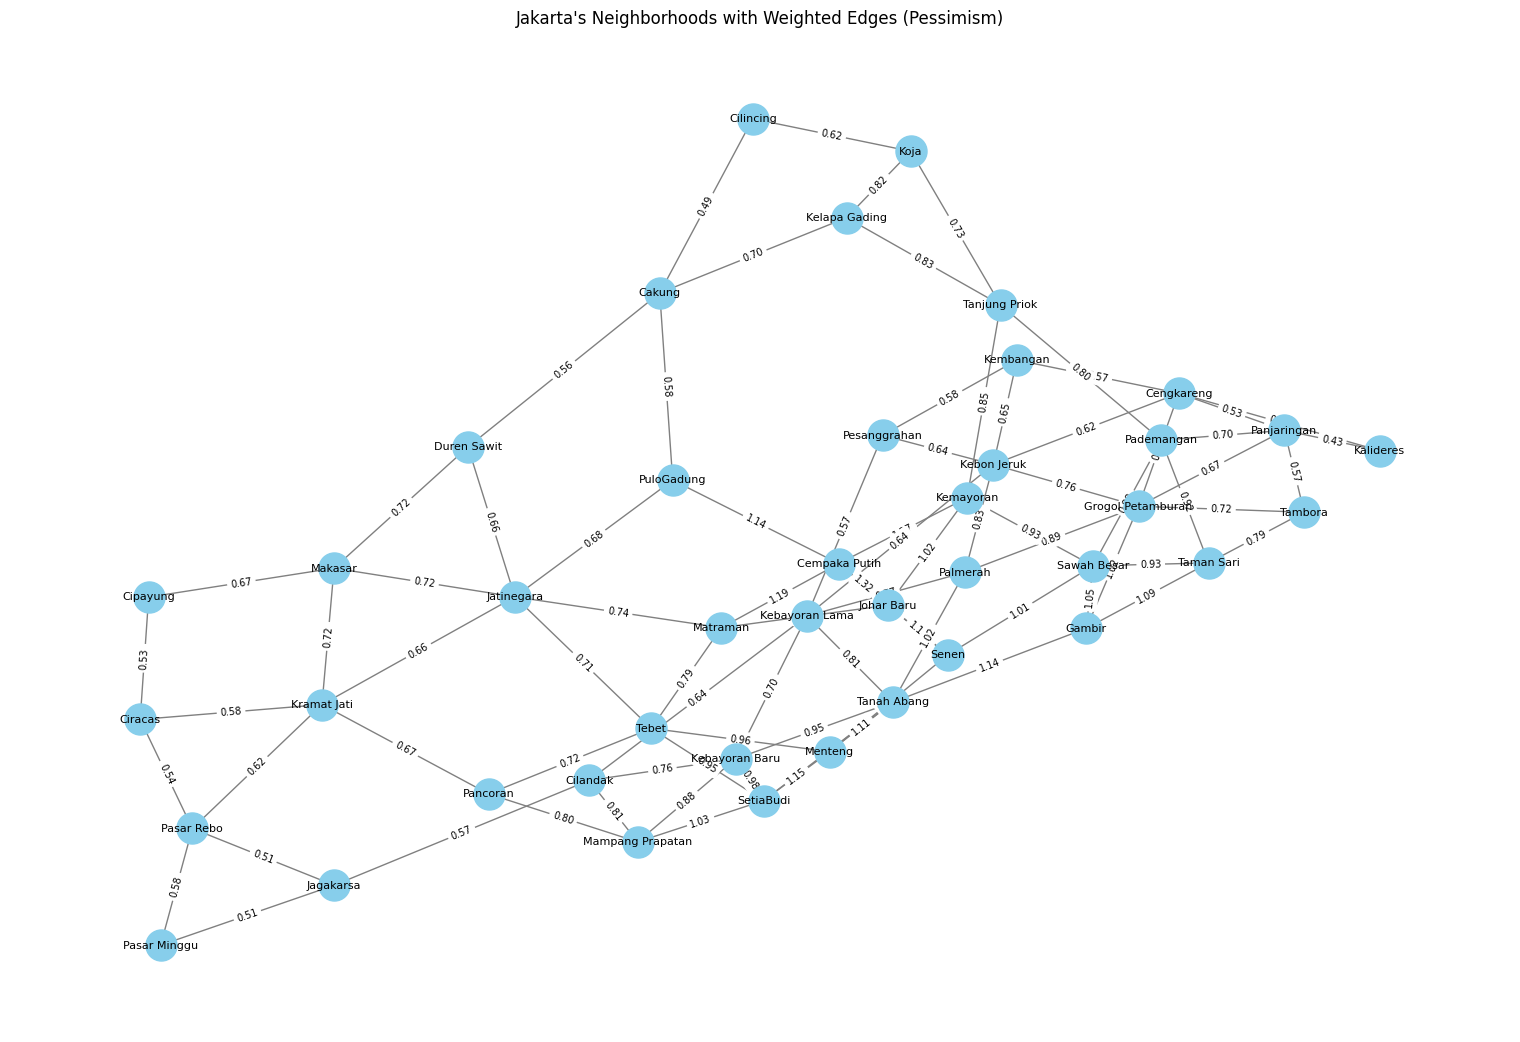

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes and edges
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Map pessimism values to the nodes
pessimism_dict = dict(zip(nodes, pesimis))

# Assign weights to the edges based on pessimism
for u, v in G.edges():
    if u in pessimism_dict and v in pessimism_dict:
        pess_u = pessimism_dict[u]
        pess_v = pessimism_dict[v]
        G[u][v]['weight'] = (pess_u + pess_v) / 2

# Draw the graph with weights
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, node_color='skyblue', font_color='black', edge_color='gray')

# Draw edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=7)

plt.title("Jakarta's Neighborhoods with Weighted Edges (Pessimism)")
plt.show()


In [ ]:
# Map pessimism values to the nodes
pessimism_dict = dict(zip(nodes, pesimis))

# Print each node with its corresponding pessimism value
for node in nodes:
    print(f"Node: {node}, Pessimism: {pessimism_dict[node]}")


Node: Cakung, Pessimism: 0.47
Node: Cempaka Putih, Pessimism: 1.57
Node: Cengkareng, Pessimism: 0.54
Node: Cilandak, Pessimism: 0.7
Node: Cilincing, Pessimism: 0.52
Node: Cipayung, Pessimism: 0.55
Node: Ciracas, Pessimism: 0.5
Node: Duren Sawit, Pessimism: 0.66
Node: Gambir, Pessimism: 1.22
Node: Grogol Petamburan, Pessimism: 0.81
Node: Jagakarsa, Pessimism: 0.44
Node: Jatinegara, Pessimism: 0.66
Node: Johar Baru, Pessimism: 1.07
Node: Kalideres, Pessimism: 0.33
Node: Kebayoran Baru, Pessimism: 0.83
Node: Kebayoran Lama, Pessimism: 0.57
Node: Kebon Jeruk, Pessimism: 0.7
Node: Kelapa Gading, Pessimism: 0.92
Node: Kemayoran, Pessimism: 0.97
Node: Kembangan, Pessimism: 0.6
Node: Koja, Pessimism: 0.73
Node: Kramat Jati, Pessimism: 0.66
Node: Makasar, Pessimism: 0.78
Node: Mampang Prapatan, Pessimism: 0.92
Node: Matraman, Pessimism: 0.81
Node: Menteng, Pessimism: 1.16
Node: Pademangan, Pessimism: 0.87
Node: Palmerah, Pessimism: 0.97
Node: Pancoran, Pessimism: 0.68
Node: Pasar Rebo, Pessimis

In [ ]:
# Map pessimism values to the nodes
pessimism_dict = dict(zip(nodes, pesimis))

# Loop through edges and print the weight calculation
for u, v in G.edges():
    # Get pessimism values for the two nodes
    pess_u = pessimism_dict[u]
    pess_v = pessimism_dict[v]

    # Calculate the weight
    weight = (pess_u + pess_v) / 2

    # Set the weight as an edge attribute (if not already set)
    G[u][v]['weight'] = weight

    # Print the edge and its weight calculation
    print(f"Edge: ({u}, {v})")
    print(f"  Pessimism({u}) = {pess_u}, Pessimism({v}) = {pess_v}")
    print(f"  Calculated Weight = ({pess_u} + {pess_v}) / 2 = {weight:.2f}\n")


Edge: (Cakung, Duren Sawit)
  Pessimism(Cakung) = 0.47, Pessimism(Duren Sawit) = 0.66
  Calculated Weight = (0.47 + 0.66) / 2 = 0.56

Edge: (Cakung, PuloGadung)
  Pessimism(Cakung) = 0.47, Pessimism(PuloGadung) = 0.7
  Calculated Weight = (0.47 + 0.7) / 2 = 0.58

Edge: (Cakung, Kelapa Gading)
  Pessimism(Cakung) = 0.47, Pessimism(Kelapa Gading) = 0.92
  Calculated Weight = (0.47 + 0.92) / 2 = 0.70

Edge: (Cakung, Cilincing)
  Pessimism(Cakung) = 0.47, Pessimism(Cilincing) = 0.52
  Calculated Weight = (0.47 + 0.52) / 2 = 0.49

Edge: (Cempaka Putih, Johar Baru)
  Pessimism(Cempaka Putih) = 1.57, Pessimism(Johar Baru) = 1.07
  Calculated Weight = (1.57 + 1.07) / 2 = 1.32

Edge: (Cempaka Putih, Kemayoran)
  Pessimism(Cempaka Putih) = 1.57, Pessimism(Kemayoran) = 0.97
  Calculated Weight = (1.57 + 0.97) / 2 = 1.27

Edge: (Cempaka Putih, Senen)
  Pessimism(Cempaka Putih) = 1.57, Pessimism(Senen) = 1.12
  Calculated Weight = (1.57 + 1.12) / 2 = 1.35

Edge: (Cempaka Putih, Matraman)
  Pessimis

In [ ]:
# Map pessimism values to the nodes
pessimism_dict = dict(zip(nodes, pesimis))

# Loop through edges and print the weight calculation
for u, v in G.edges():
    if u in pessimism_dict and v in pessimism_dict:
        # Get pessimism values for the two nodes
        pess_u = pessimism_dict[u]
        pess_v = pessimism_dict[v]

        # Calculate the weight
        weight = (pess_u + pess_v) / 2

        # Set the weight as an edge attribute (if not already set)
        G[u][v]['weight'] = weight

        # Print the edge and its weight calculation
        print(f"Edge: ({u}, {v})")
        print(f"  Pessimism({u}) = {pess_u}, Pessimism({v}) = {pess_v}")
        print(f"  Calculated Weight = ({pess_u} + {pess_v}) / 2 = {weight:.2f}\n")
    else:
        print(f"Skipping edge ({u}, {v}) because one of the nodes is missing a pessimism value.")



NameError: name 'nodes' is not defined

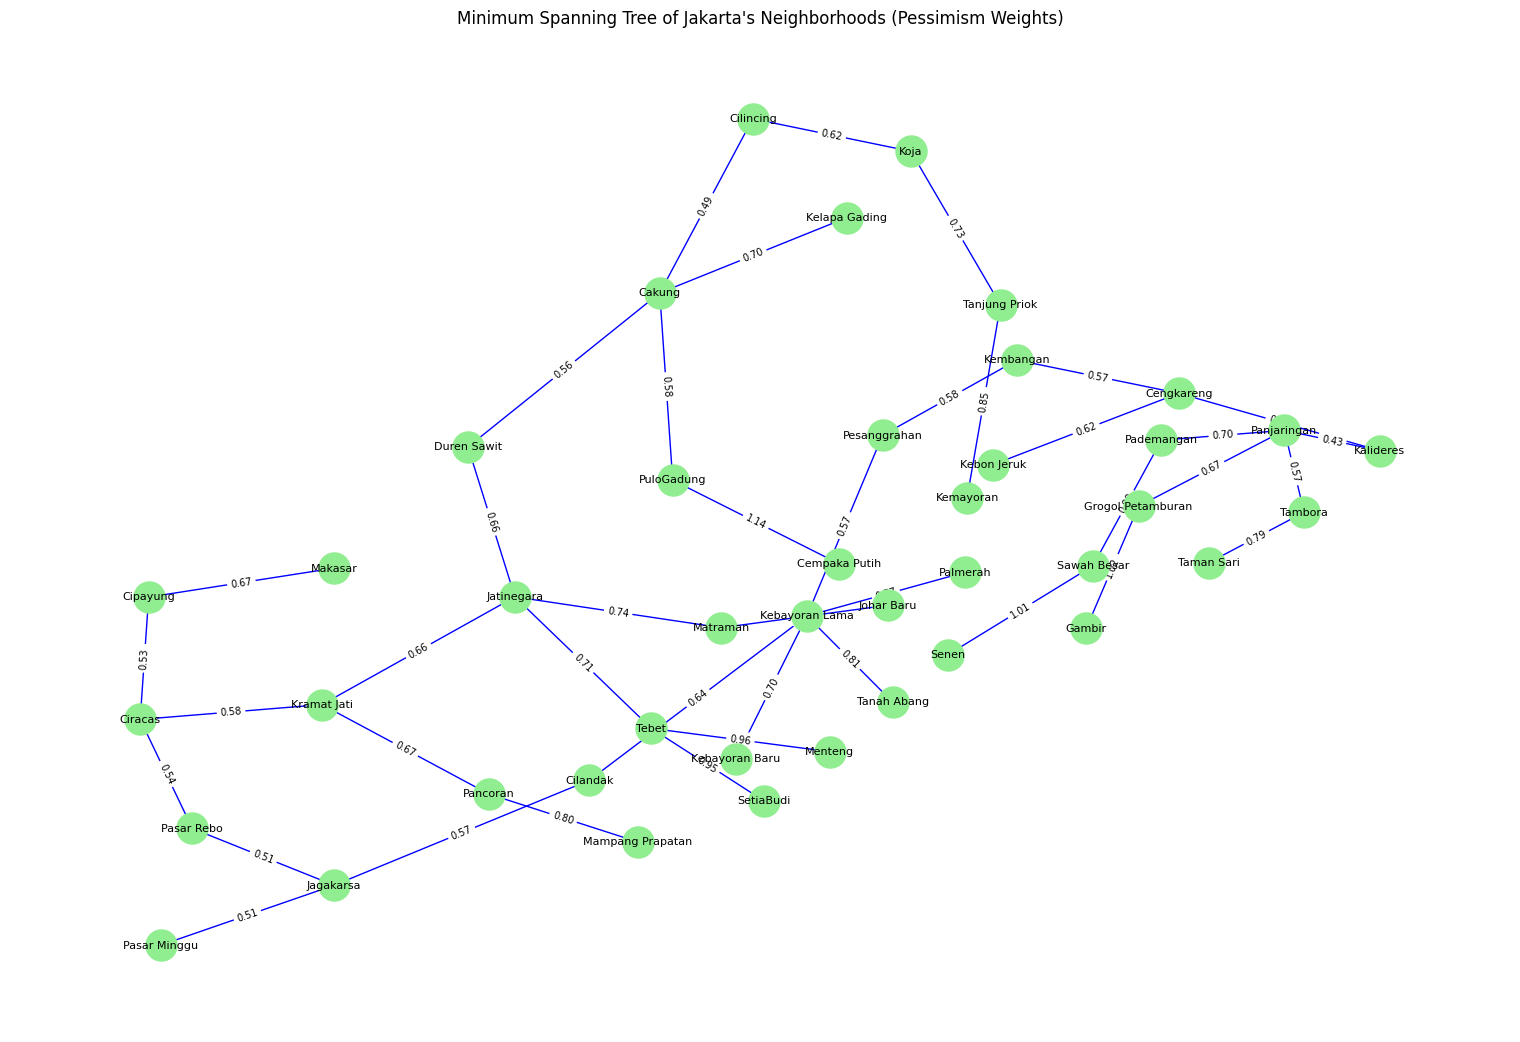

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes and edges
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Map pessimism values to the nodes
pessimism_dict = dict(zip(nodes, pesimis))

# Assign weights to the edges based on pessimism
for u, v in G.edges():
    if u in pessimism_dict and v in pessimism_dict:
        pess_u = pessimism_dict[u]
        pess_v = pessimism_dict[v]
        G[u][v]['weight'] = (pess_u + pess_v) / 2

# Generate the Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G, weight='weight')

# Draw the MST with weights
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(mst, pos, with_labels=True, node_size=500, font_size=8, node_color='lightgreen', font_color='black', edge_color='blue')

# Draw edge weights for the MST
mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{v:.2f}" for k, v in mst_edge_labels.items()}, font_size=7)

plt.title("Minimum Spanning Tree of Jakarta's Neighborhoods (Pessimism Weights)")
plt.show()
